In [1]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\deepa\python & ML documents\Machine learning Notes\ML Assignments\Car Price using regression\CarPrice_Assignment.csv")
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [6]:
data["price"].value_counts()

8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64

In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
data.drop("car_ID",axis = 1)

symboling                   CarName fueltype aspiration doornumber  \
0            3        alfa-romero giulia      gas        std        two   
1            3       alfa-romero stelvio      gas        std        two   
2            1  alfa-romero Quadrifoglio      gas        std        two   
3            2               audi 100 ls      gas        std       four   
4            2                audi 100ls      gas        std       four   
..         ...                       ...      ...        ...        ...   
200         -1           volvo 145e (sw)      gas        std       four   
201         -1               volvo 144ea      gas      turbo       four   
202         -1               volvo 244dl      gas        std       four   
203         -1                 volvo 246   diesel      turbo       four   
204         -1               volvo 264gl      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0    convertible        rwd          front       88.6      168.8  ...   
1    convertible        rwd          front       88.6      168.8  ...   
2      hatchback        rwd          front       94.5      171.2  ...   
3          sedan        fwd          front       99.8      176.6  ...   
4          sedan        4wd          front       99.4      176.6  ...   
..           ...        ...            ...        ...        ...  ...   
200        sedan        rwd          front      109.1      188.8  ...   
201        sedan        rwd          front      109.1      188.8  ...   
202        sedan        rwd          front      109.1      188.8  ...   
203        sedan        rwd          front      109.1      188.8  ...   
204        sedan        rwd          front      109.1      188.8  ...   

     enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0           130        mpfi       3.47   2.68              9.0         111   
1           130        mpfi       3.47   2.68              9.0         111   
2           152        mpfi       2.68   3.47              9.0         154   
3           109        mpfi       3.19   3.40             10.0         102   
4           136        mpfi       3.19   3.40              8.0         115   
..          ...         ...        ...    ...              ...         ...   
200         141        mpfi       3.78   3.15              9.5         114   
201         141        mpfi       3.78   3.15              8.7         160   
202         173        mpfi       3.58   2.87              8.8         134   
203         145         idi       3.01   3.40             23.0         106   
204         141        mpfi       3.78   3.15              9.5         114   

    peakrpm  citympg  highwaympg    price  
0      5000       21          27  13495.0  
1      5000       21          27  16500.0  
2      5000       19          26  16500.0  
3      5500       24          30  13950.0  
4      5500       18          22  17450.0  
..      ...      ...         ...      ...  
200    5400       23          28  16845.0  
201    5300       19          25  19045.0  
202    5500       18          23  21485.0  
203    4800       26          27  22470.0  
204    5400       19          25  22625.0  

[205 rows x 25 columns]

In [12]:
data.select_dtypes("object").columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

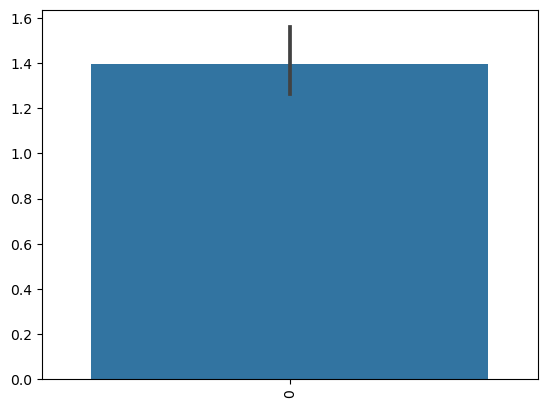

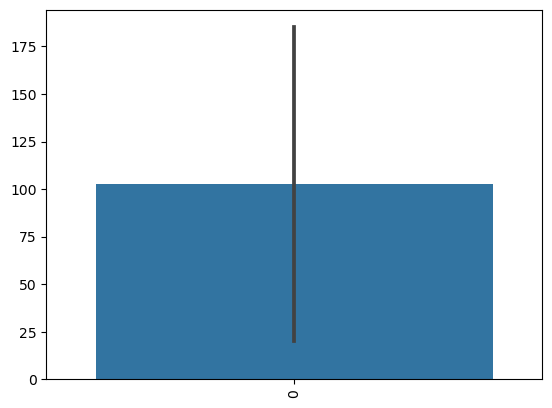

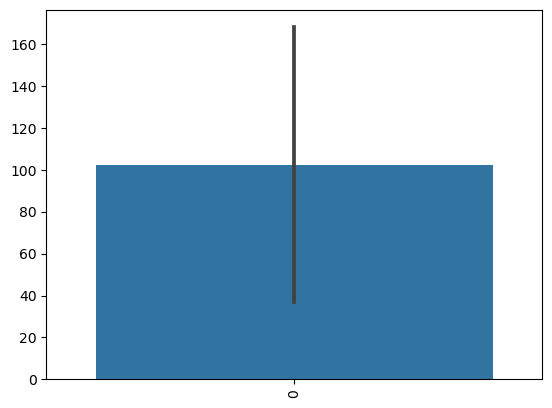

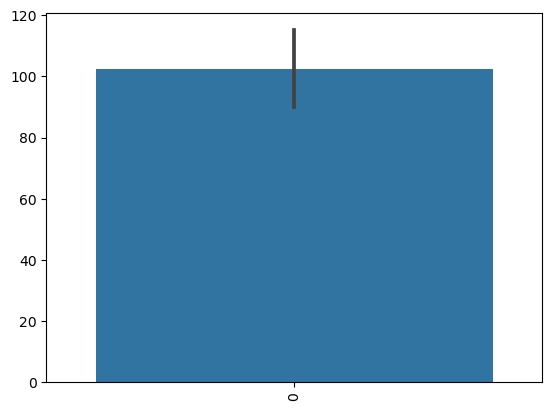

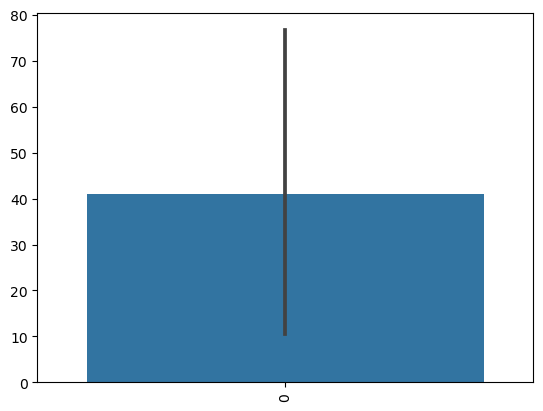

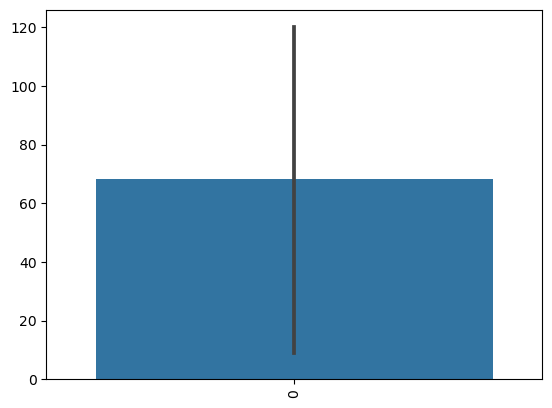

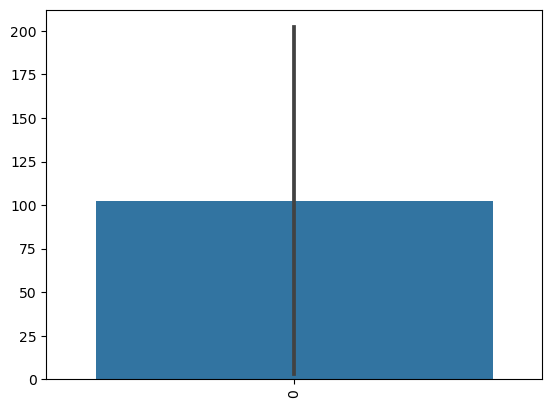

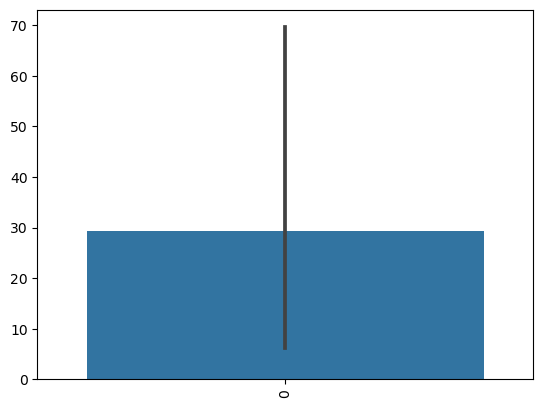

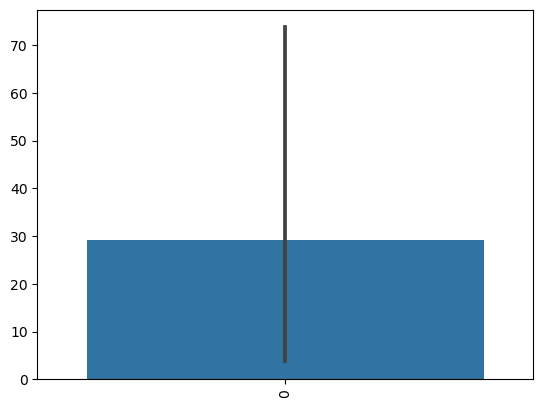

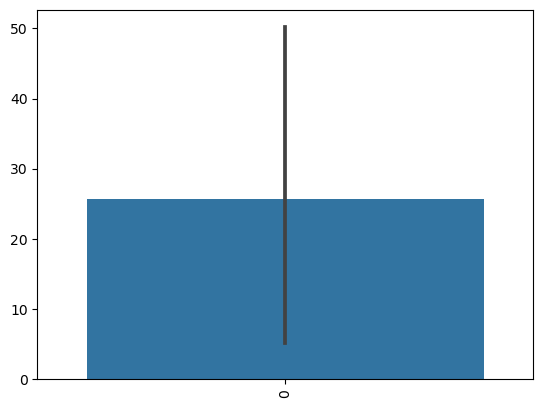

In [13]:
for i in data.select_dtypes("object").columns:
    sns.barplot(data[i].value_counts(),palette=sns.color_palette())
    plt.xticks(rotation=90)
    plt.show()

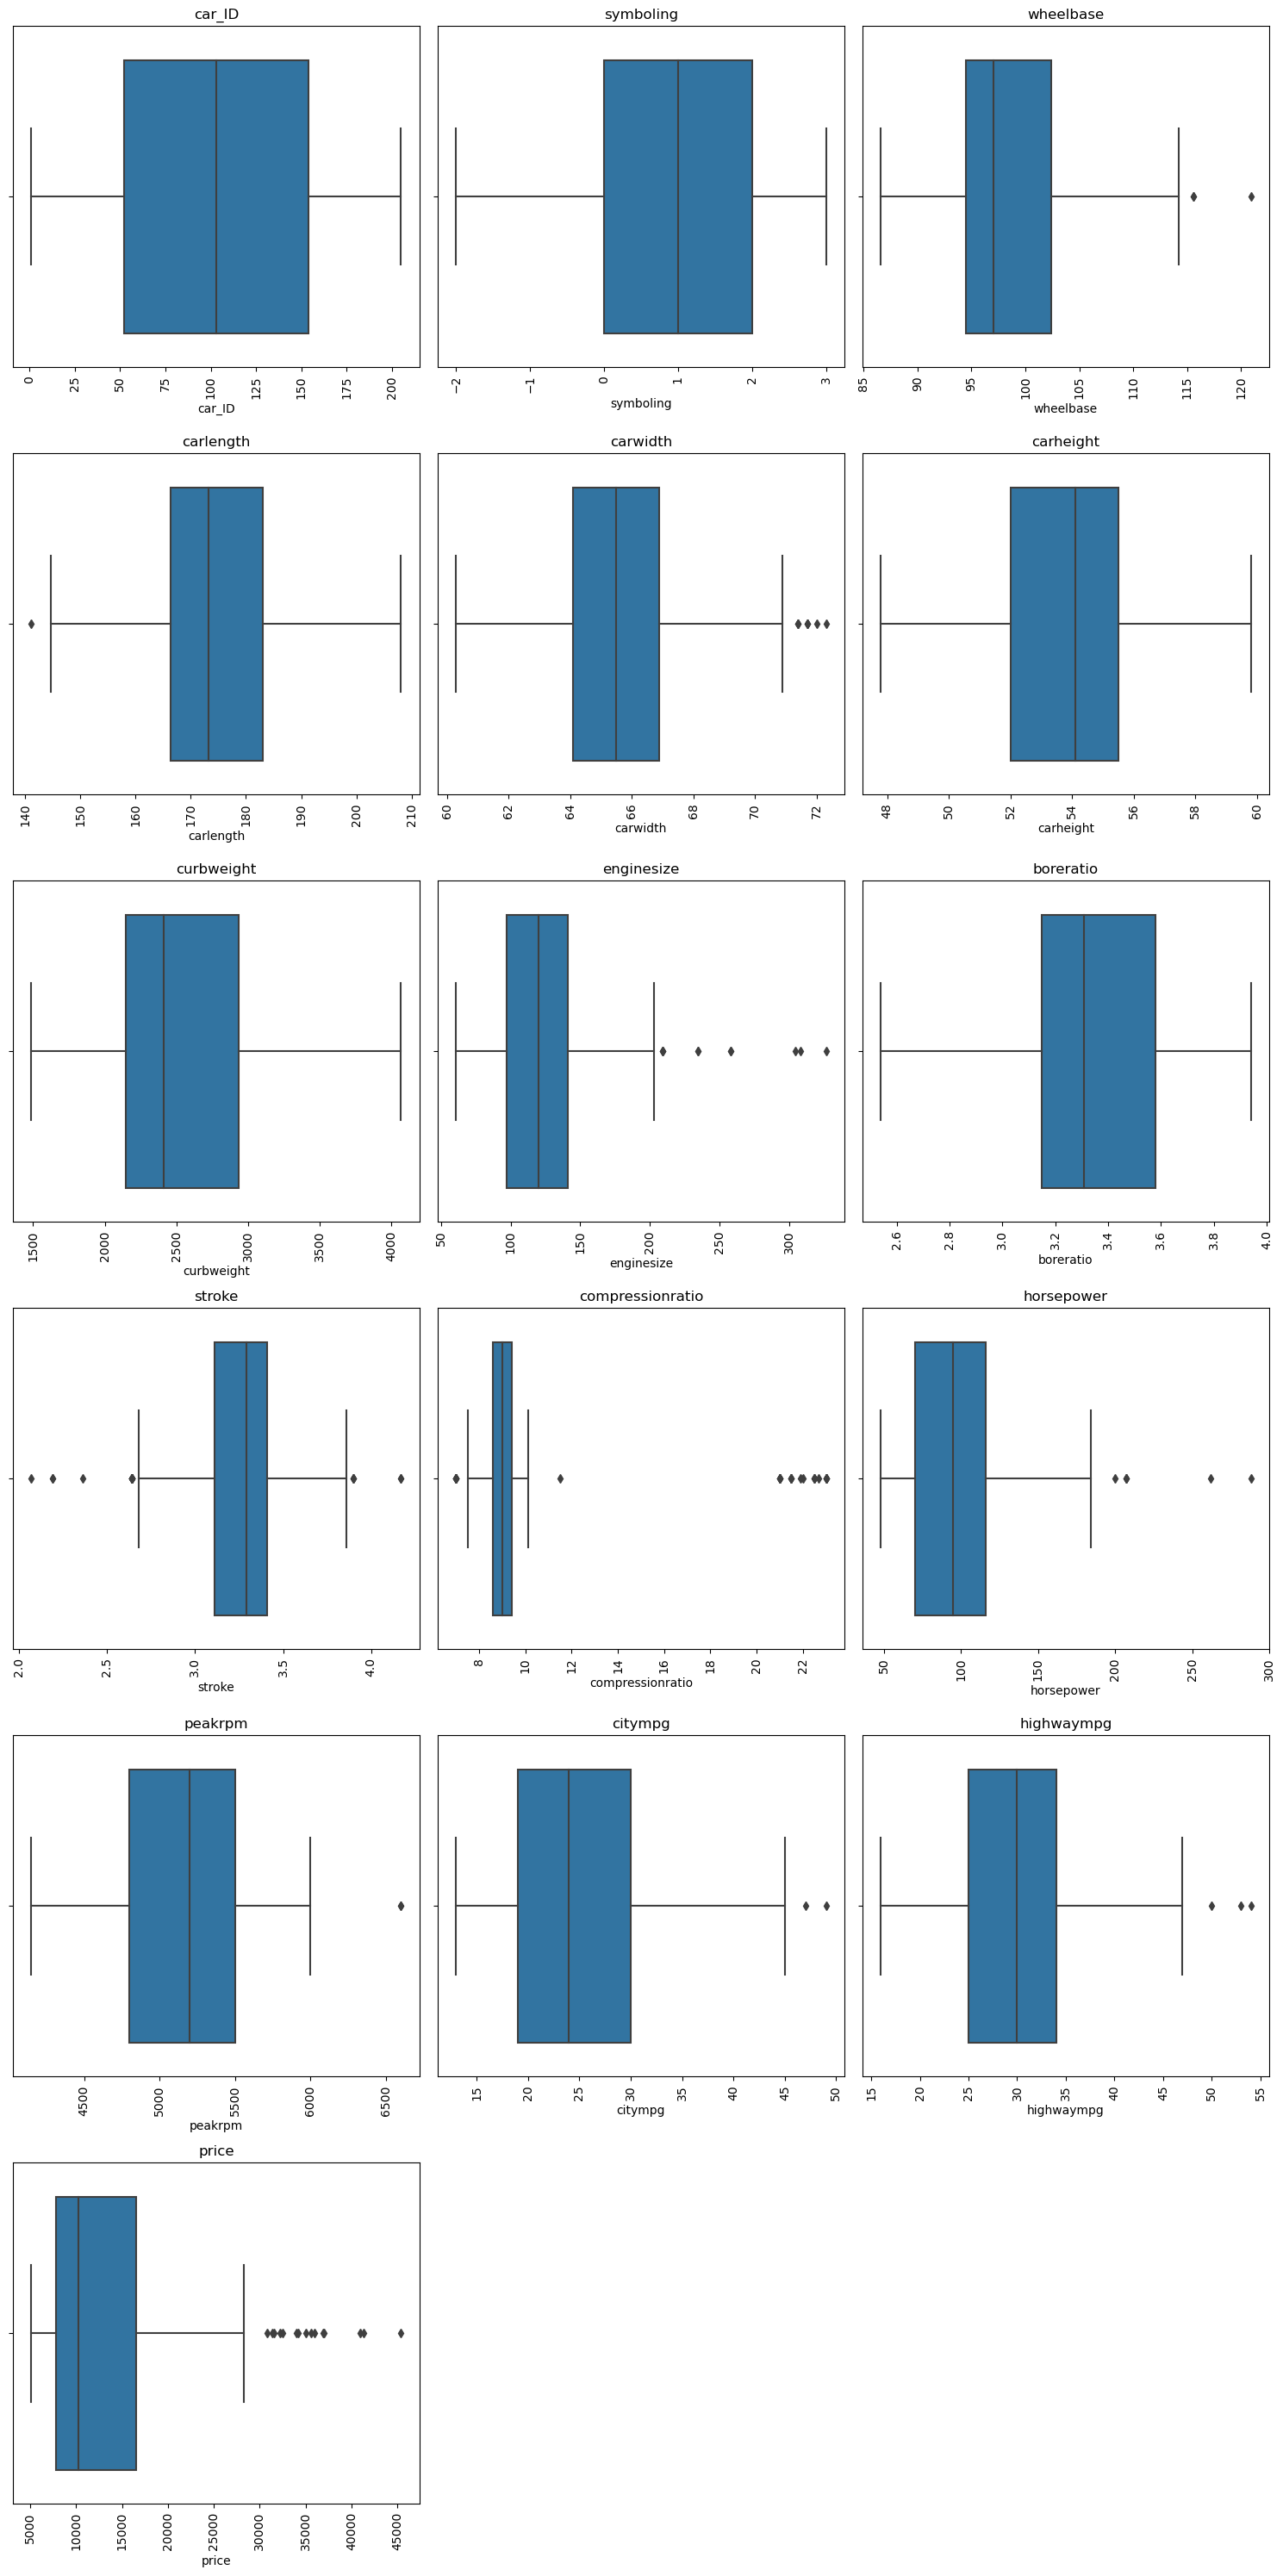

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of columns per row
columns_per_row = 3

# Calculate the number of rows needed
num_numerical_columns = len(data.select_dtypes(exclude="object").columns)
num_rows = (num_numerical_columns + columns_per_row - 1) // columns_per_row

# Create a figure with subplots arranged in a grid format
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over numerical columns in the DataFrame
for i, column in enumerate(data.select_dtypes(exclude="object").columns):
    # Create a boxplot for the current numerical column
    sns.boxplot(x=data[column], ax=axes[i])
    
    # Rotate the x-axis labels
    axes[i].tick_params(axis='x', rotation=90)
    
    # Set title for the subplot
    axes[i].set_title(column)

# Remove any unused subplots
for j in range(num_numerical_columns, num_rows * columns_per_row):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the combined boxplots
plt.show()

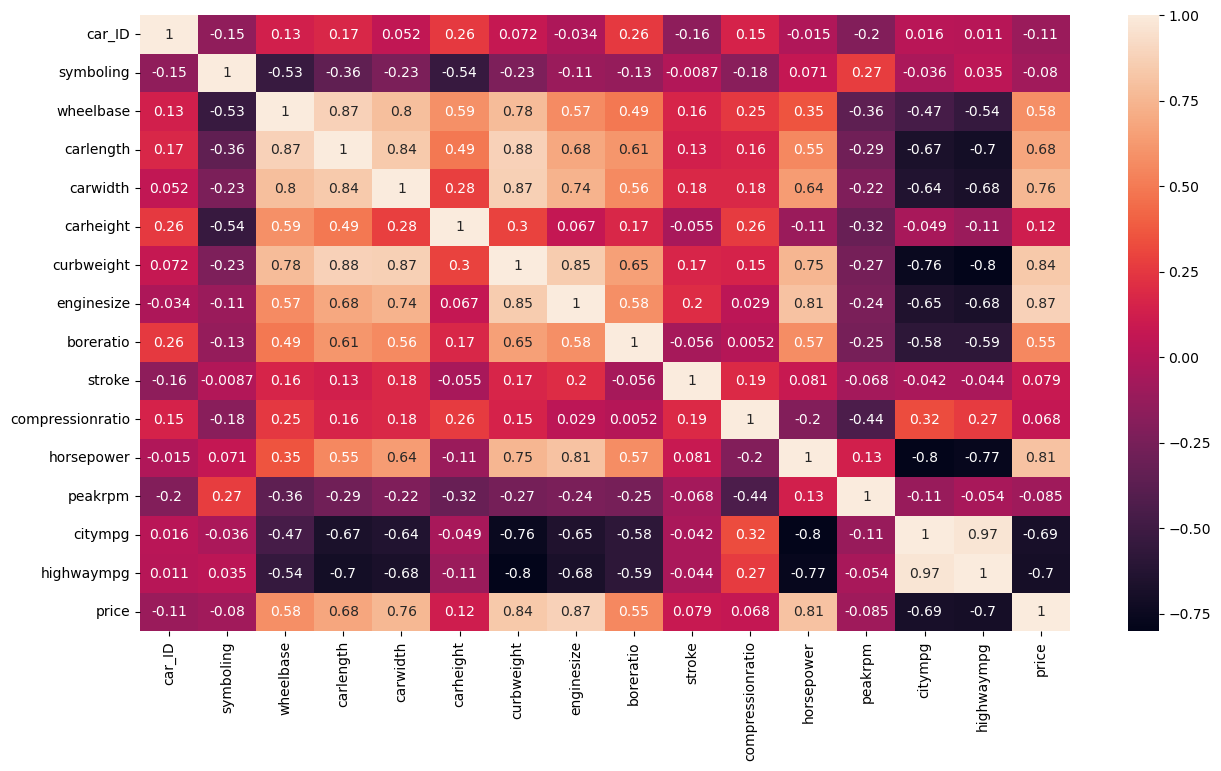

In [15]:

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

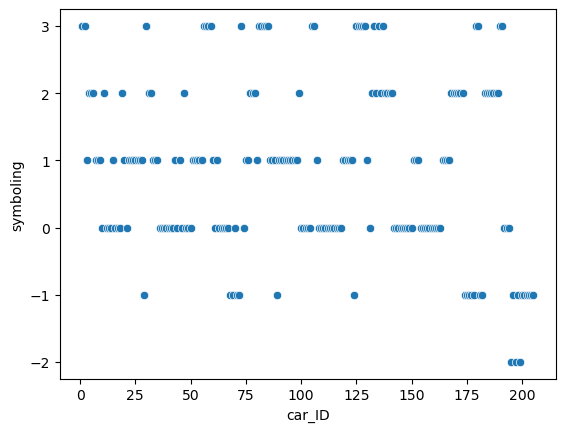

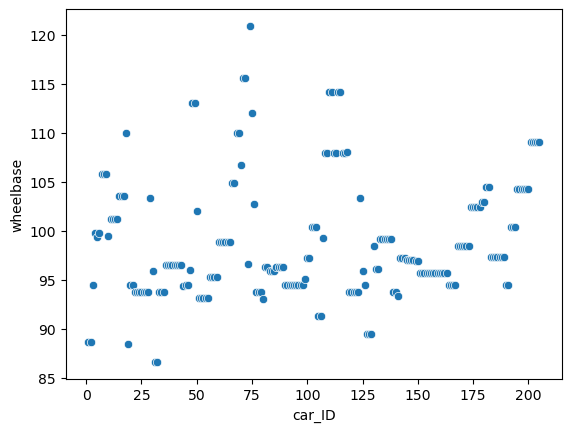

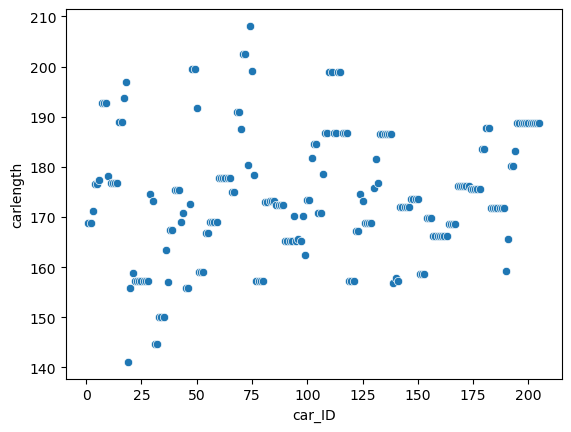

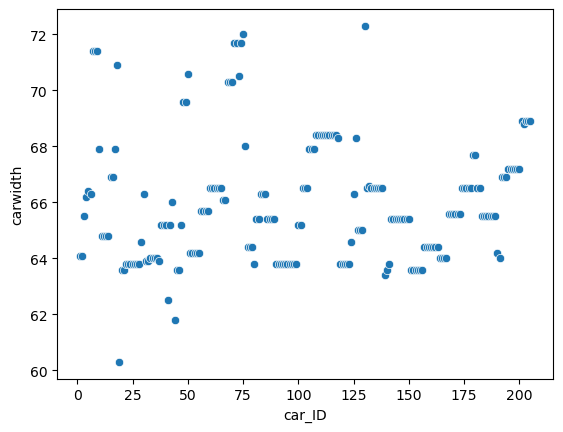

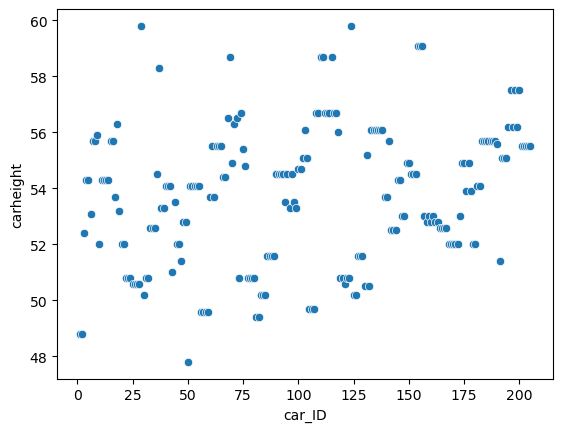

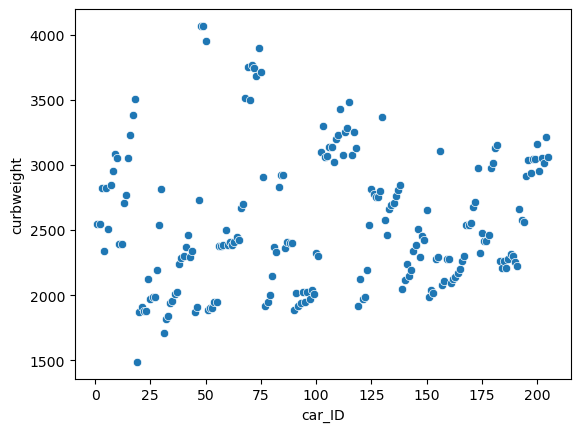

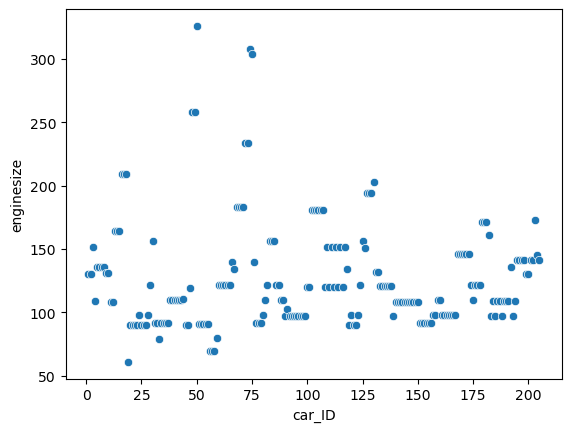

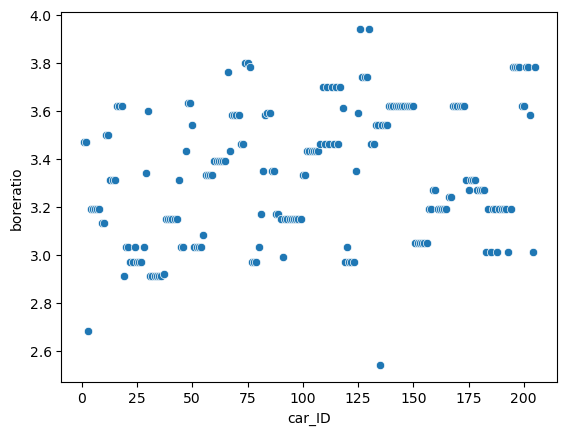

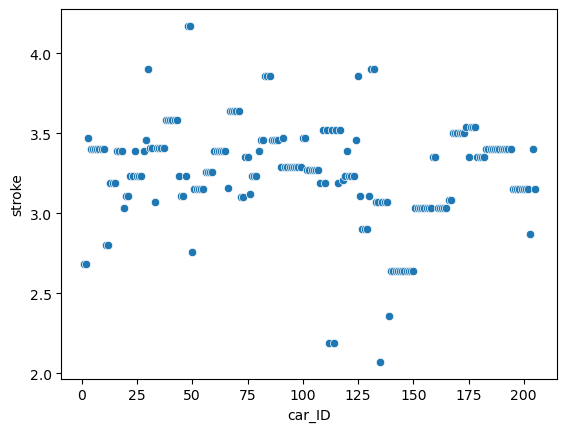

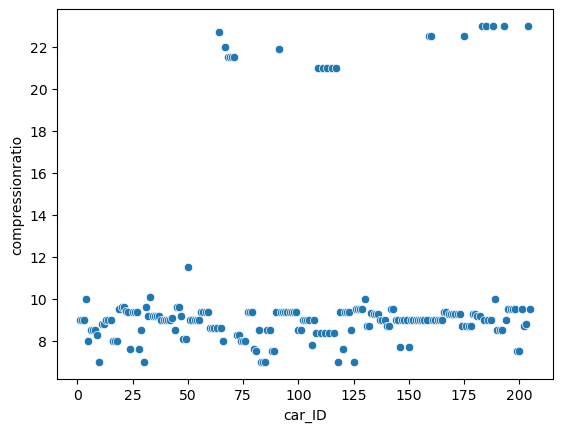

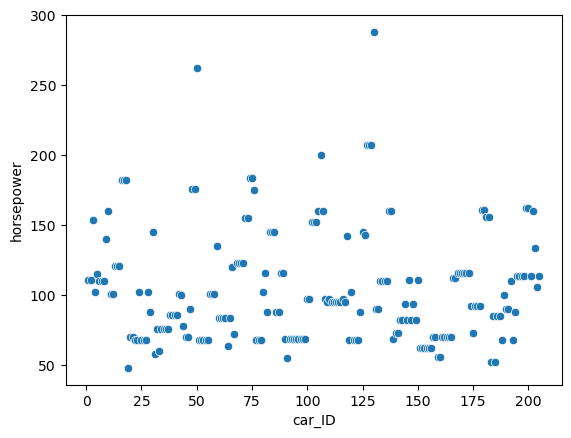

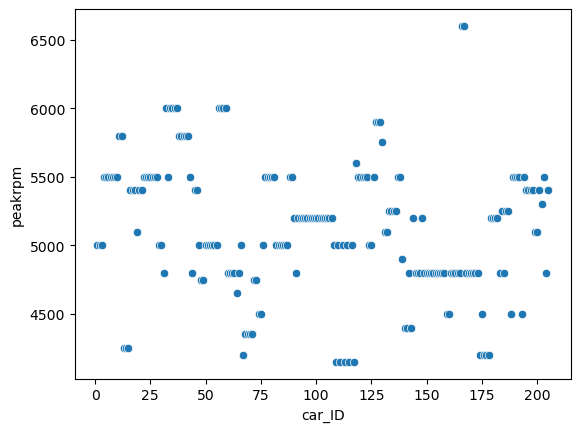

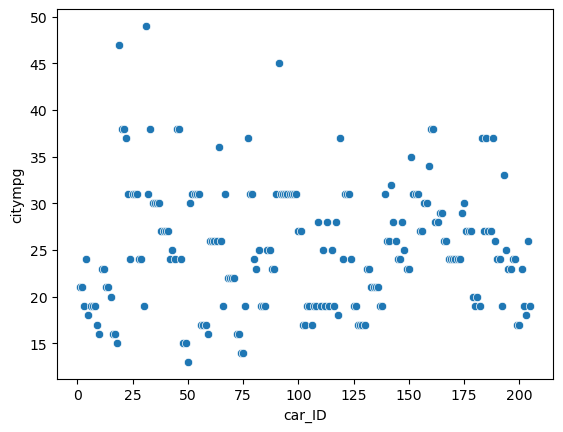

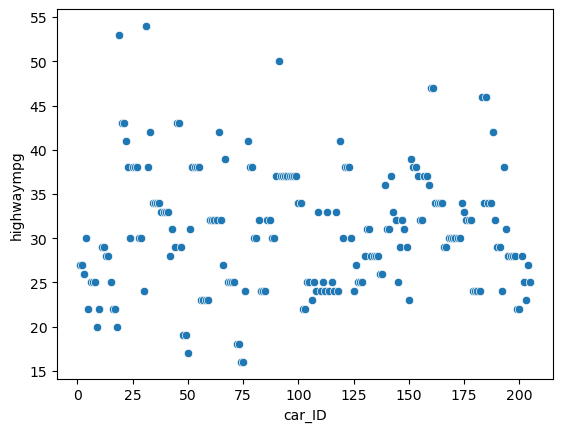

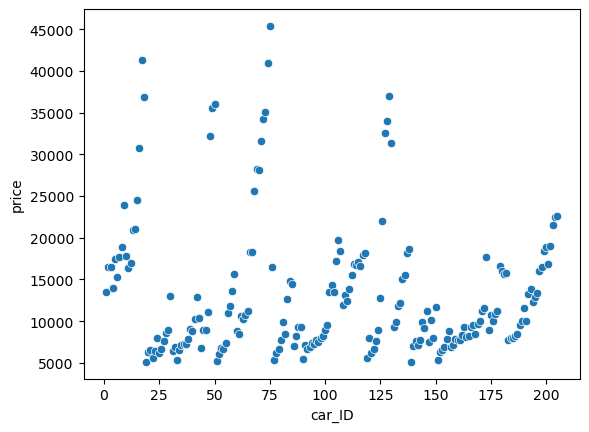

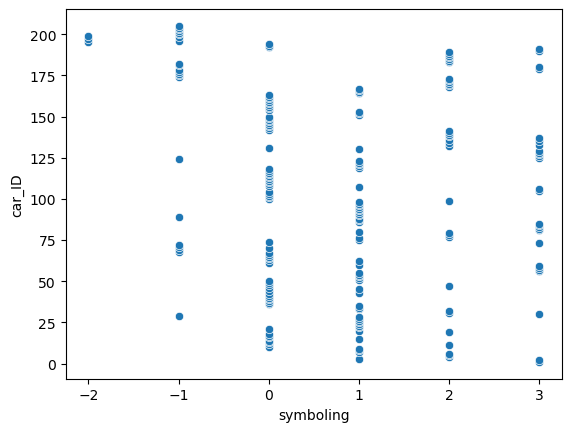

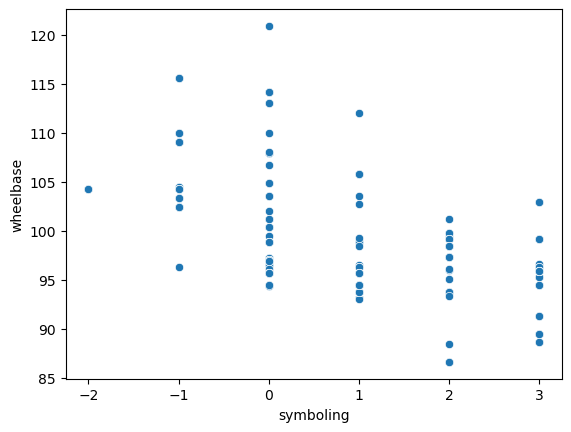

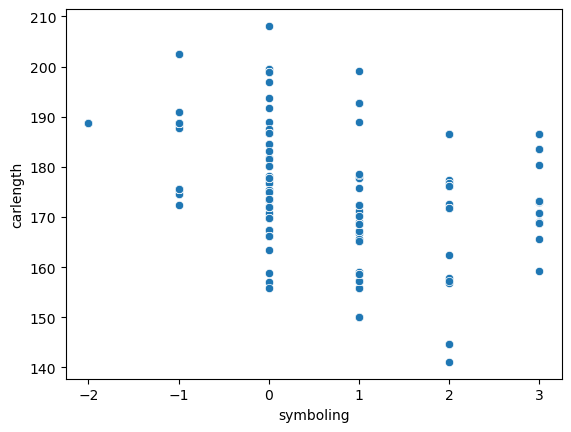

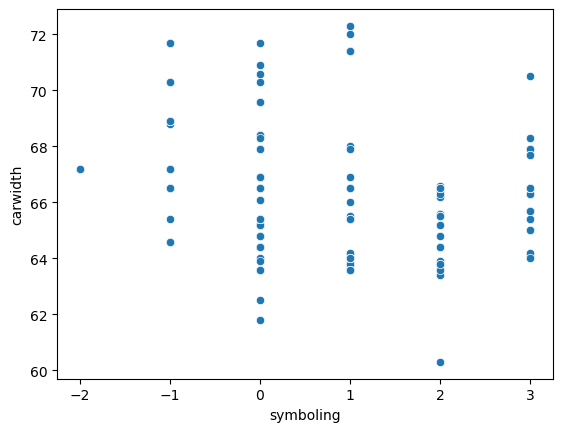

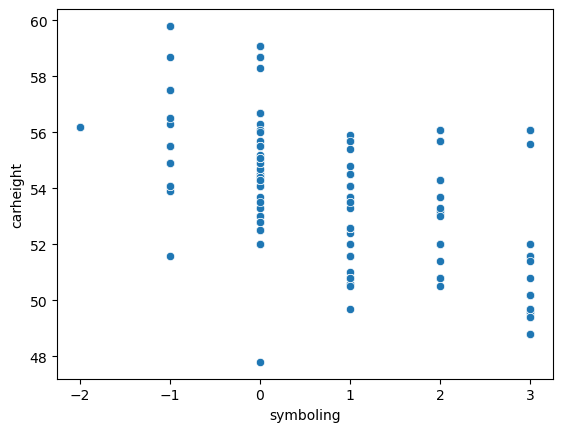

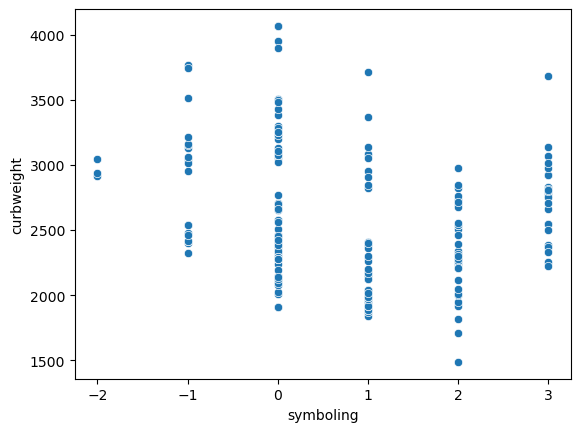

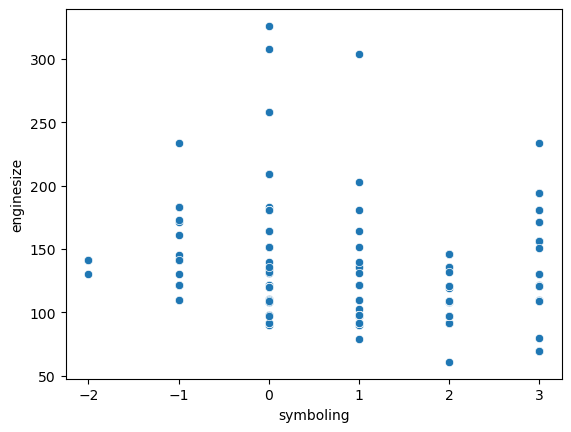

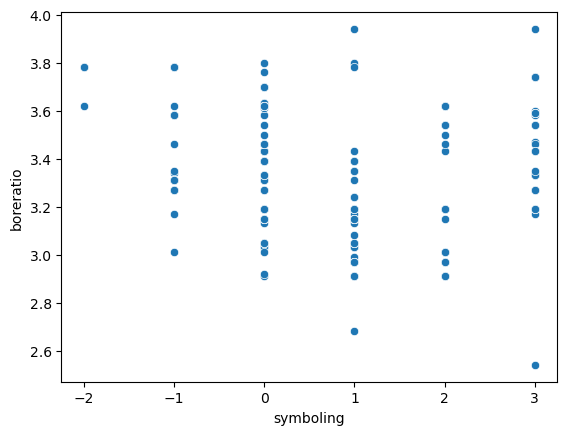

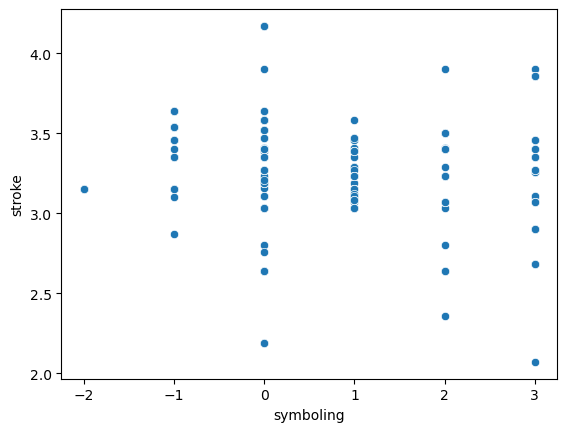

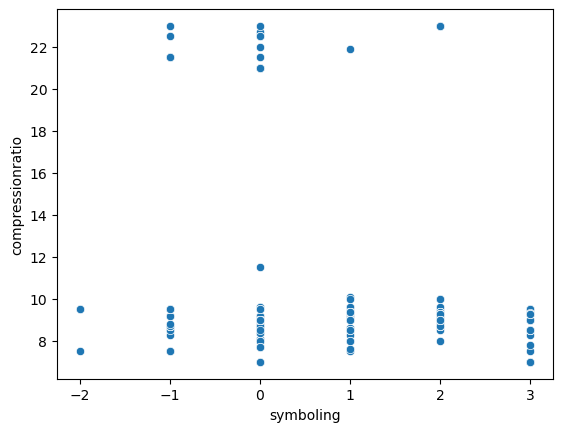

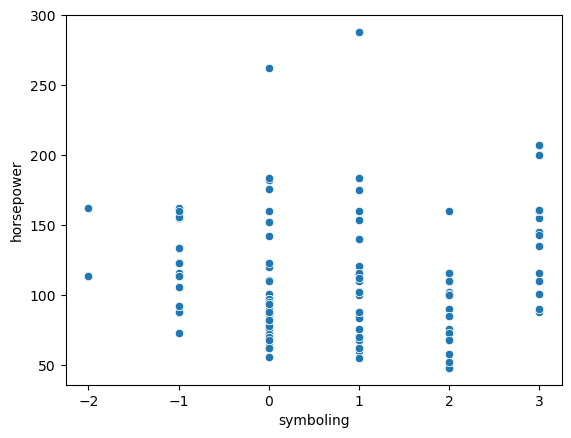

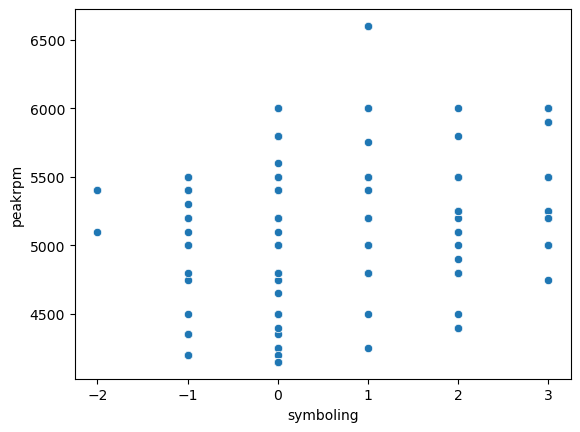

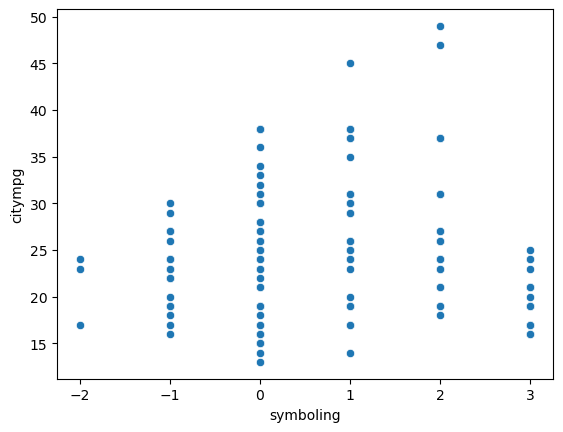

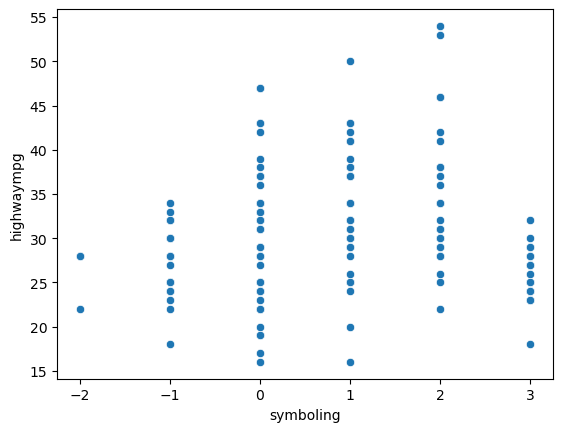

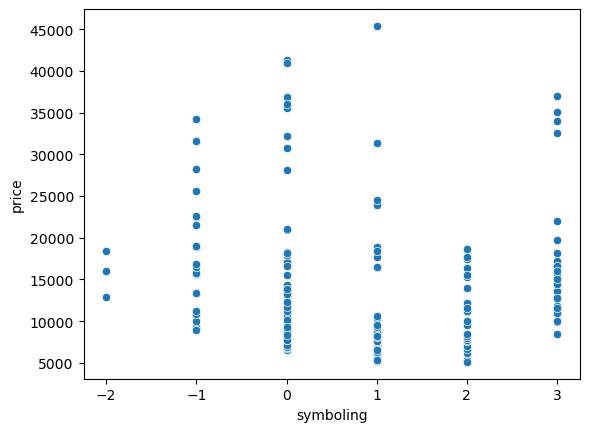

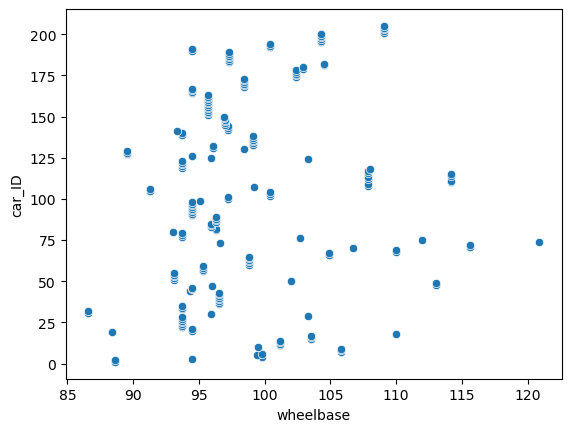

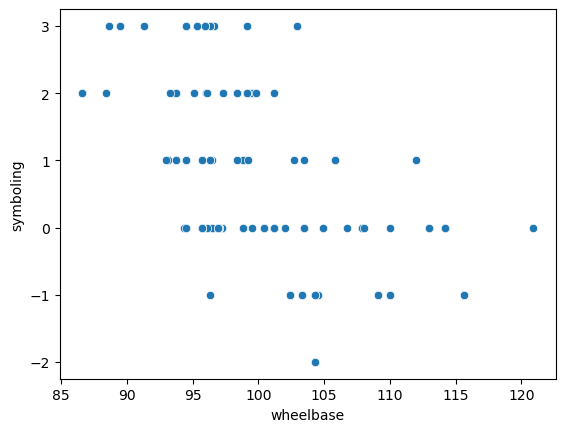

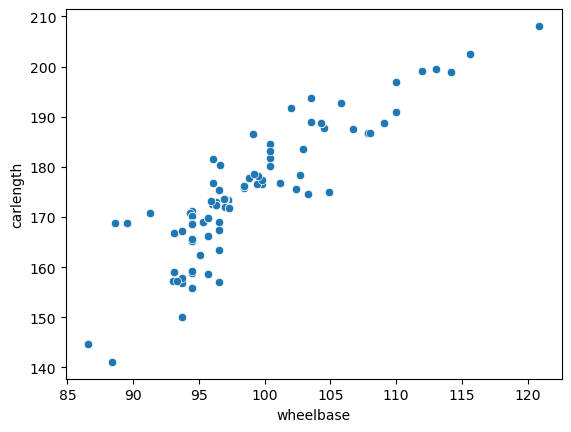

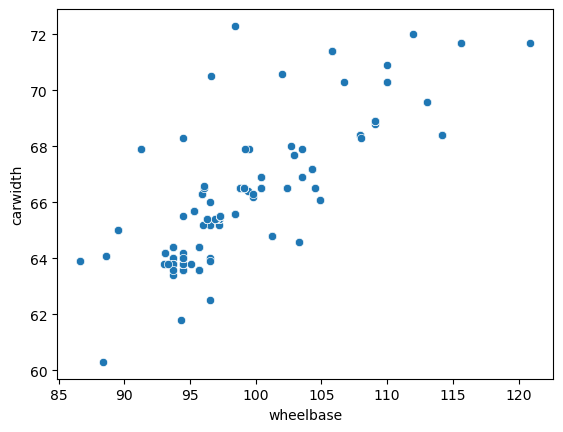

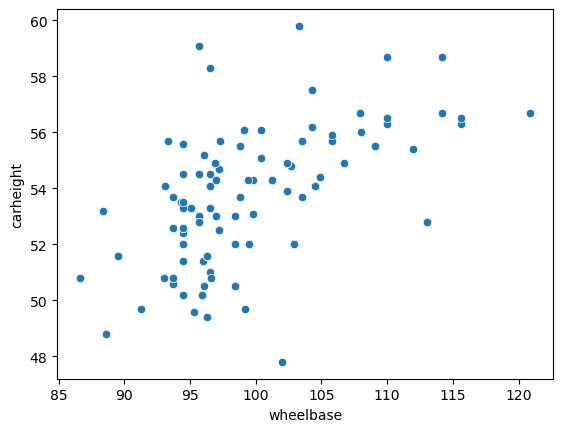

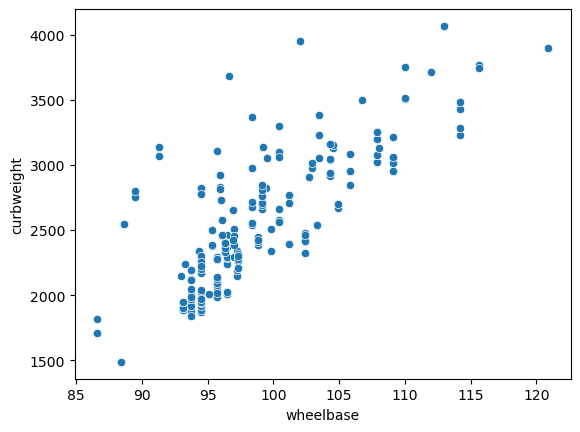

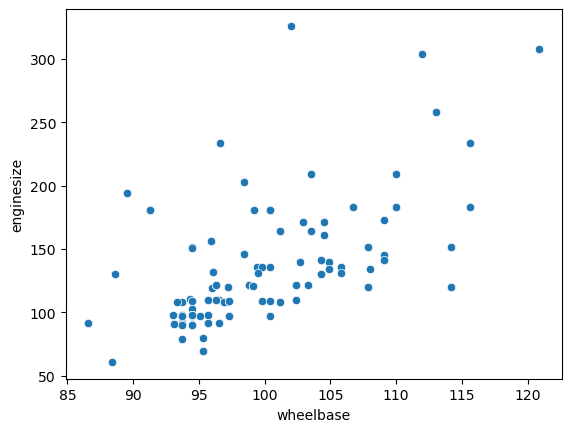

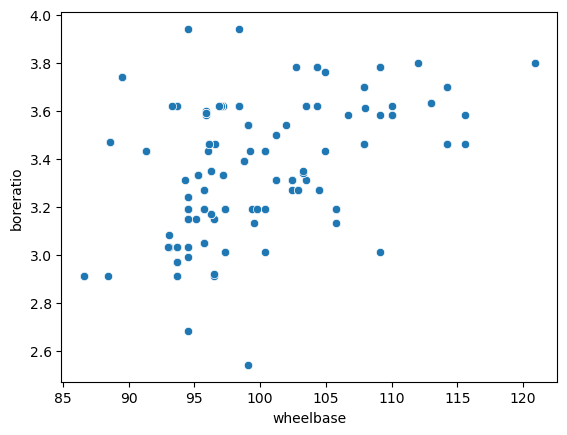

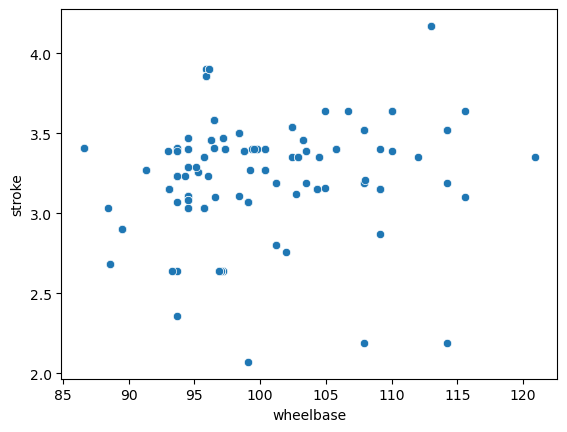

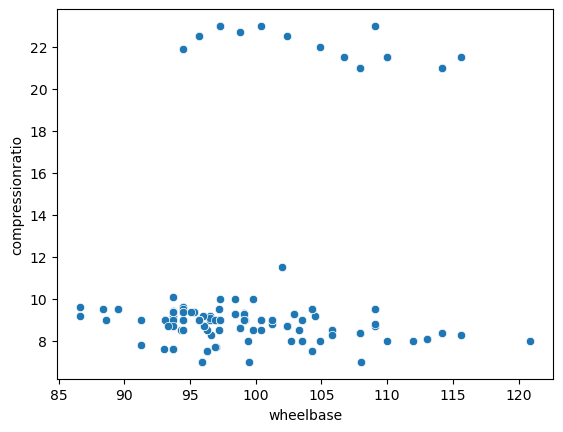

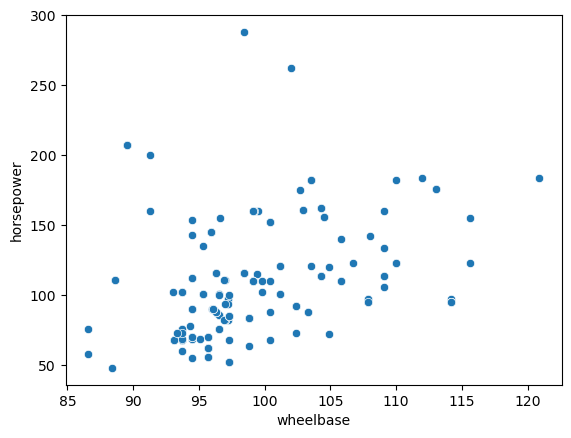

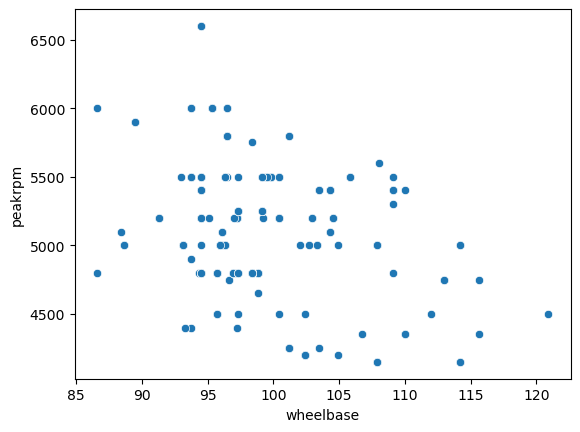

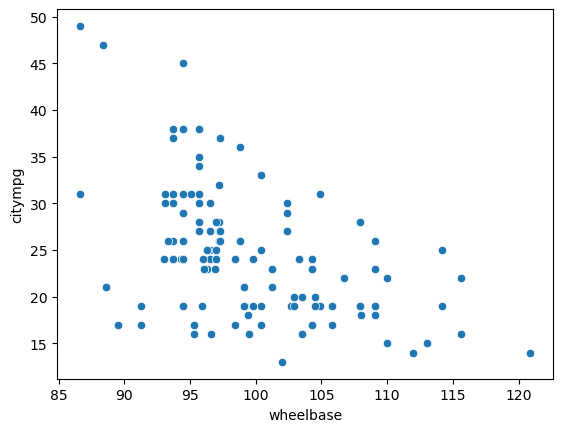

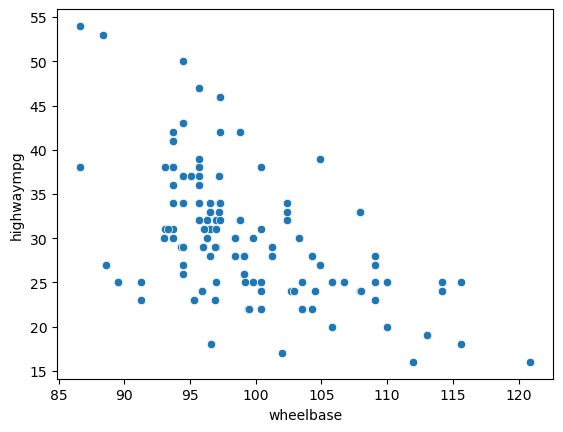

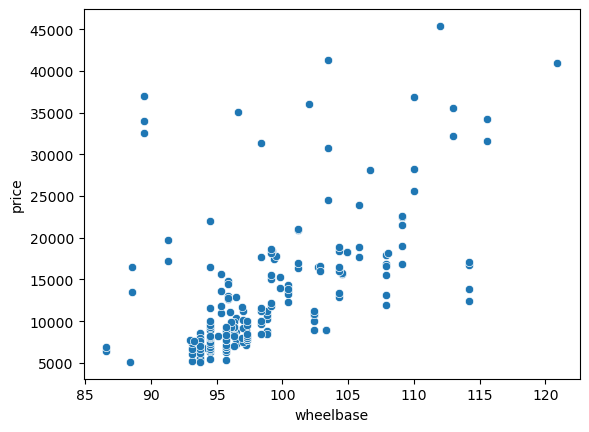

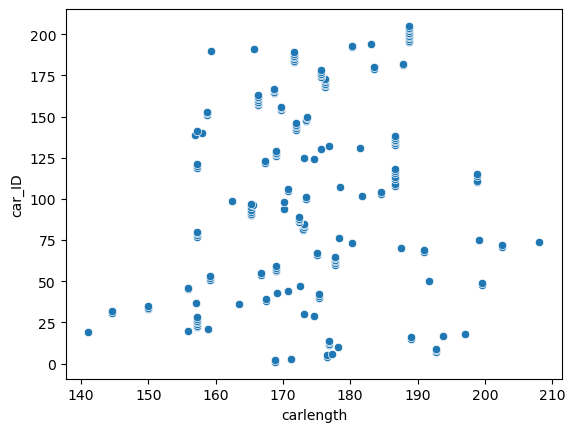

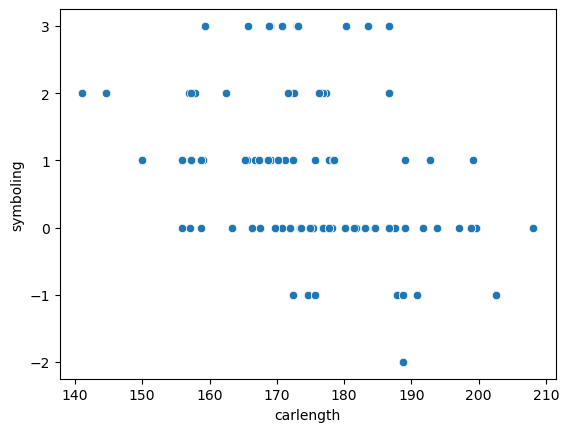

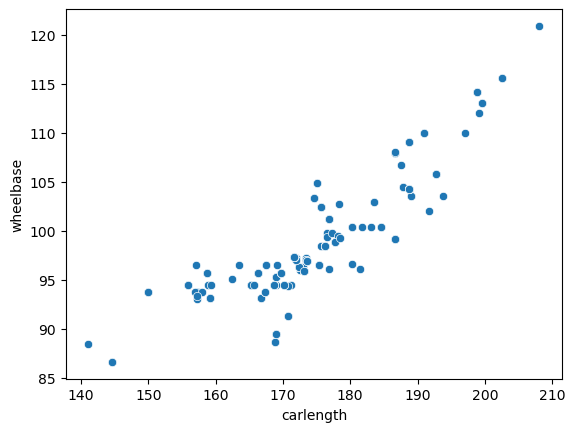

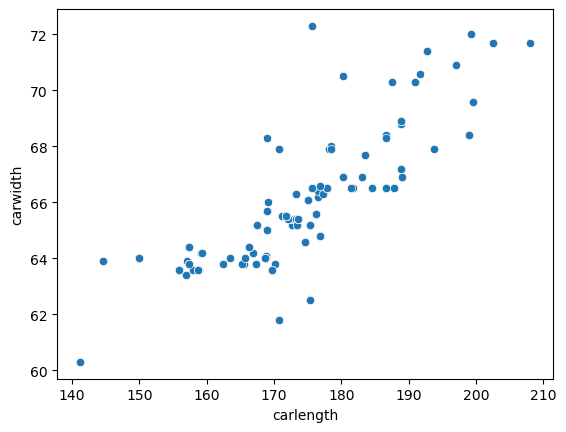

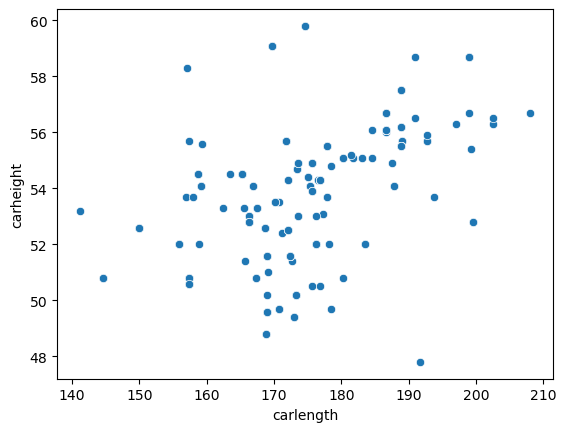

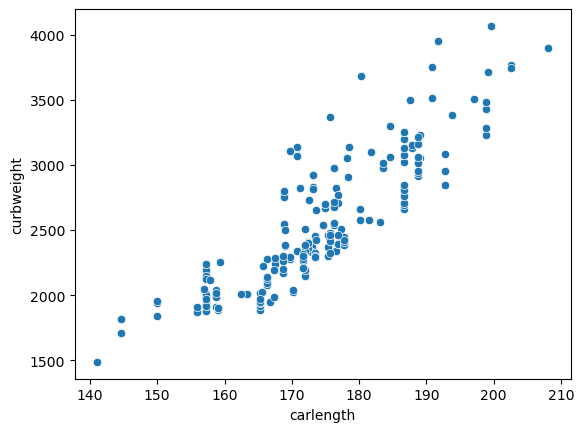

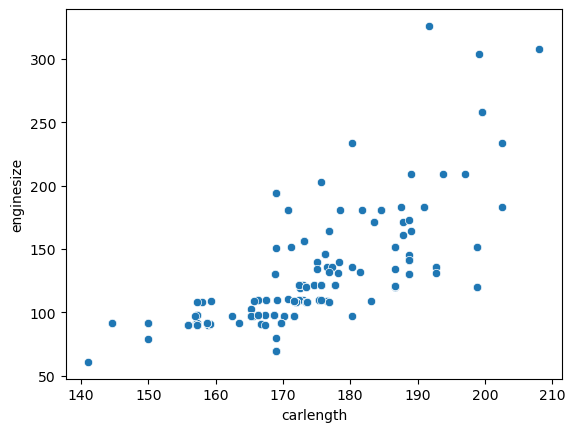

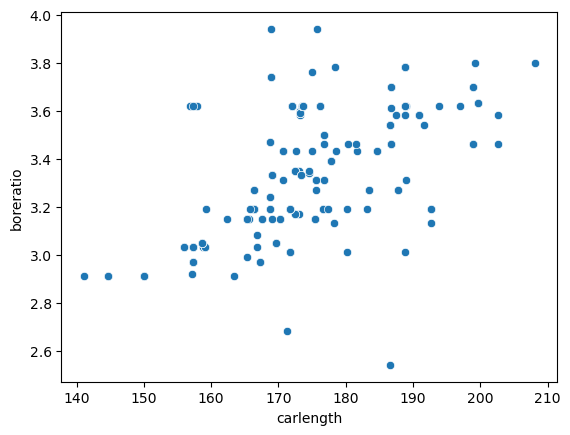

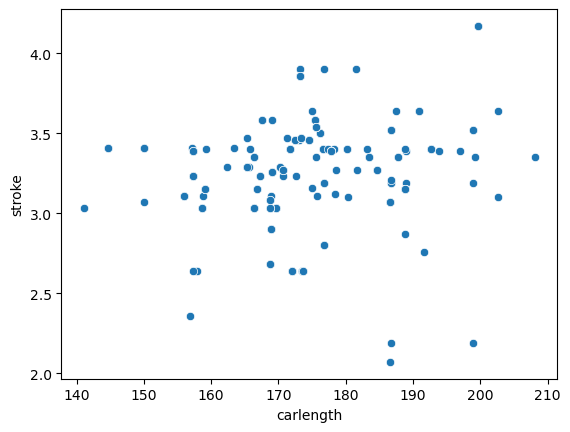

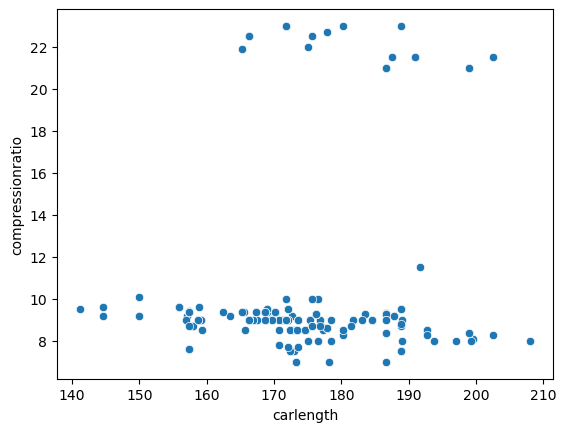

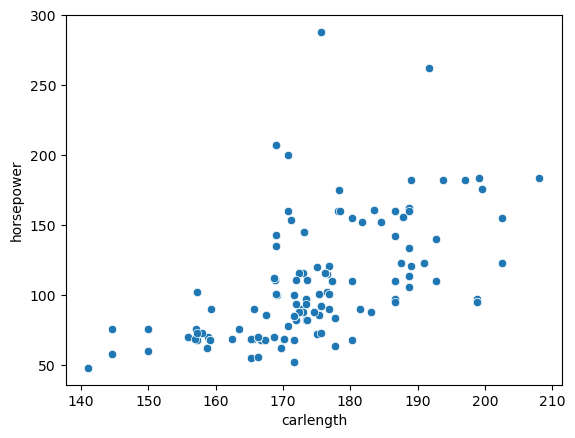

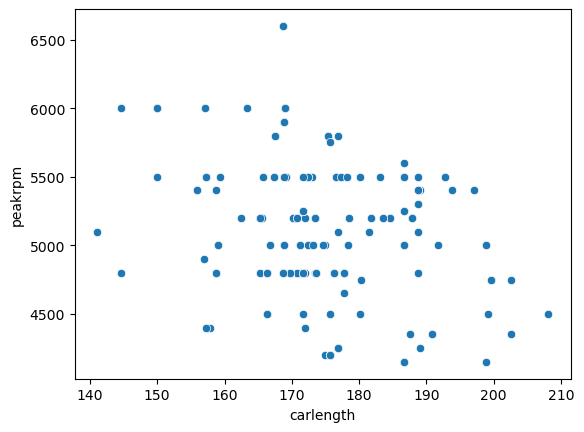

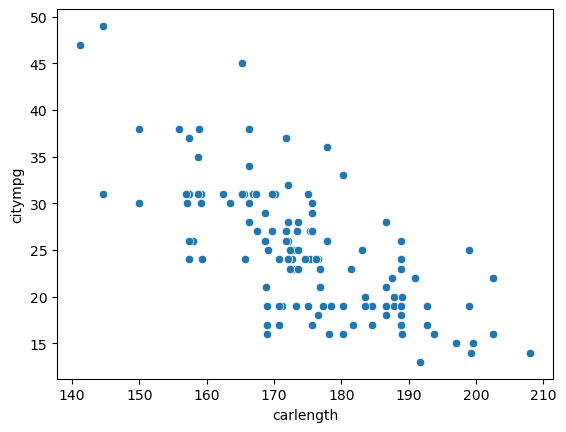

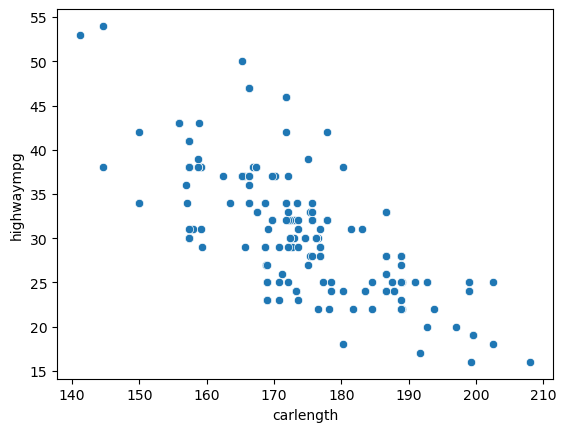

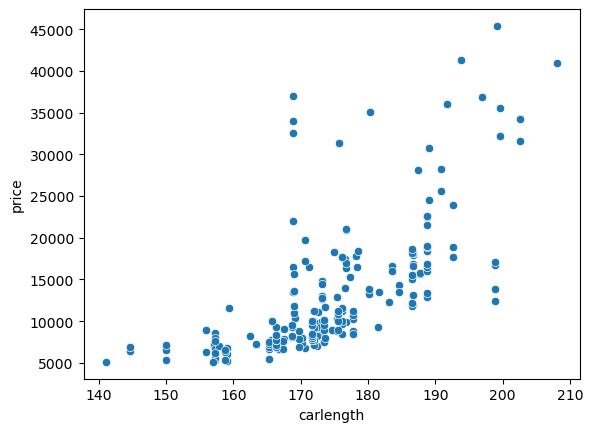

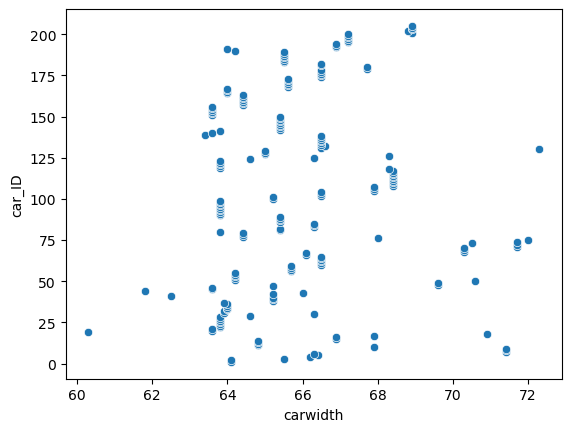

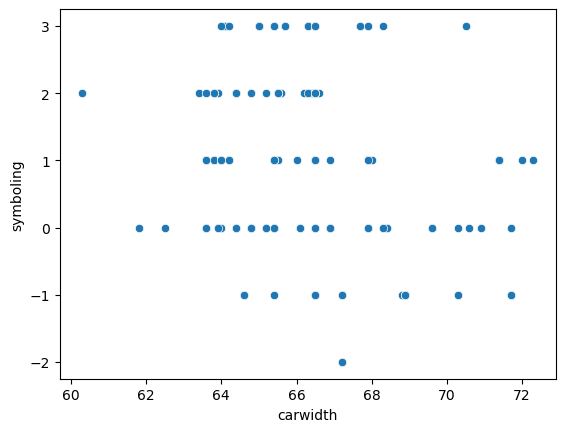

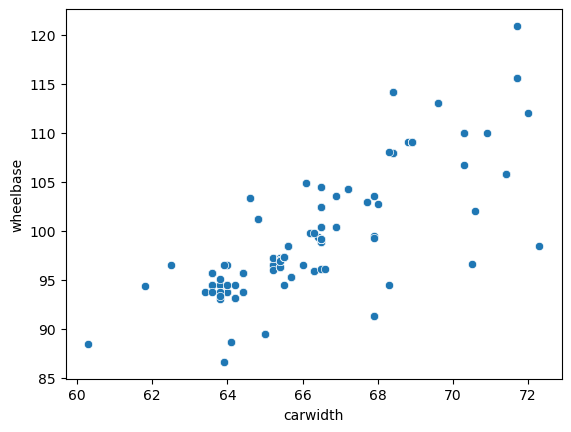

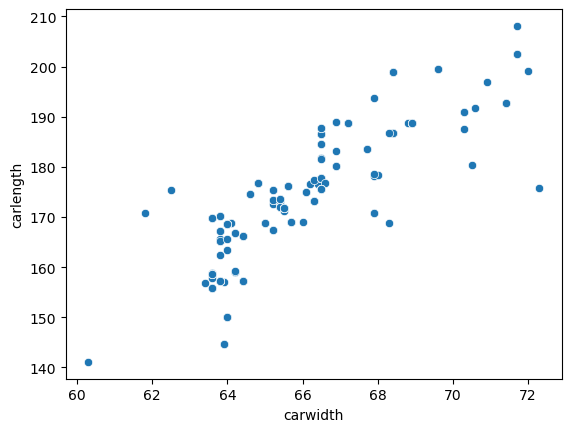

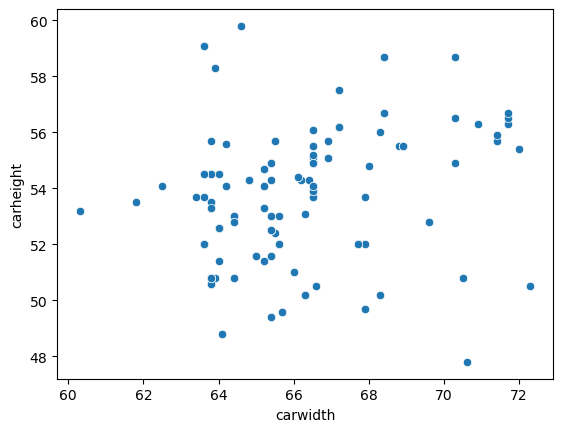

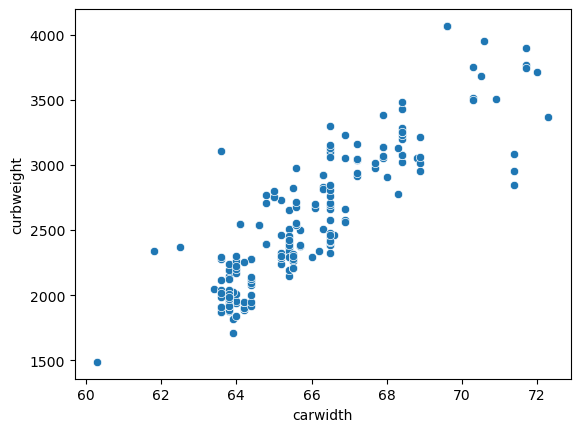

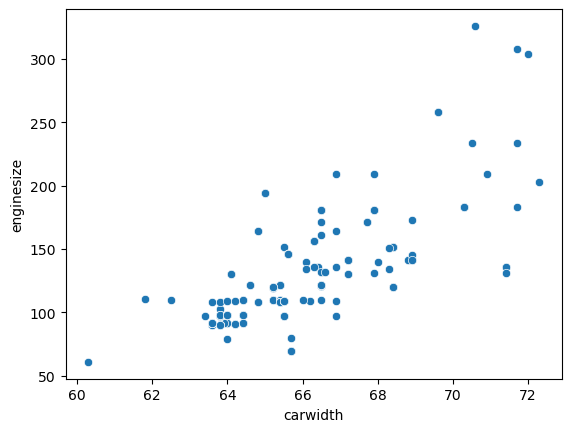

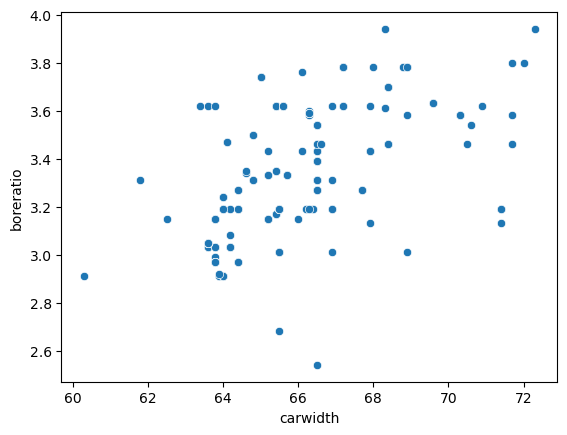

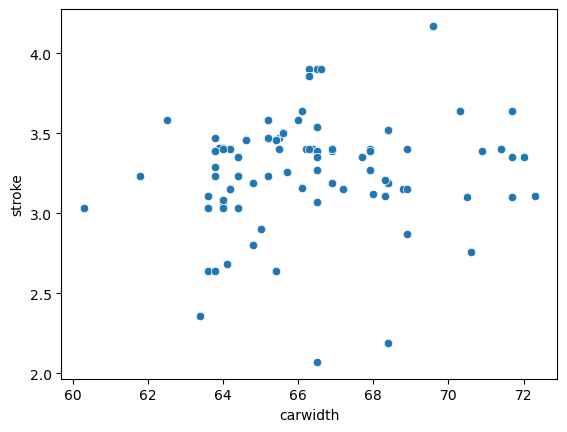

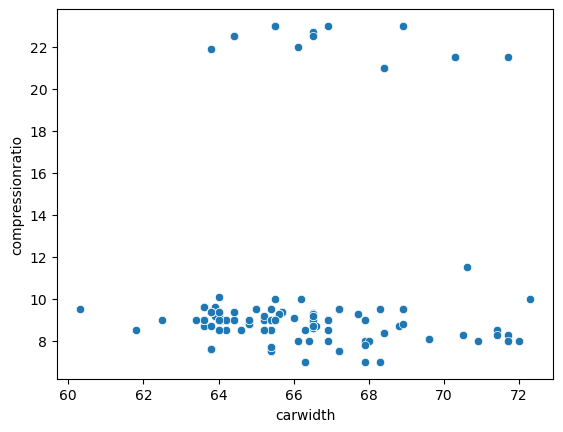

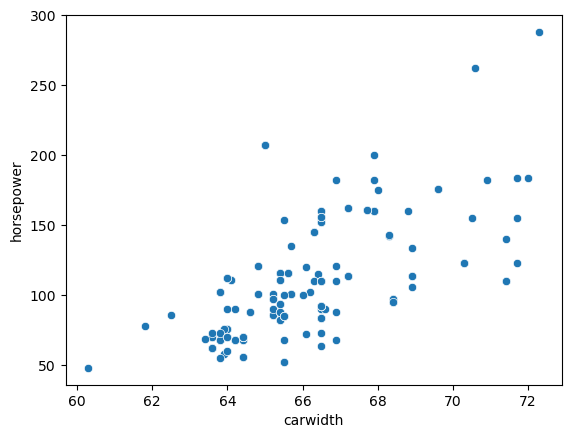

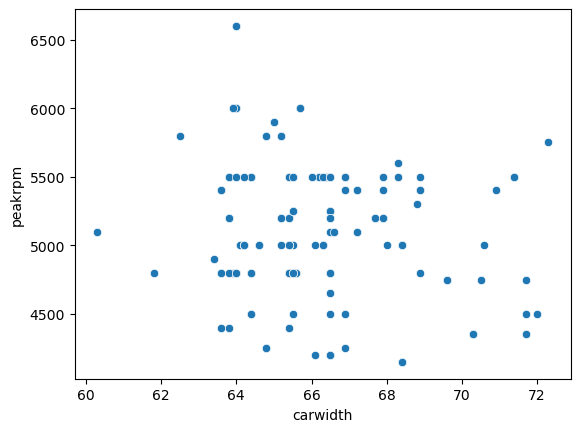

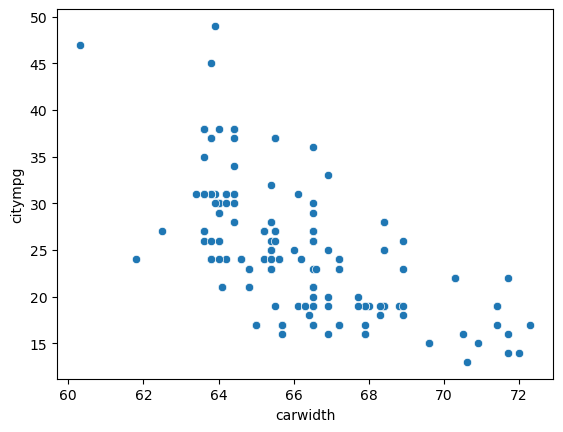

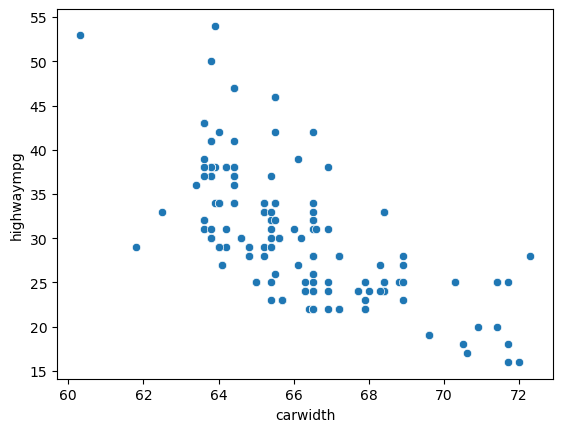

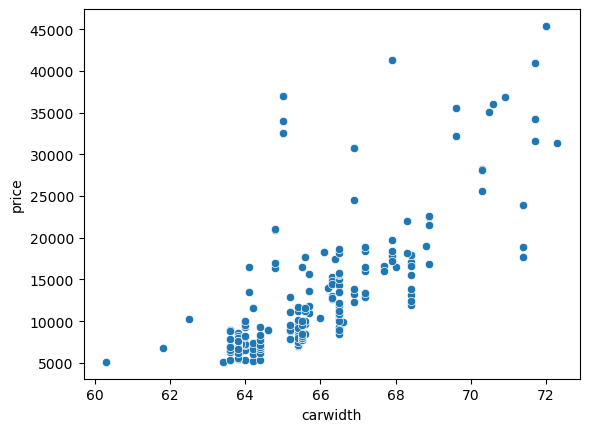

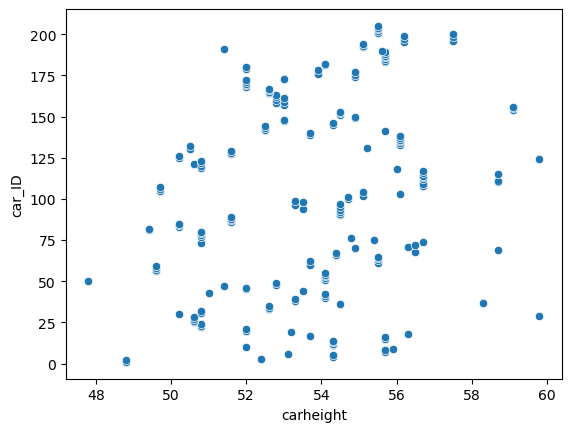

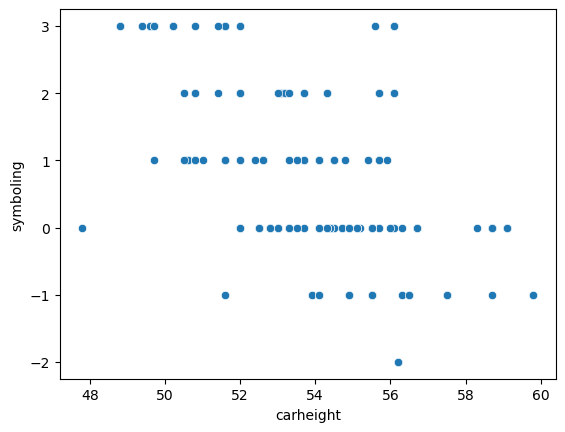

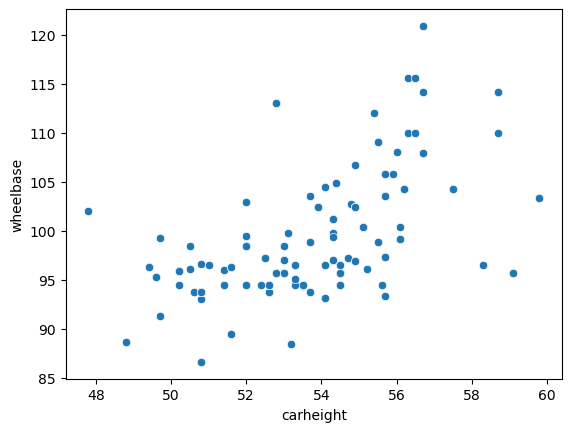

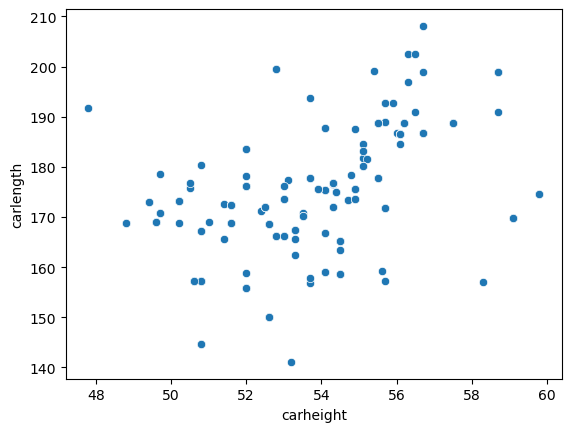

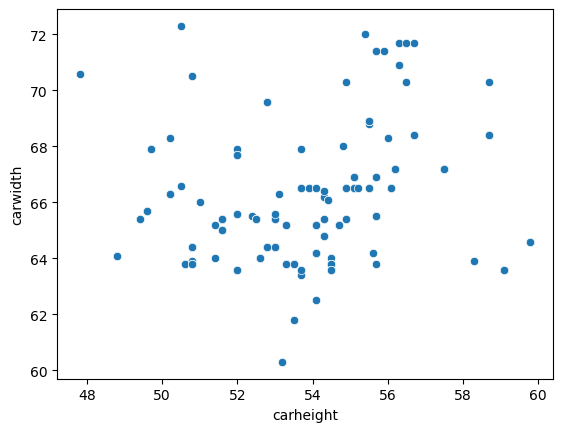

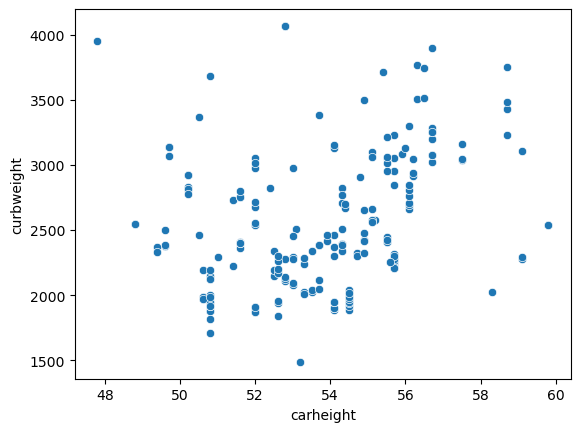

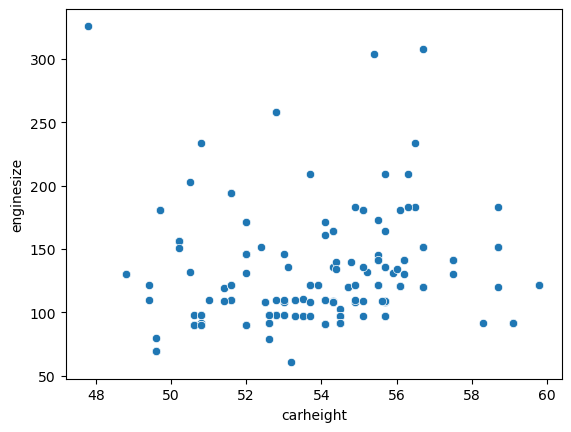

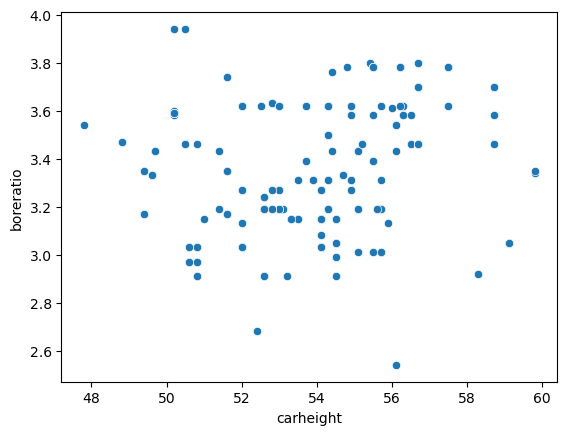

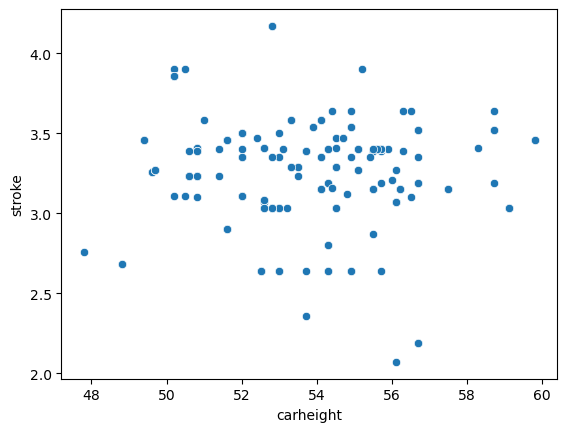

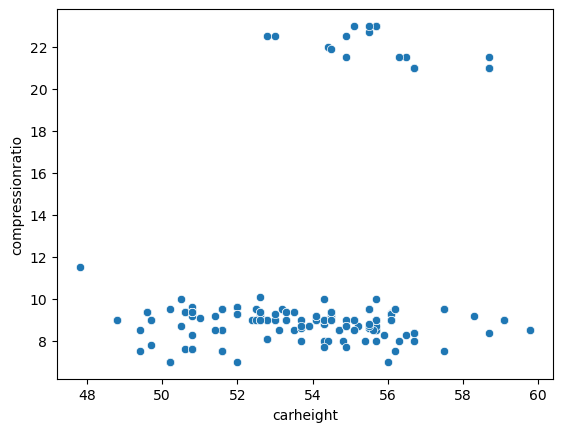

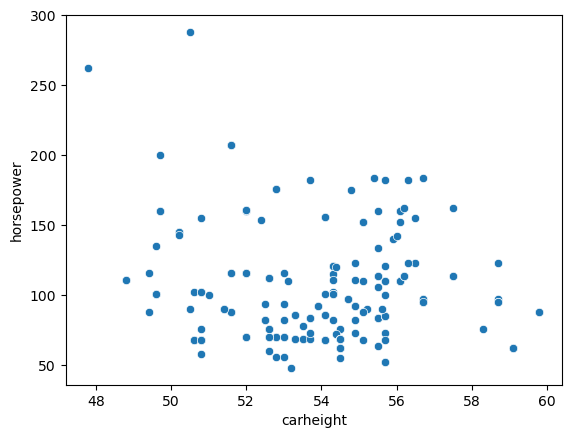

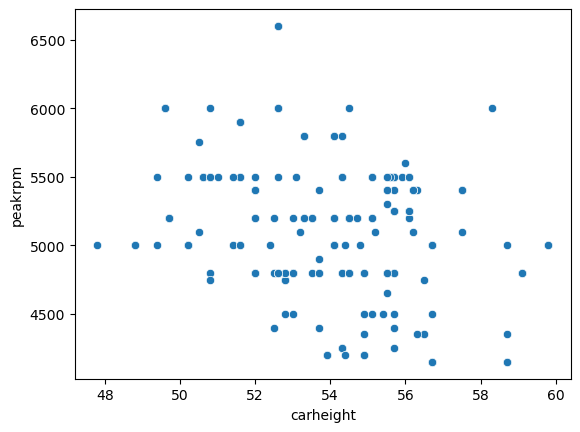

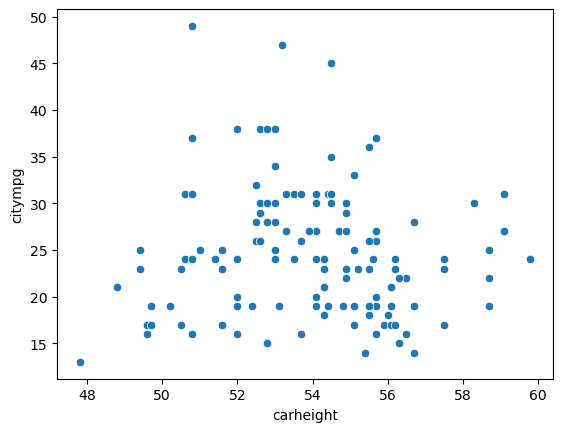

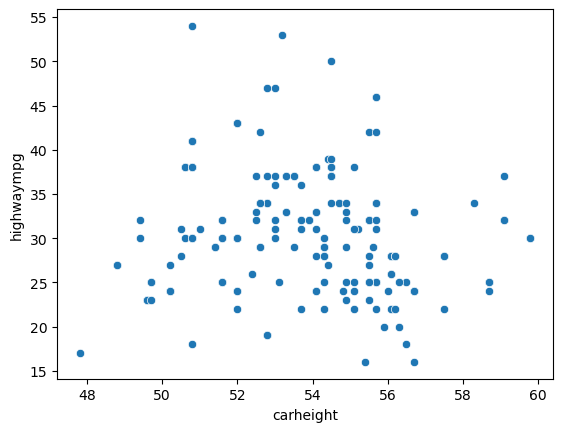

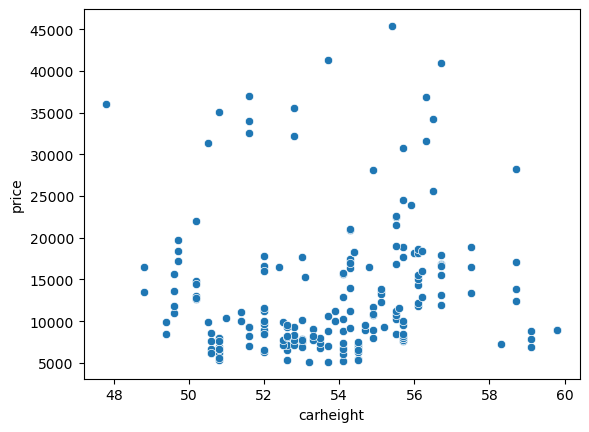

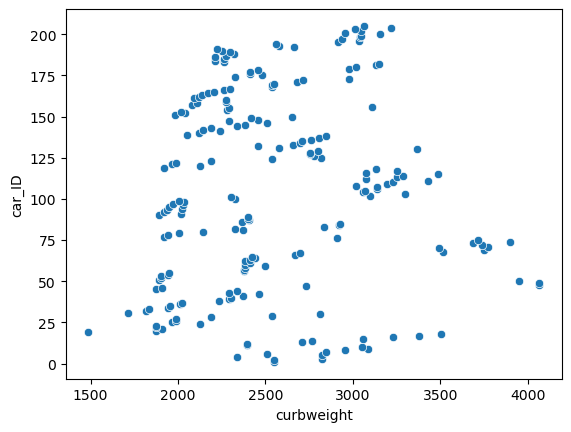

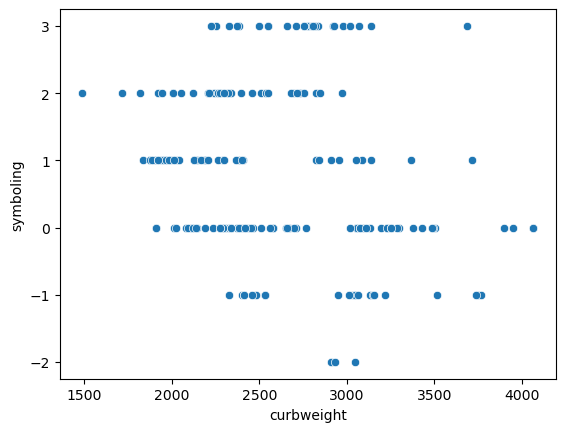

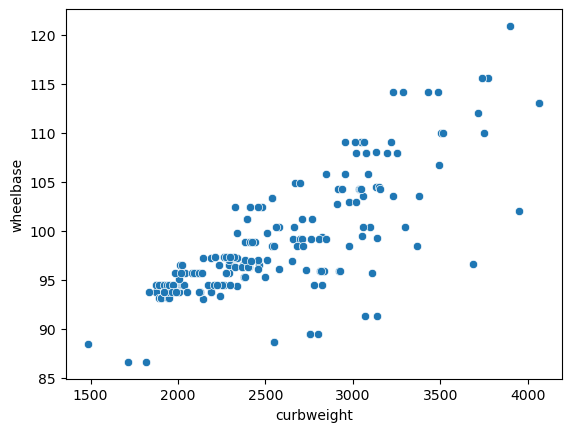

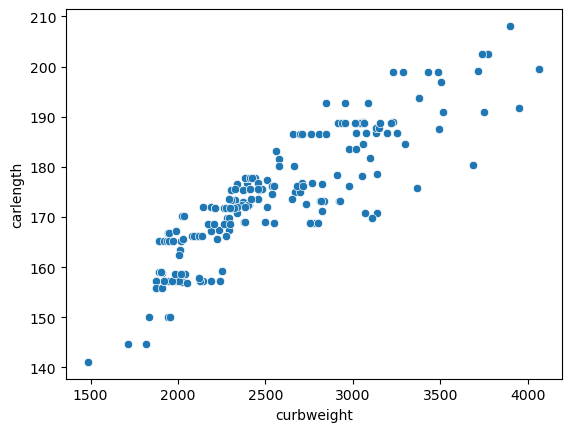

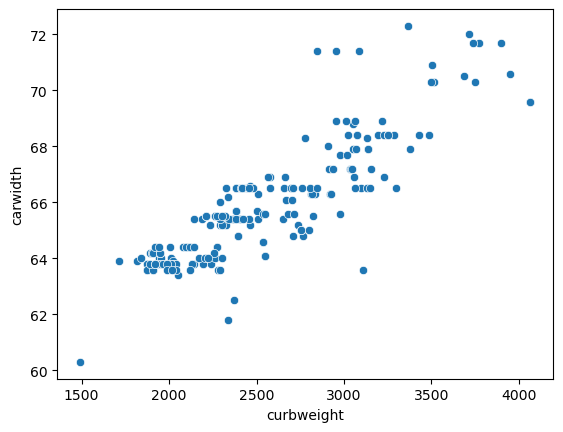

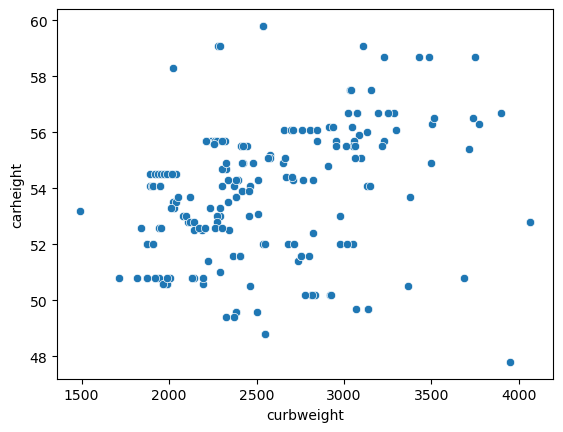

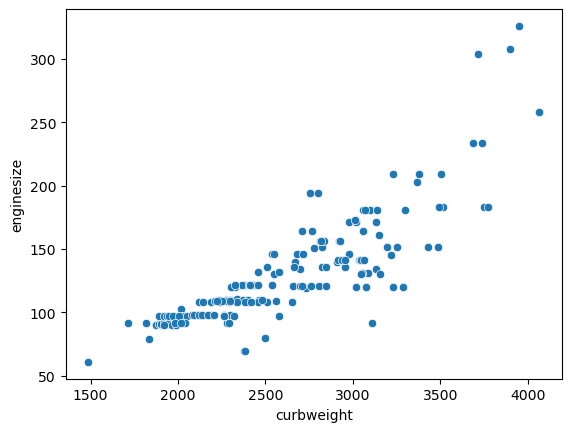

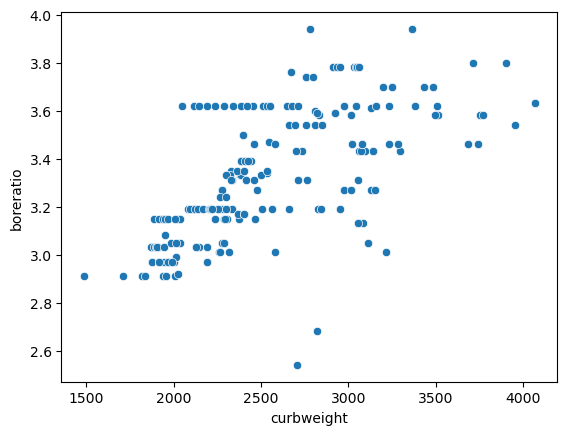

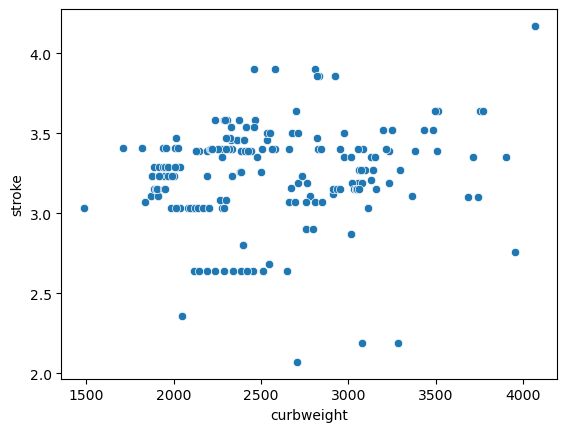

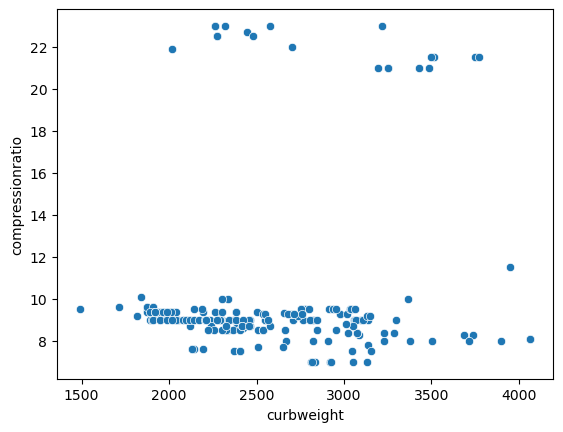

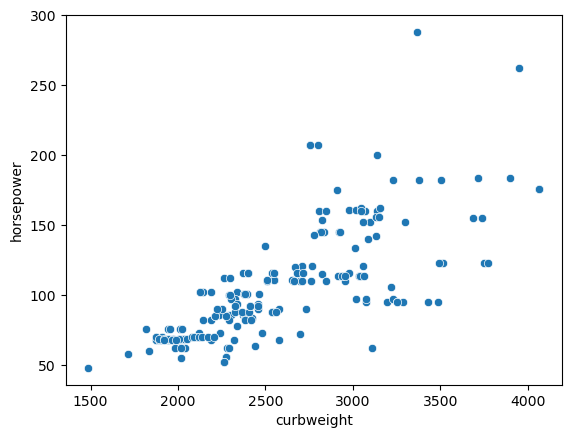

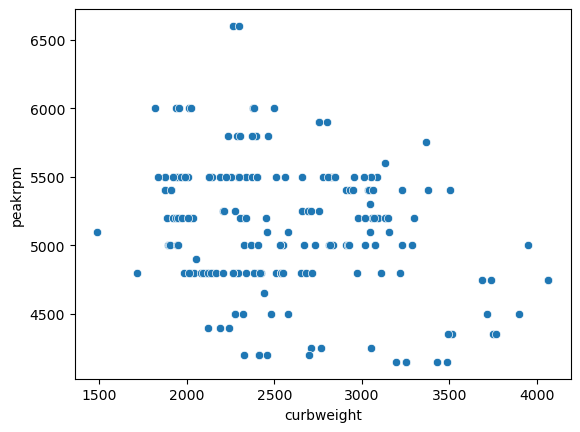

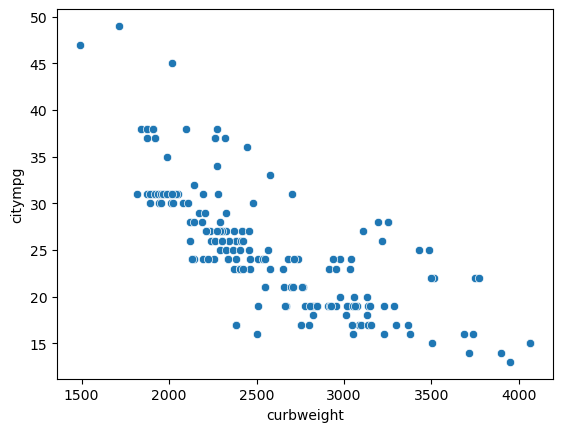

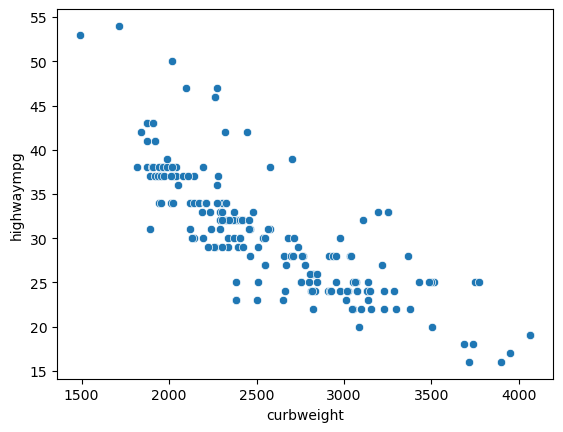

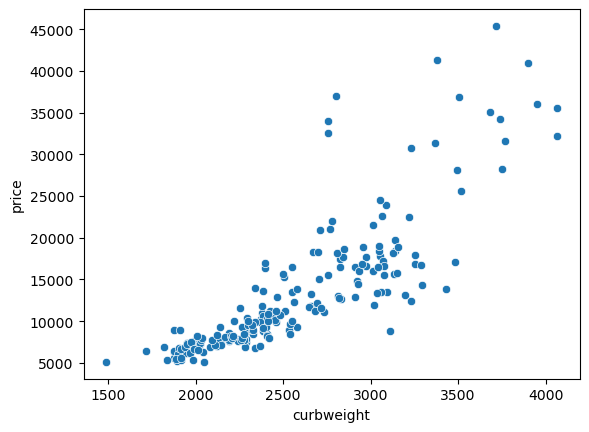

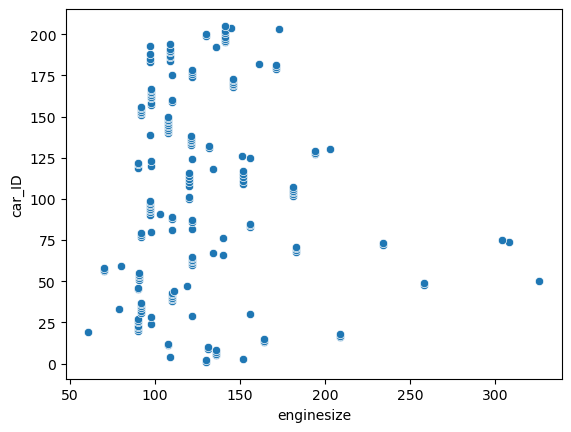

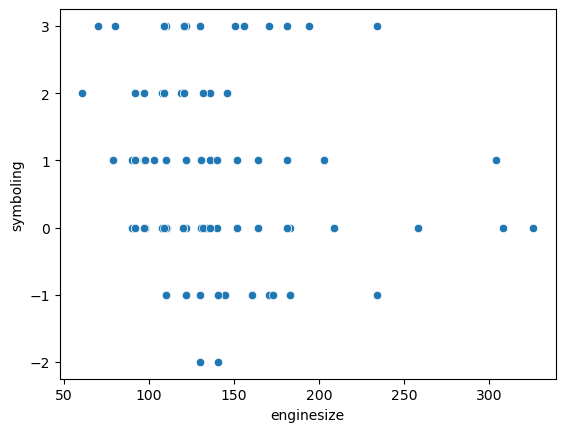

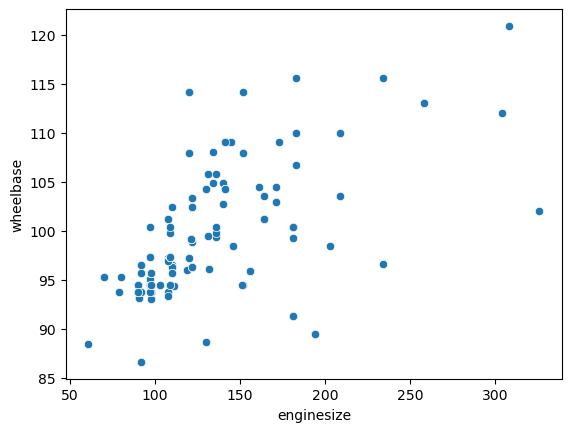

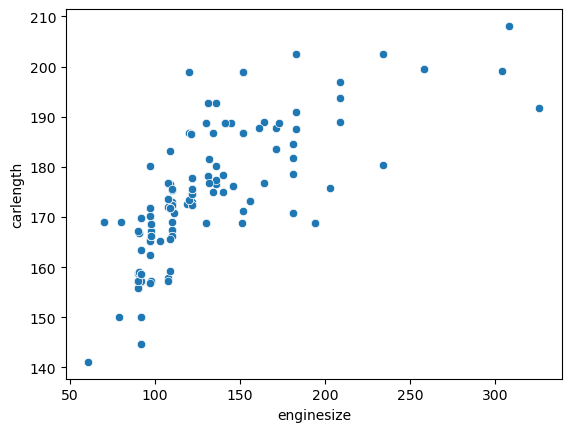

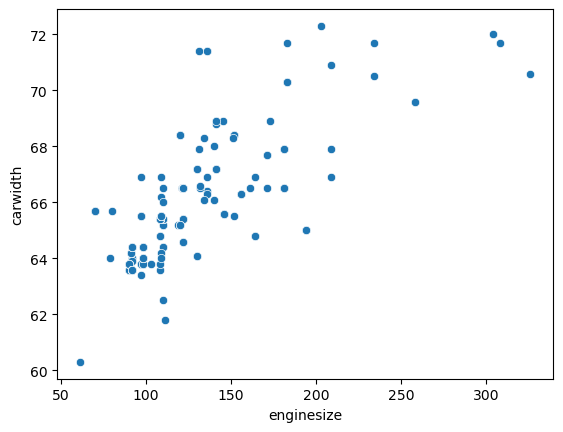

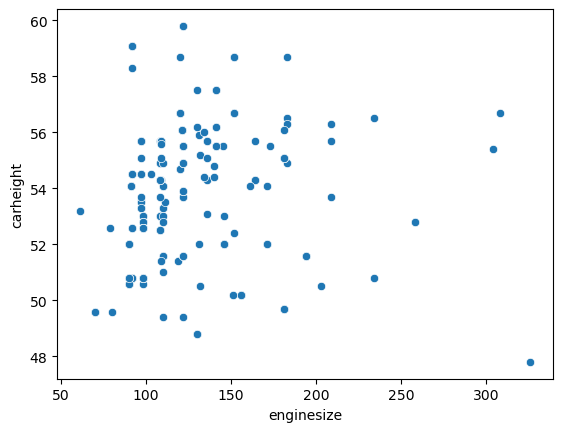

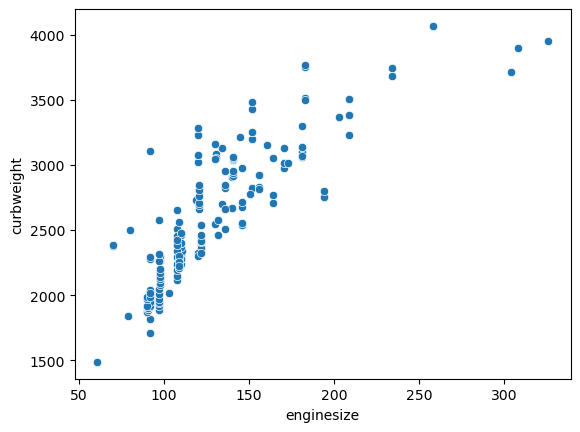

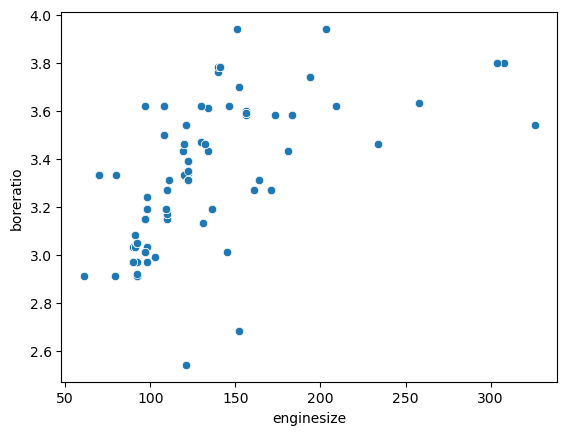

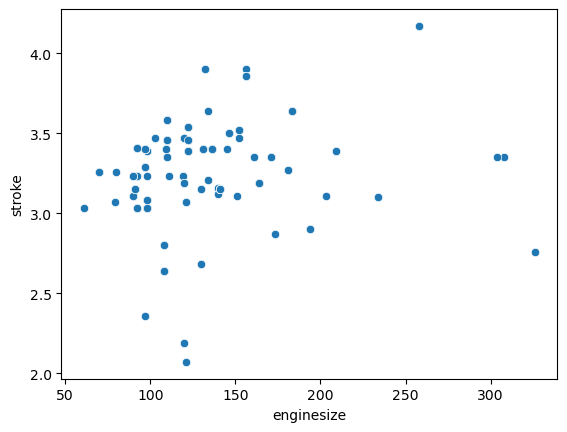

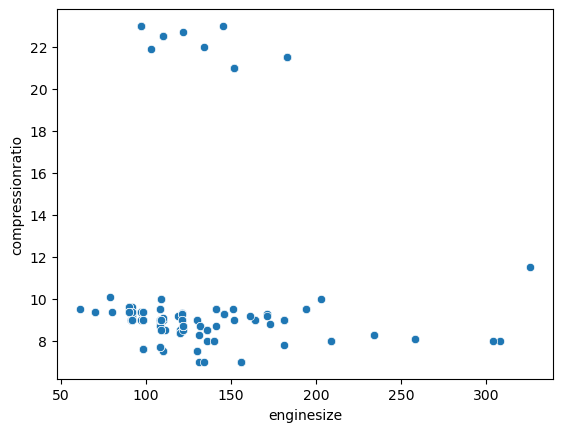

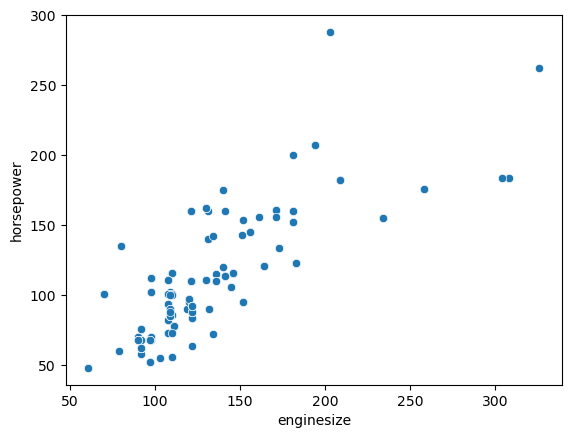

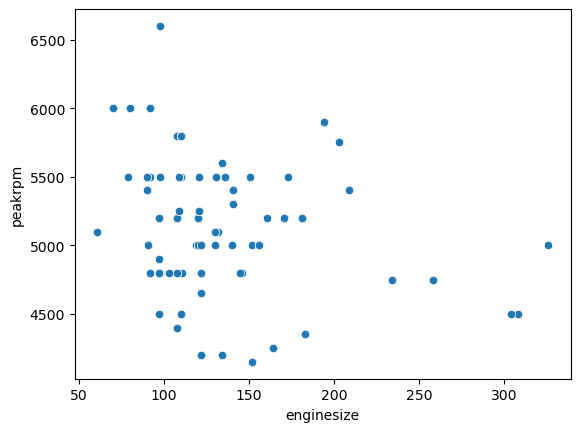

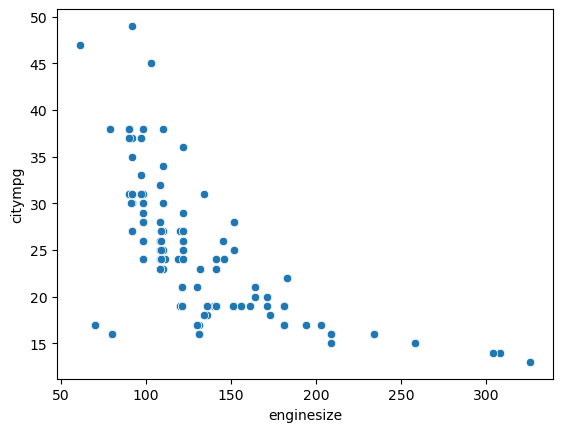

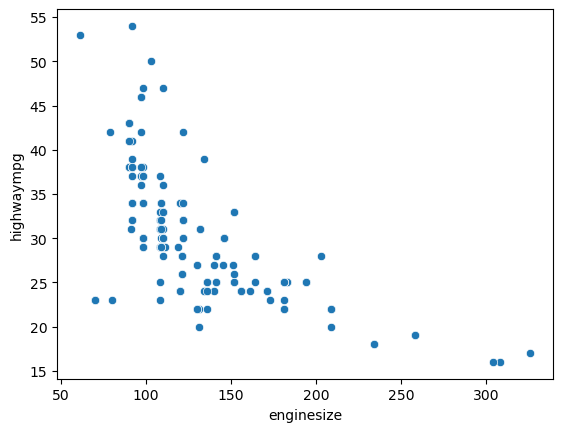

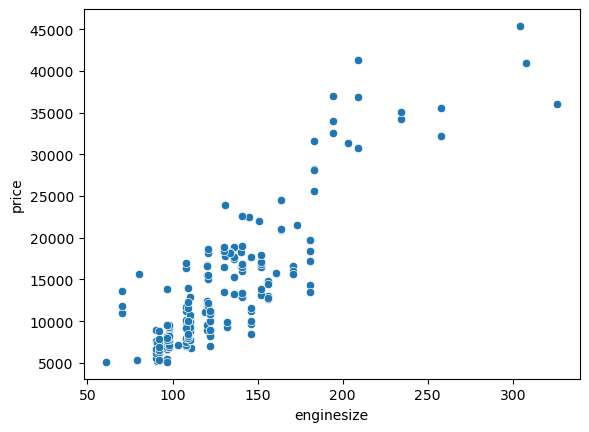

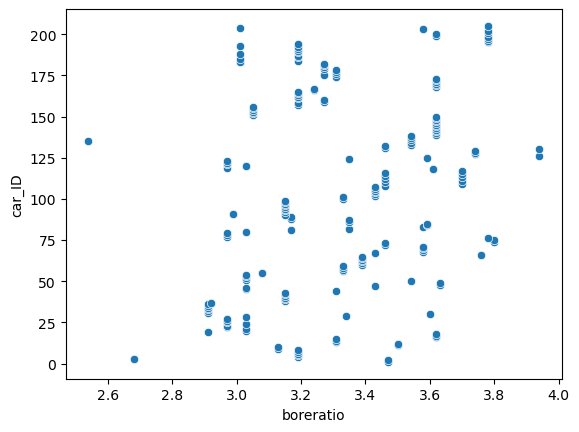

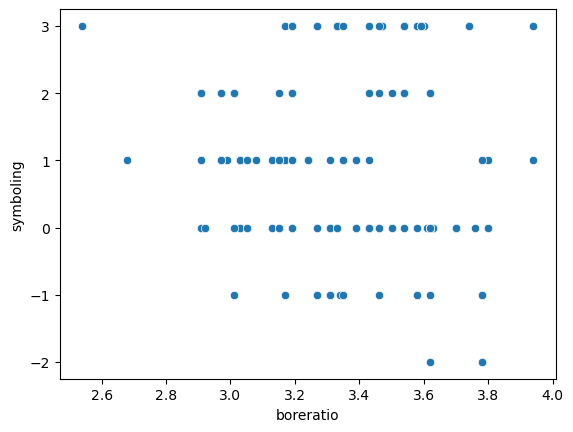

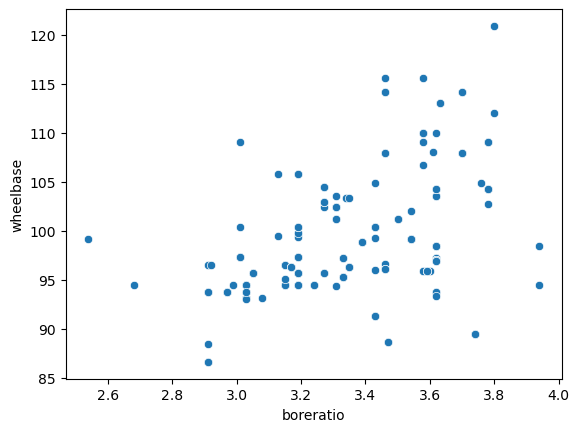

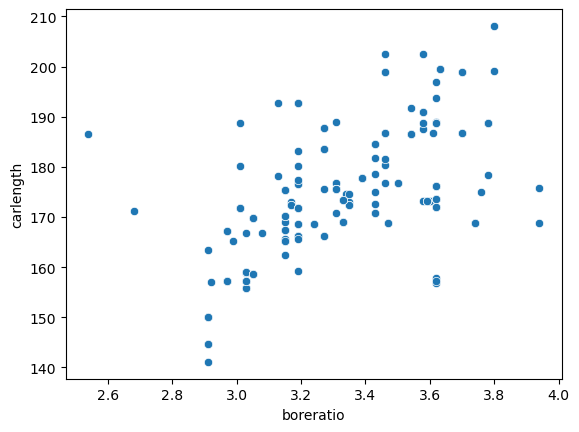

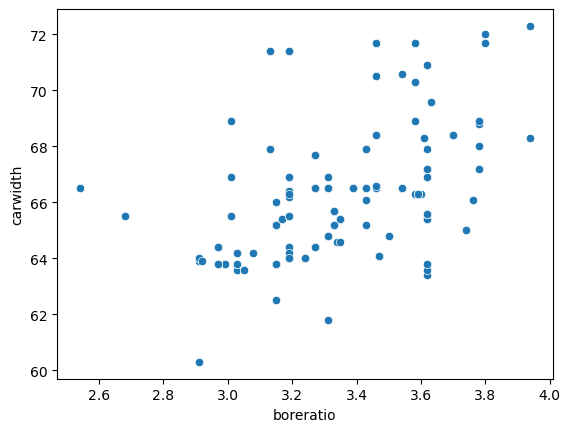

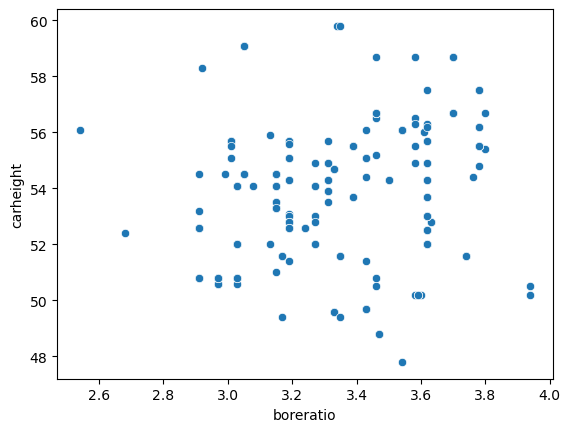

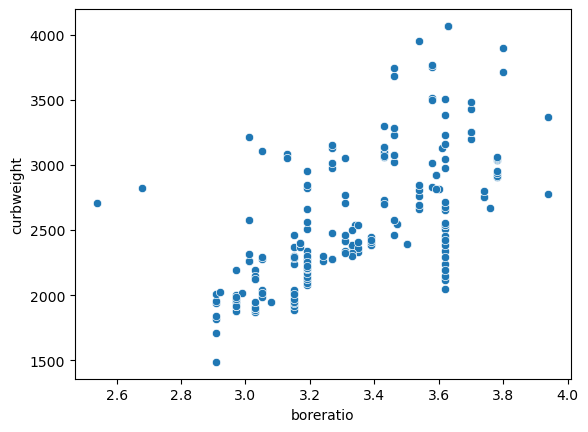

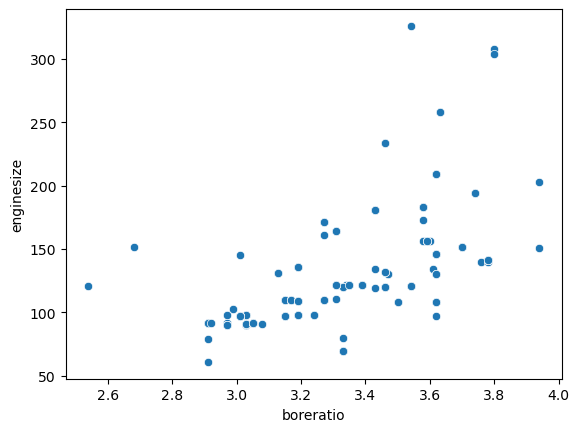

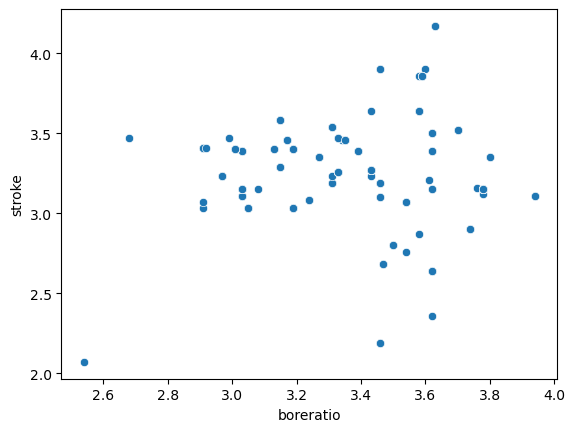

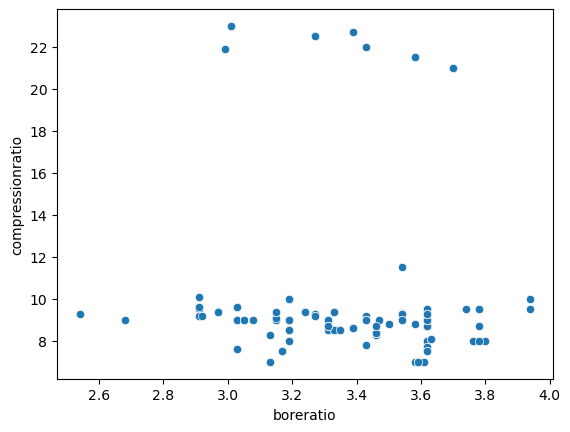

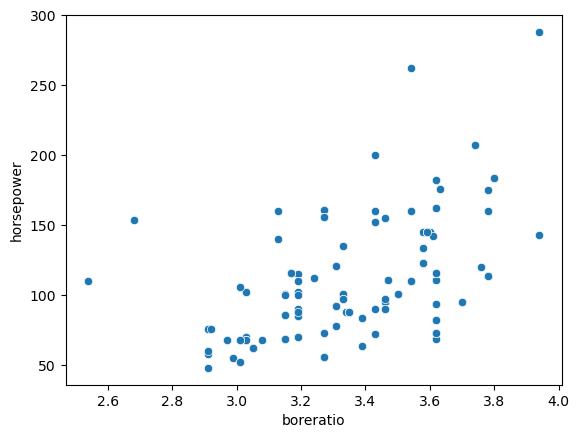

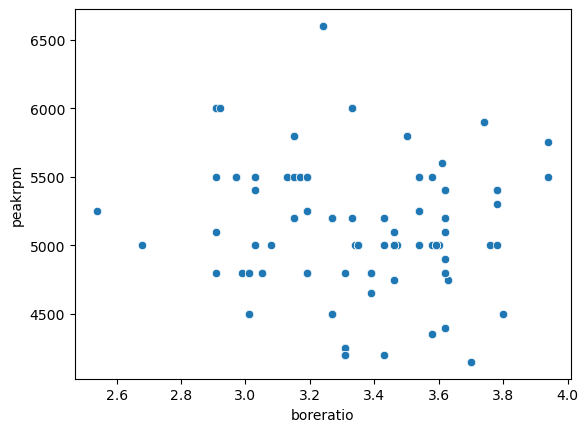

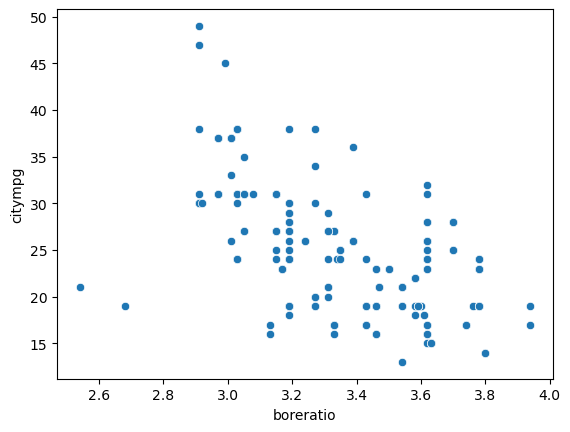

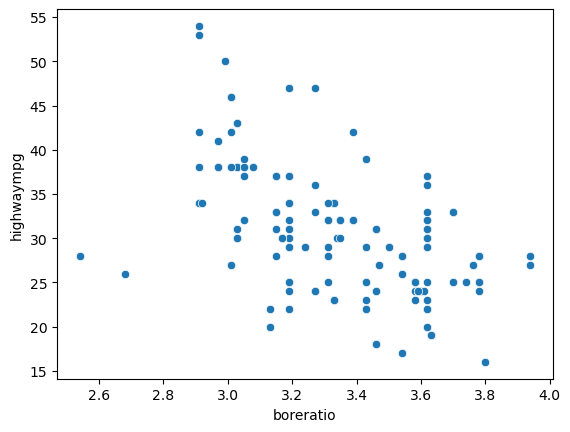

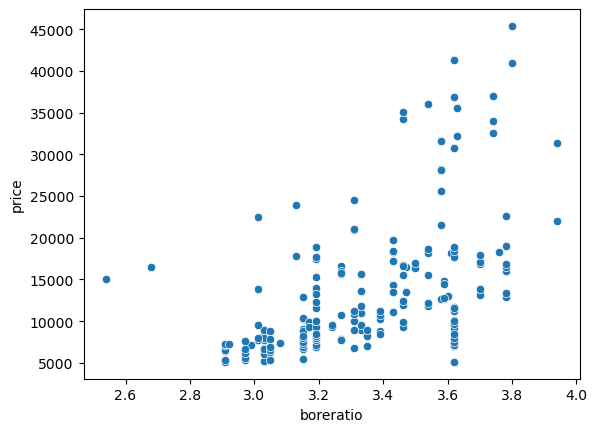

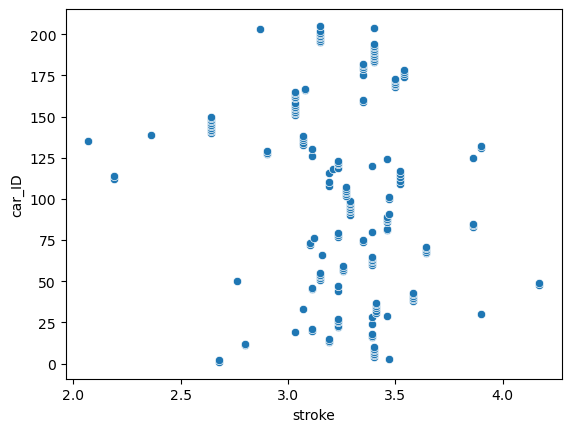

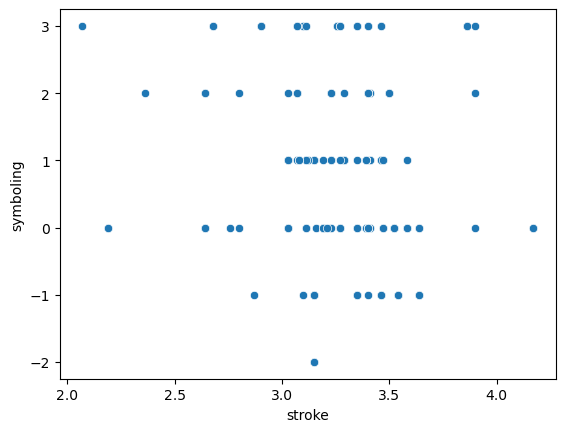

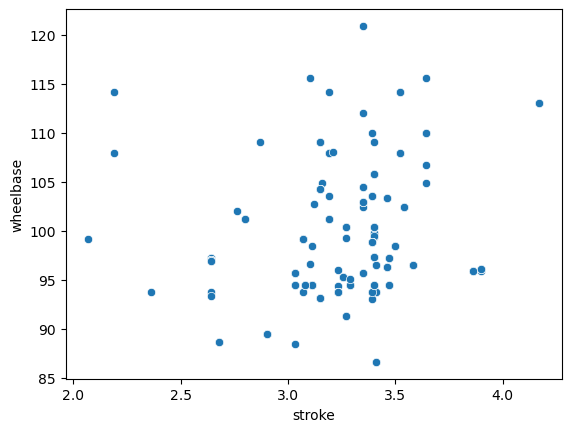

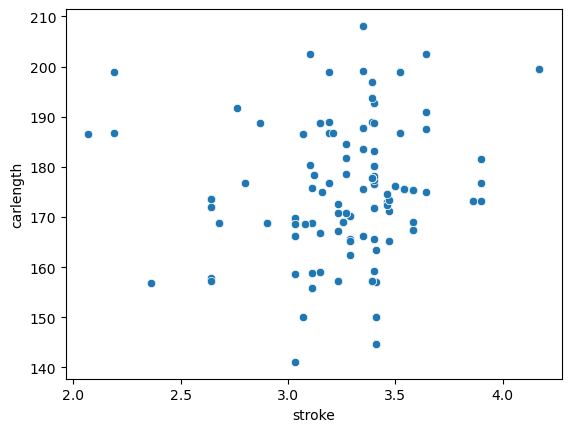

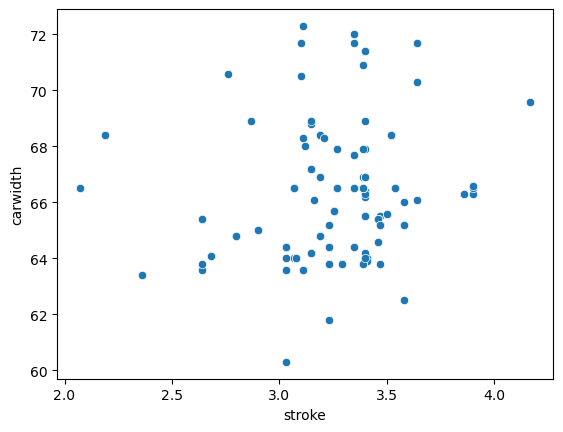

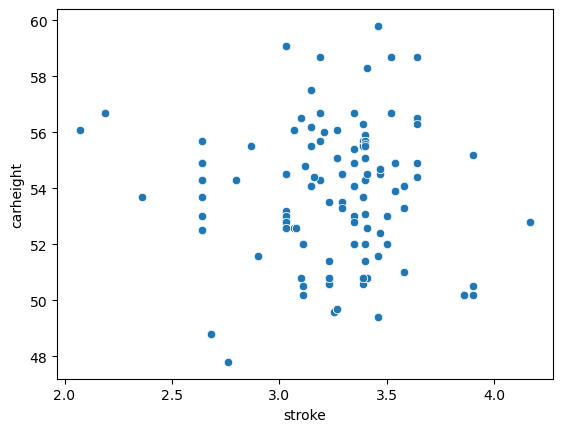

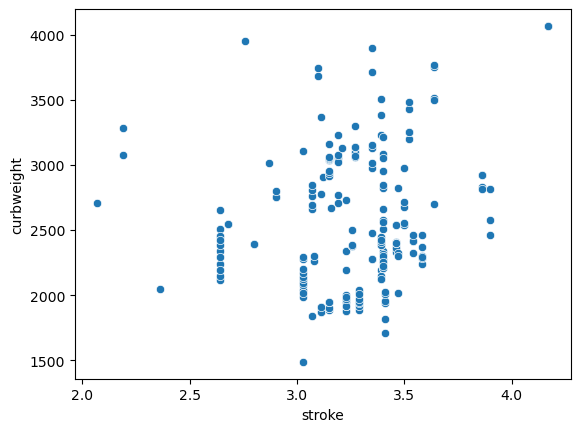

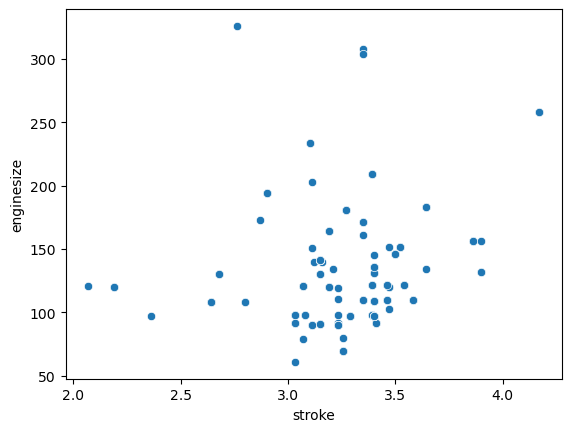

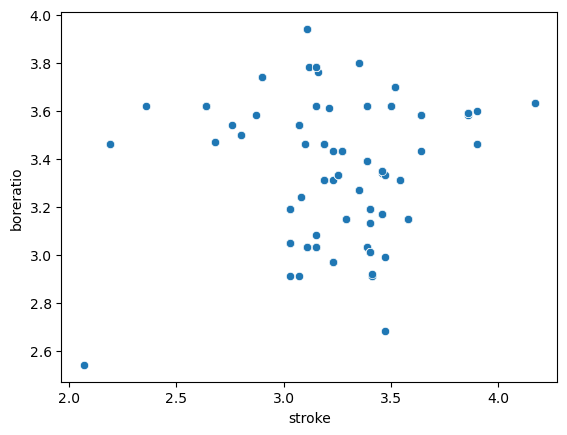

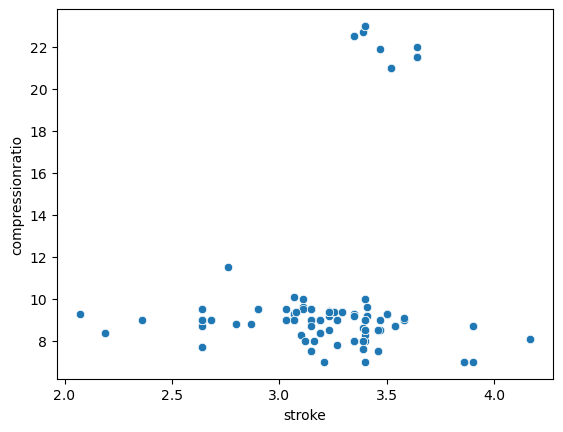

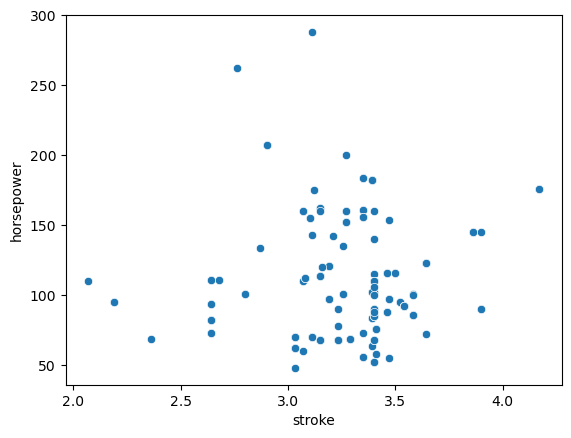

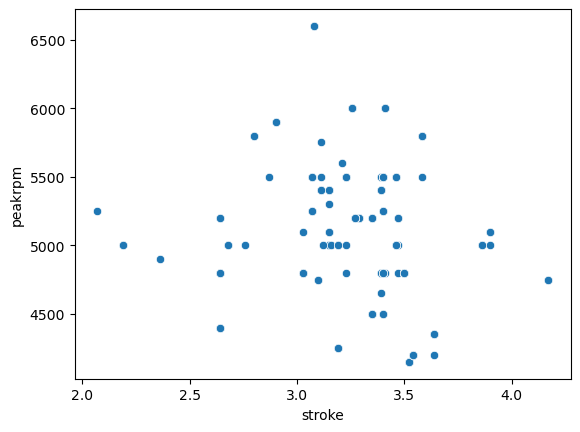

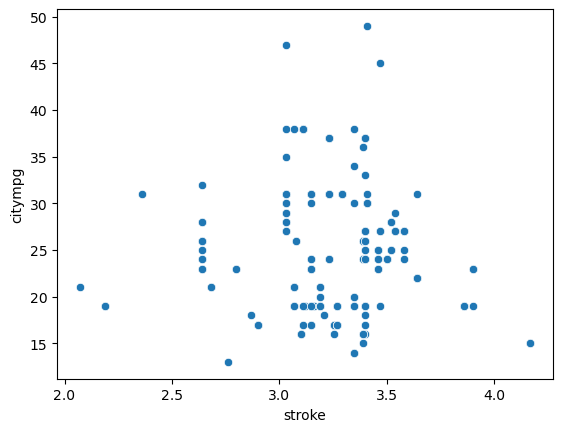

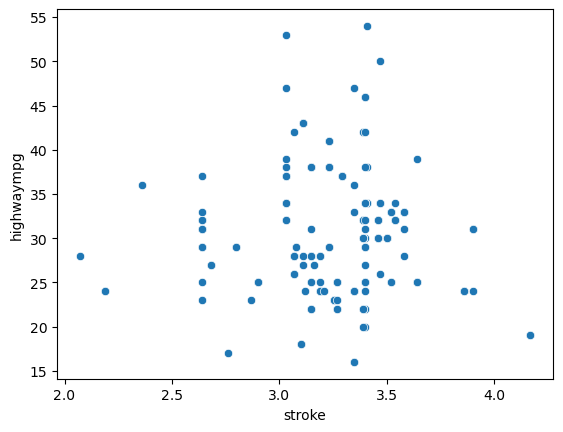

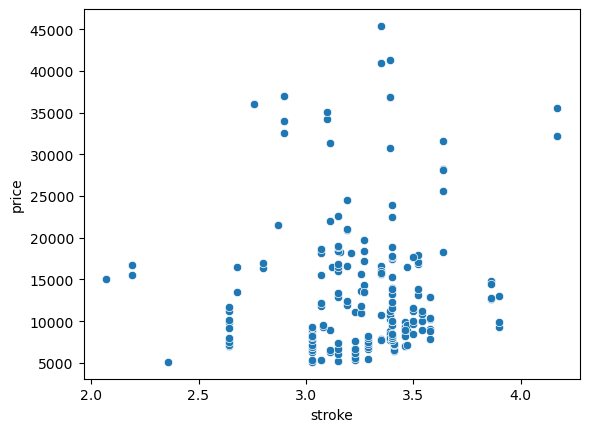

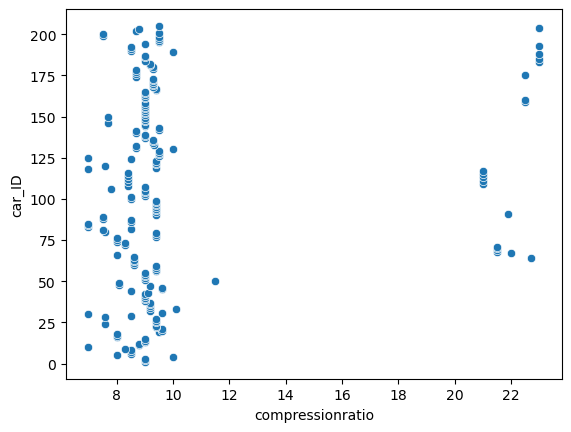

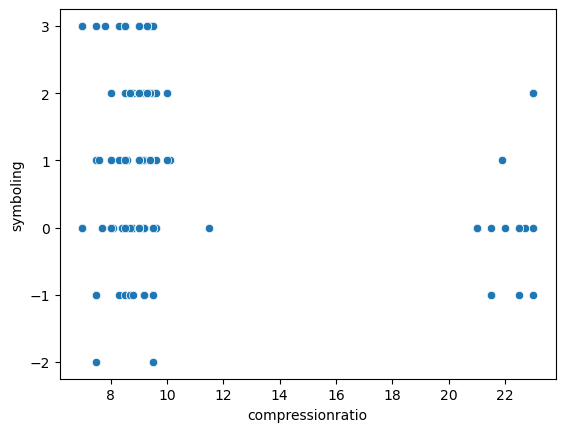

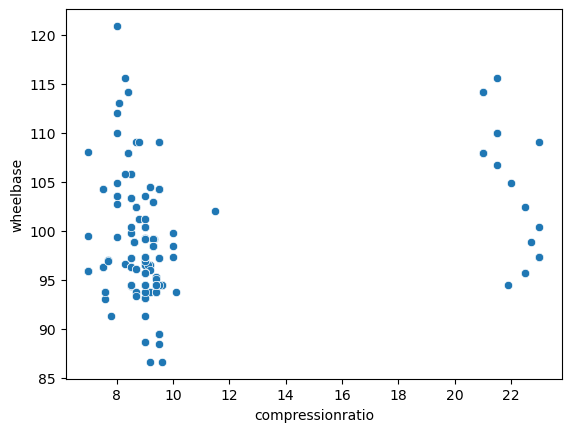

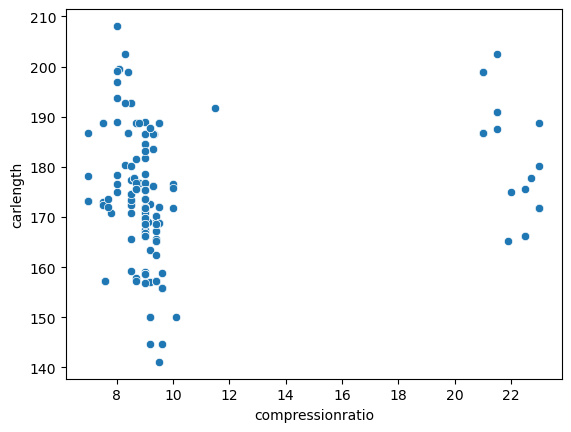

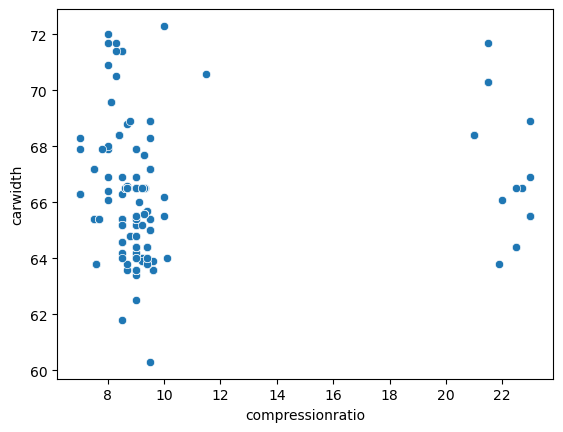

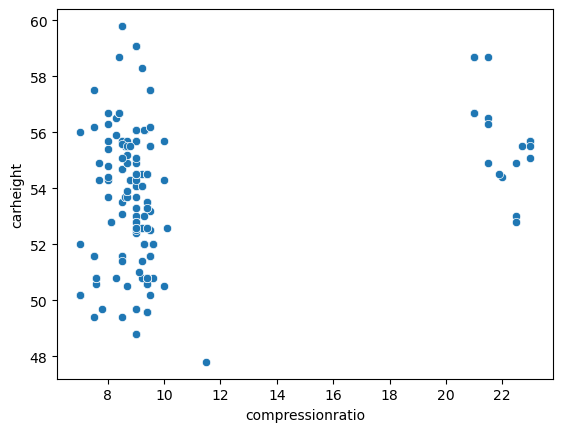

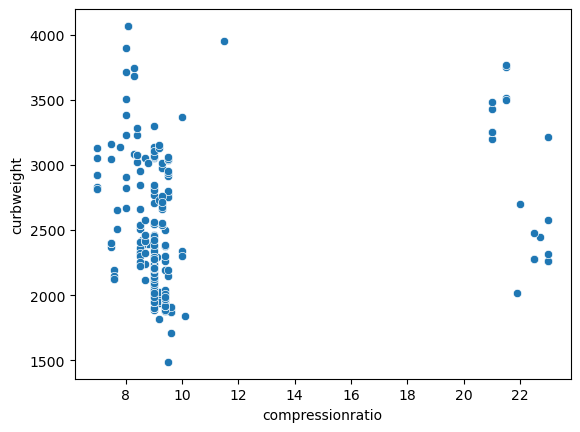

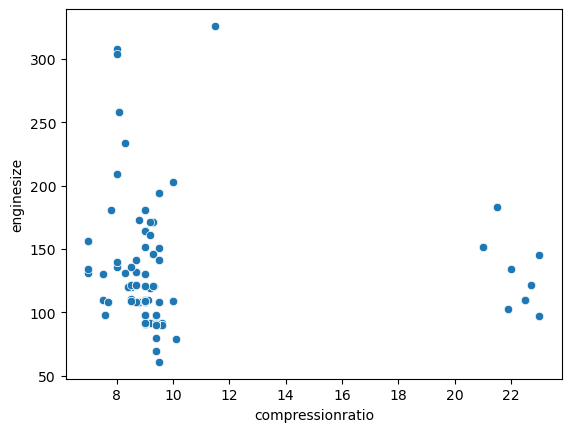

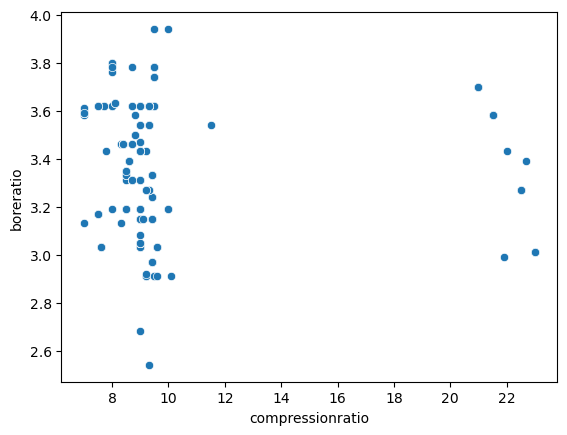

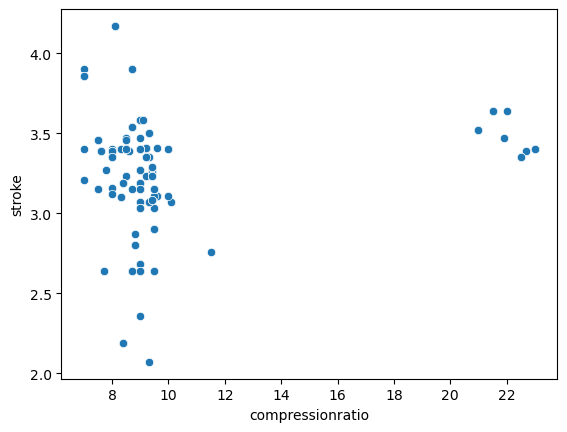

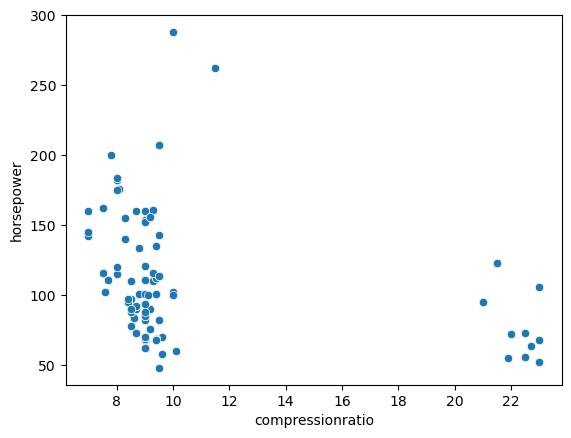

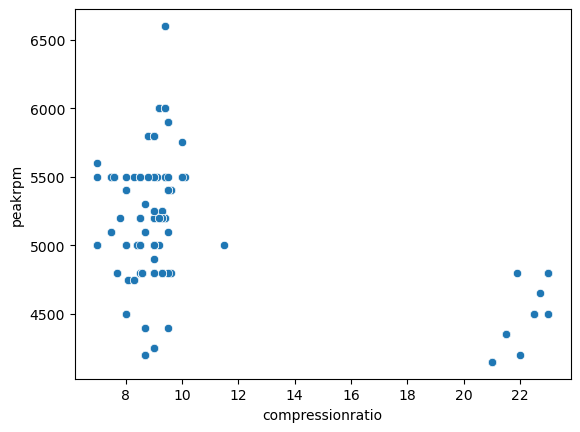

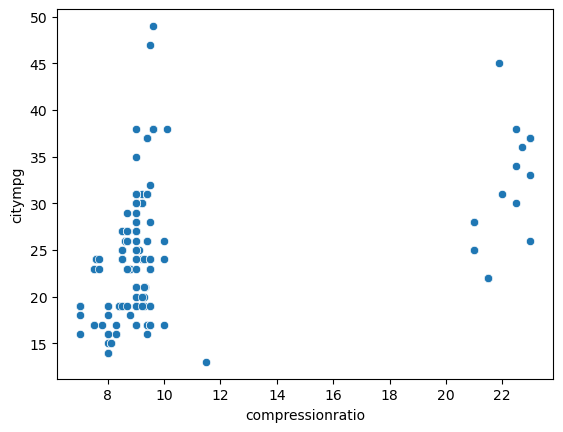

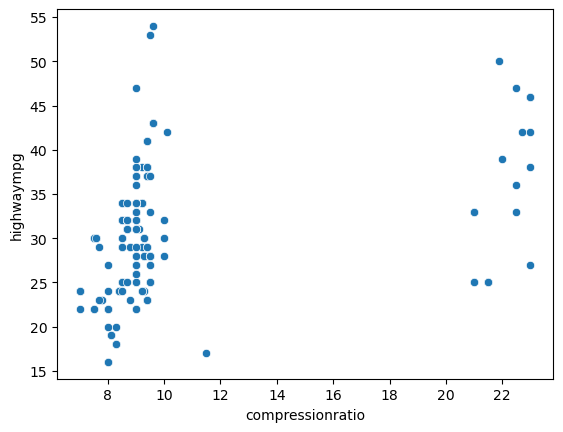

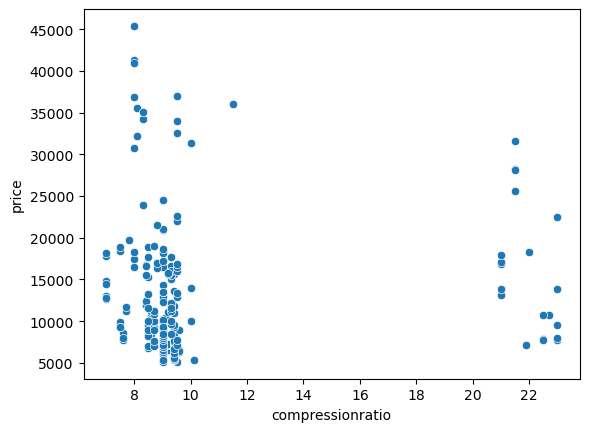

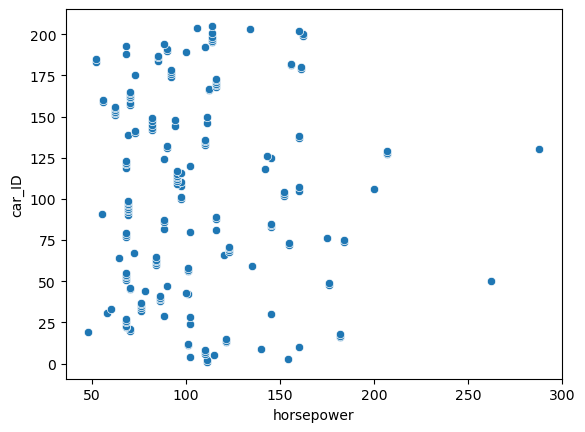

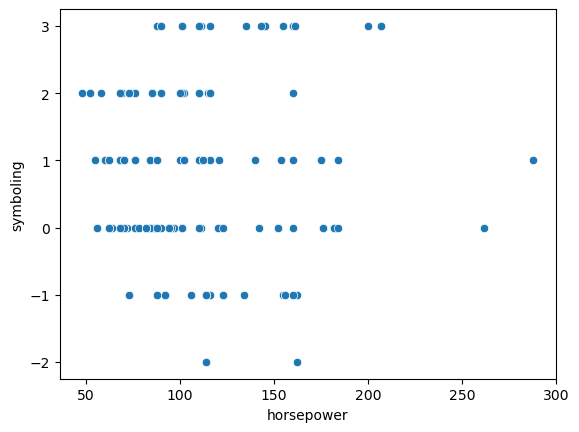

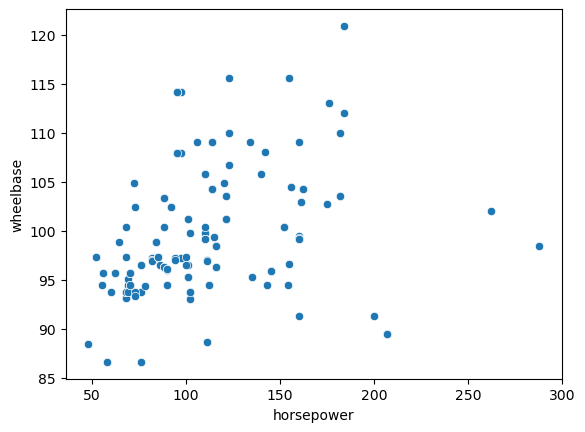

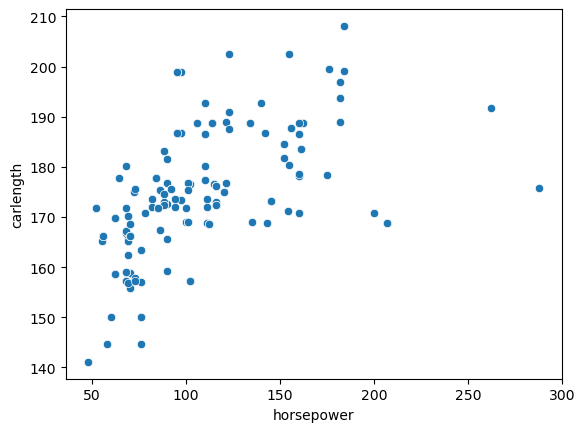

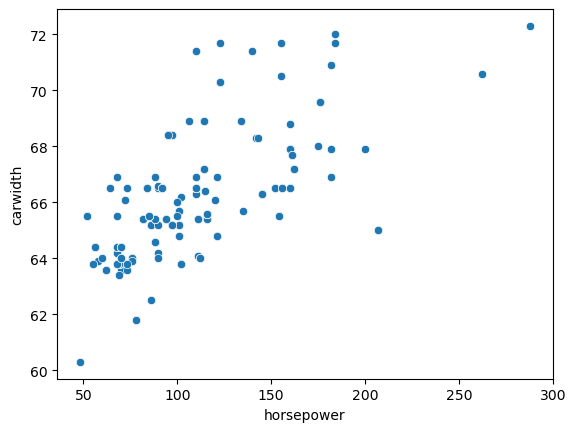

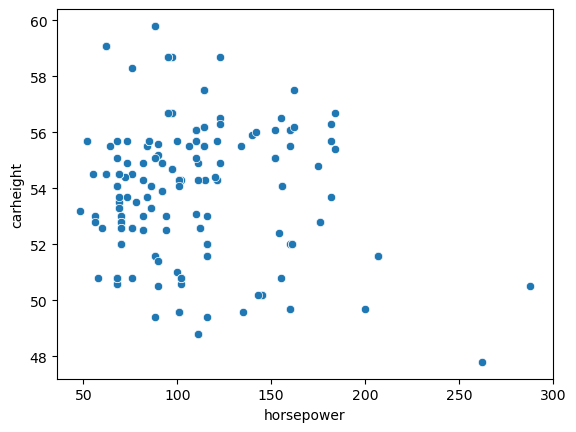

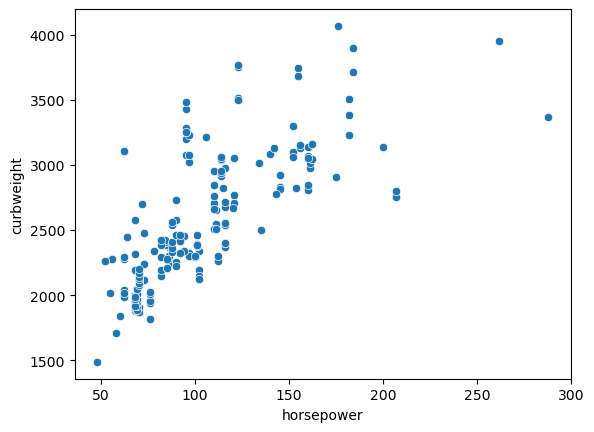

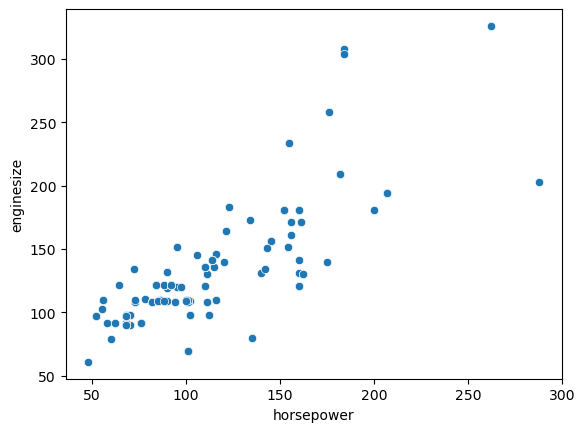

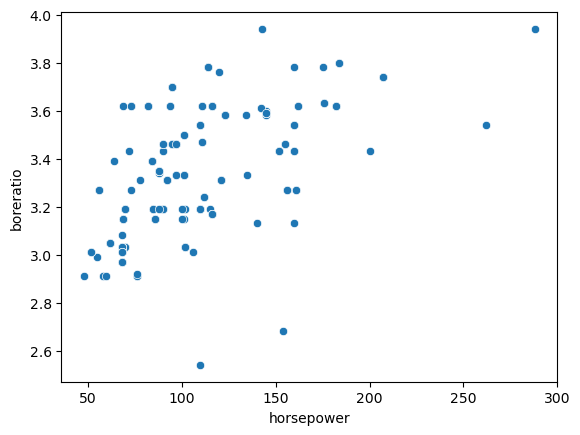

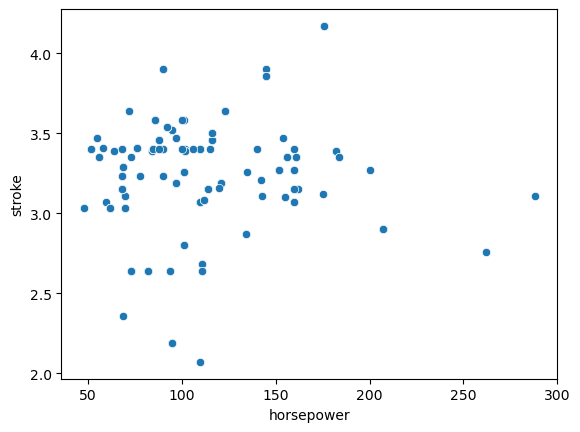

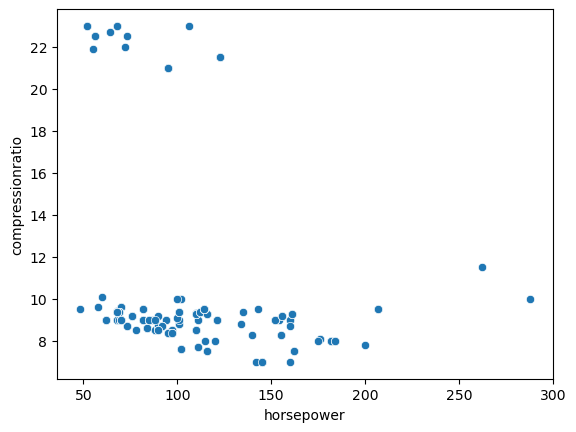

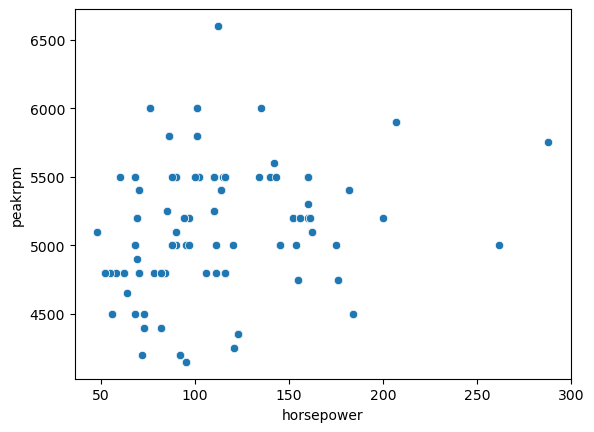

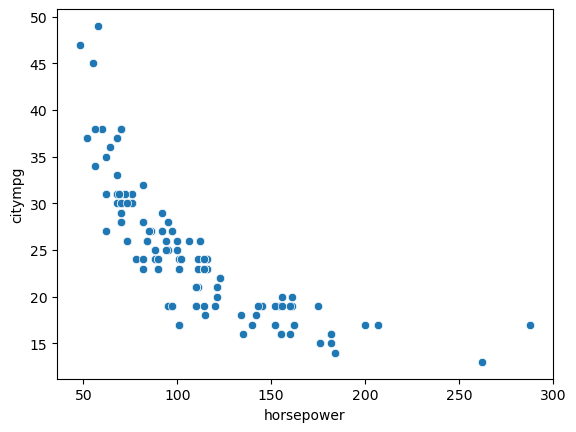

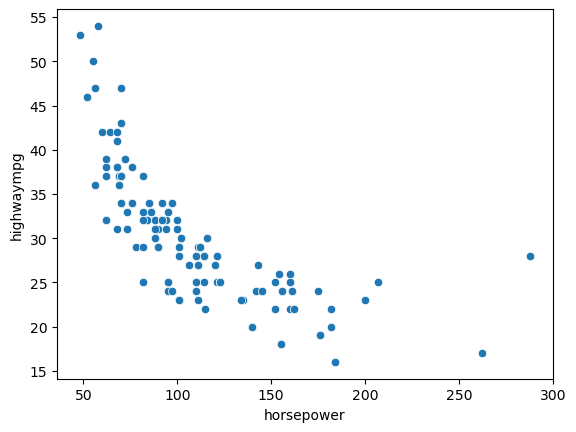

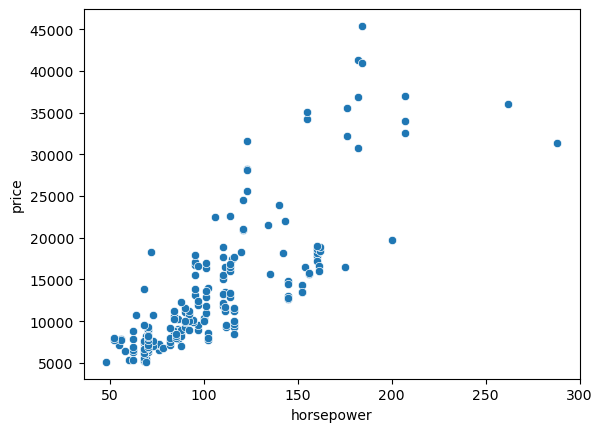

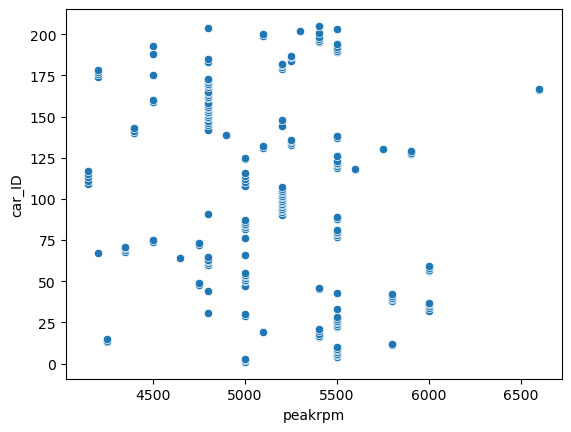

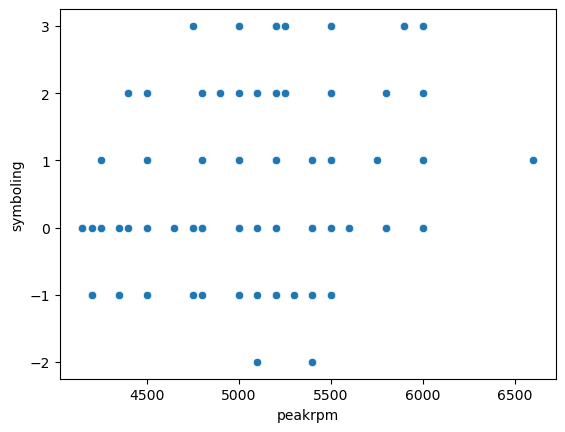

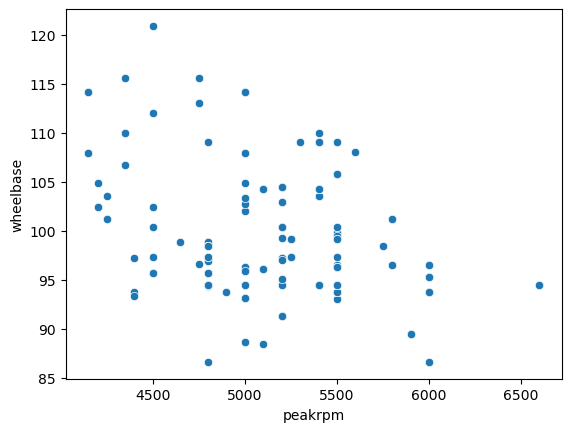

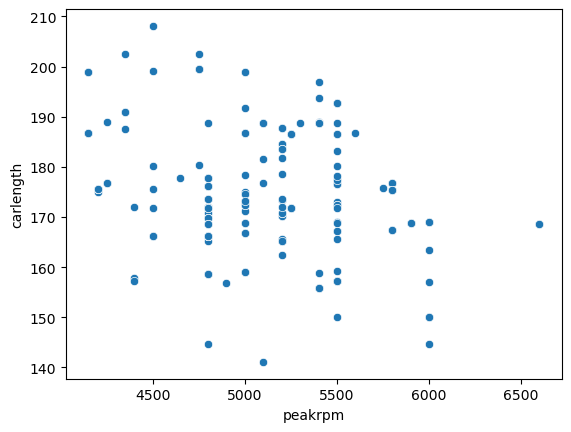

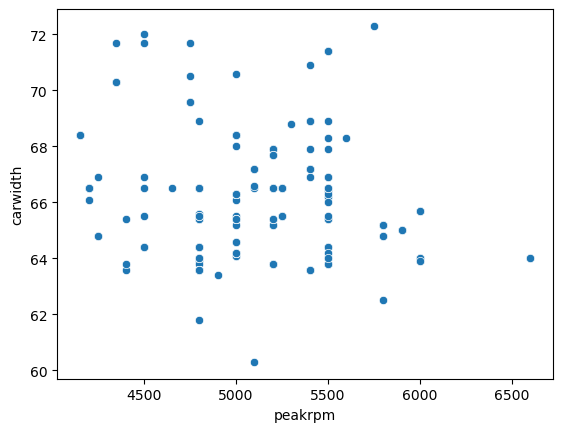

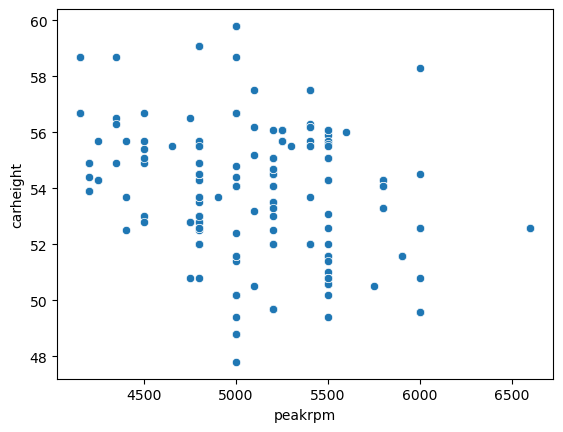

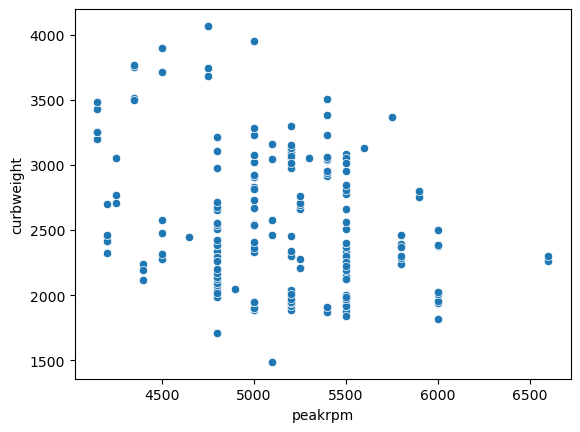

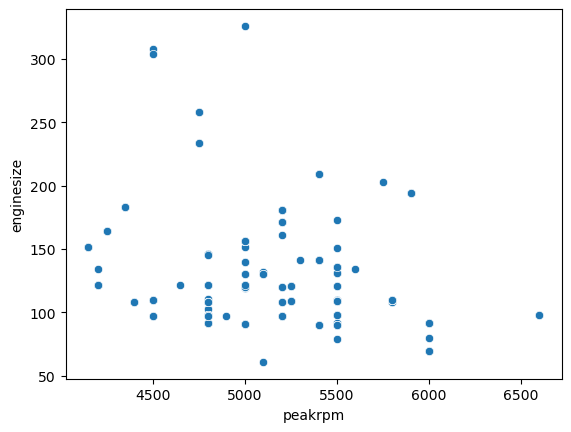

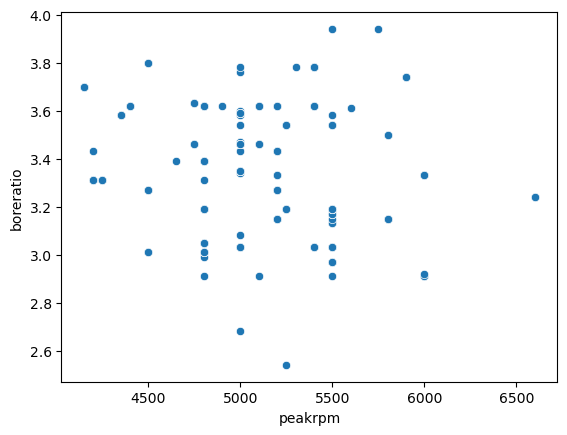

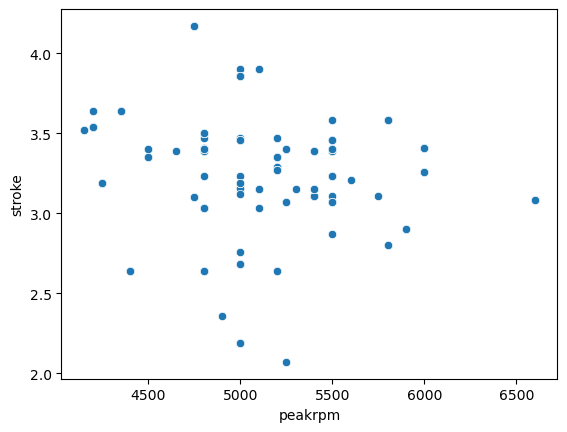

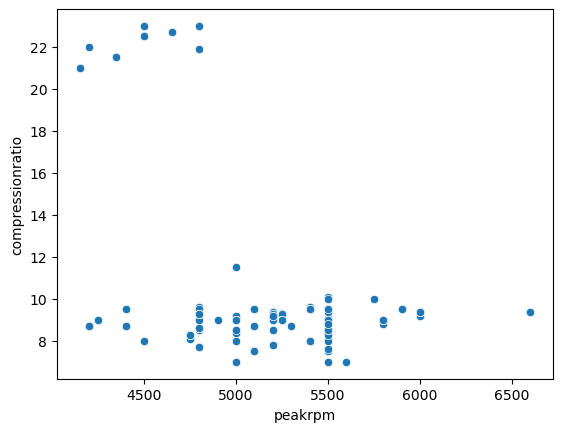

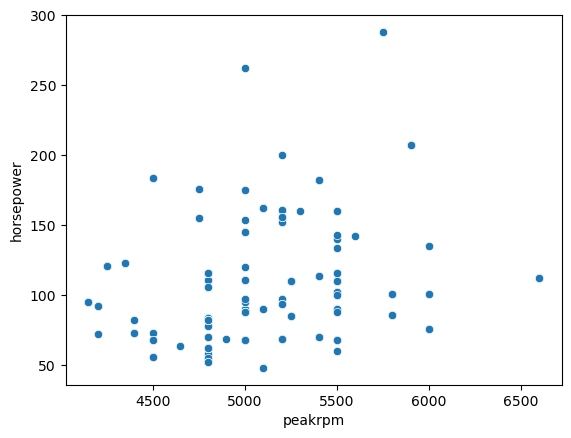

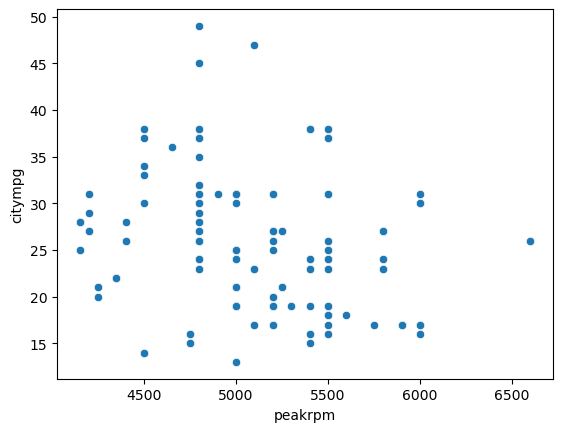

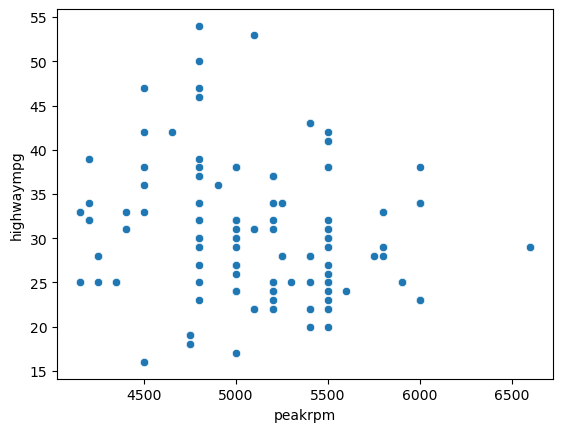

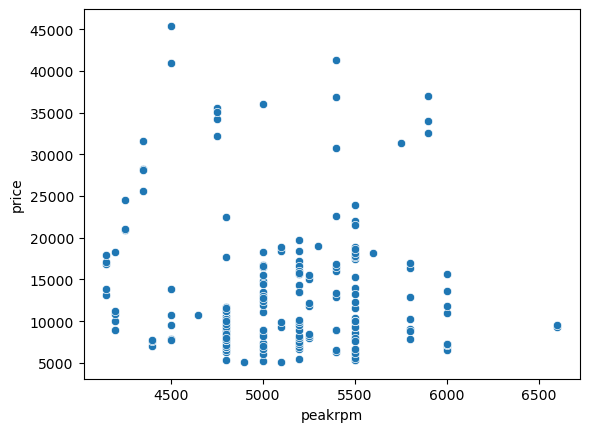

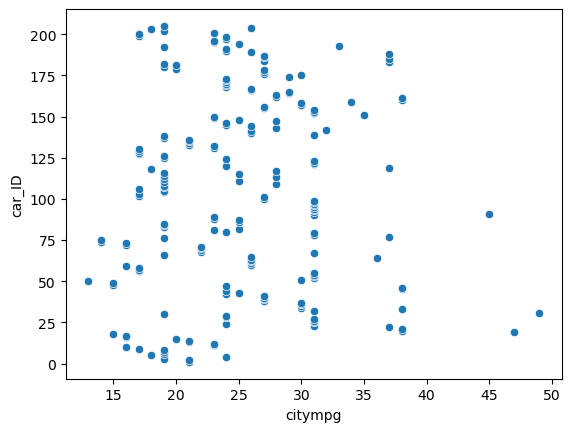

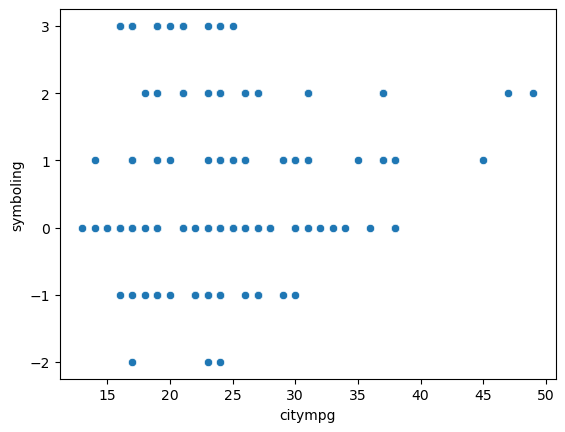

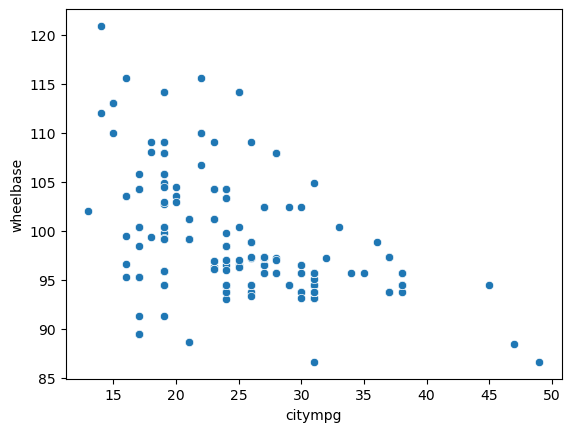

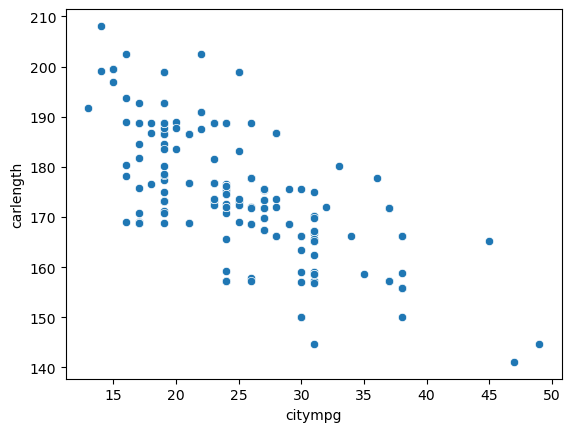

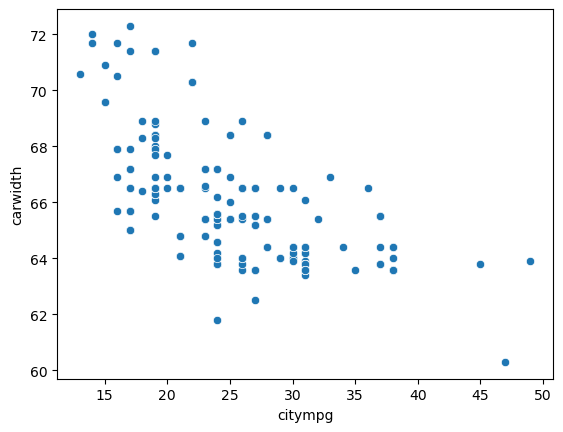

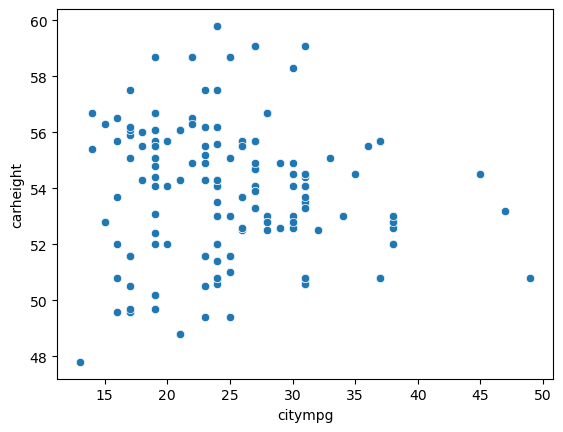

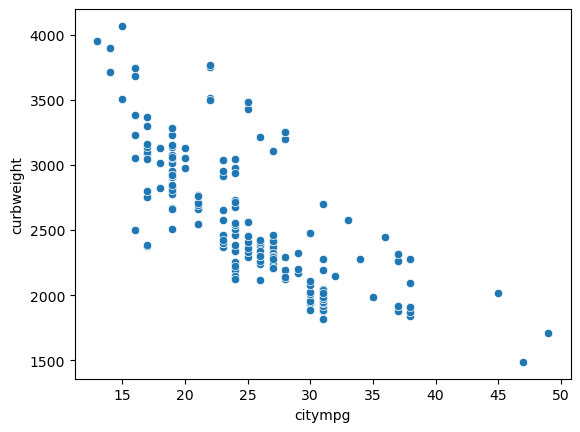

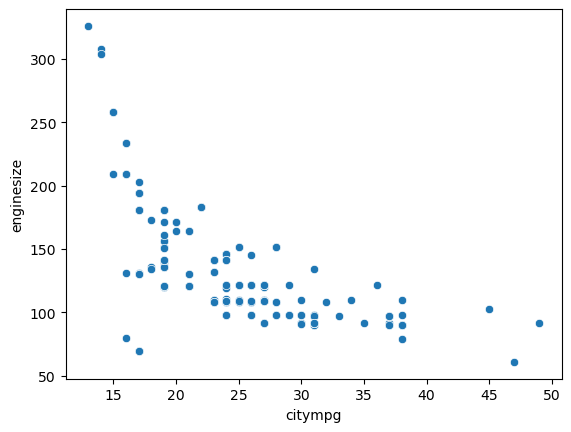

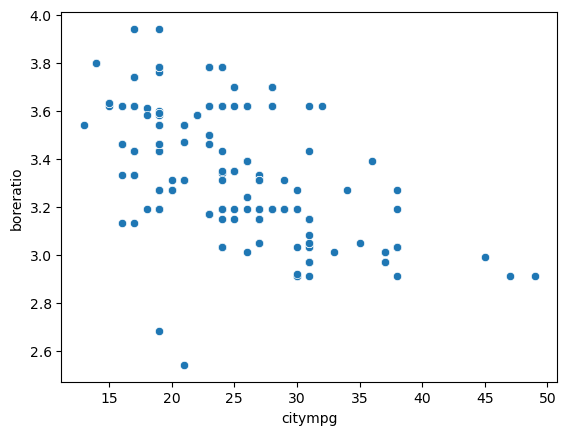

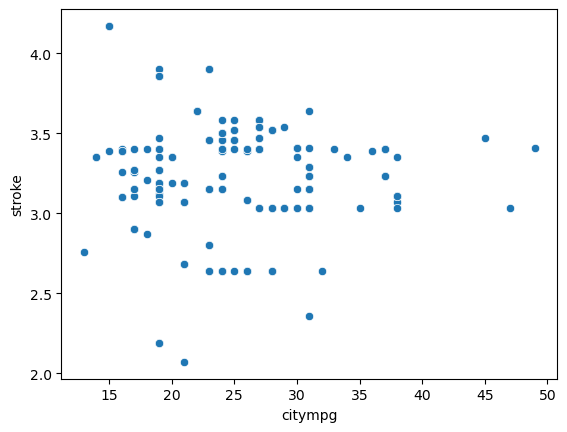

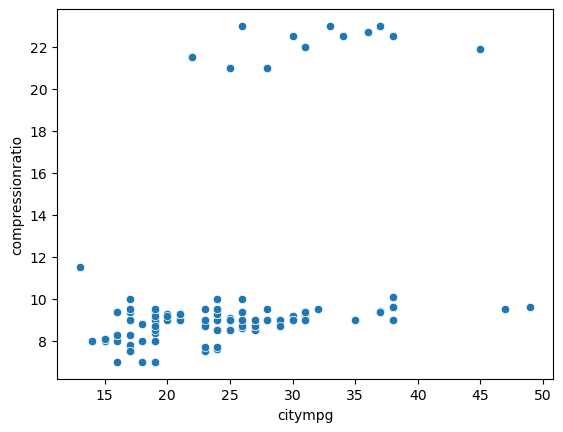

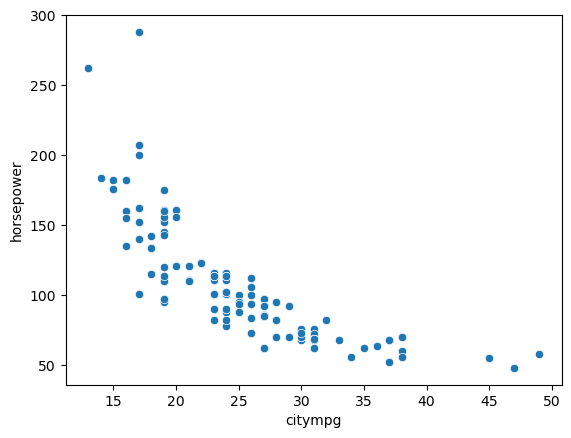

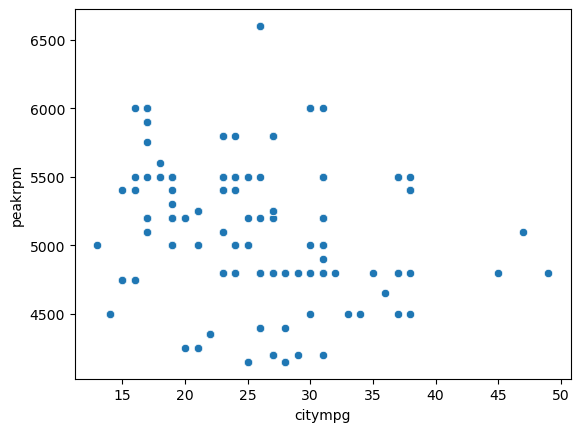

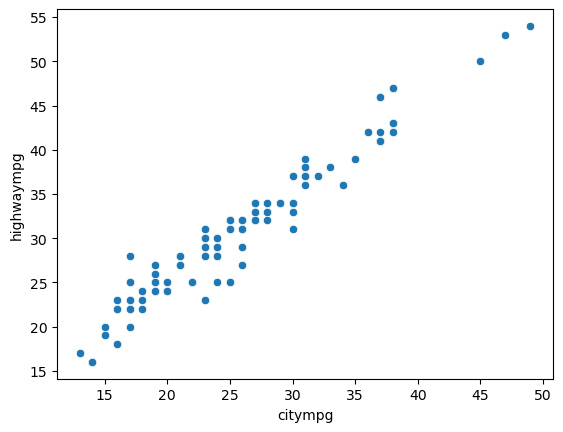

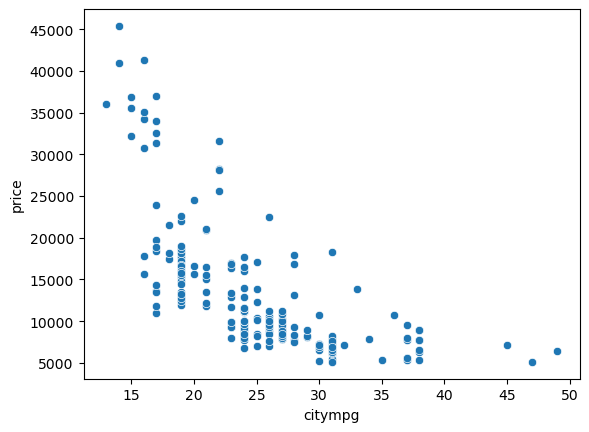

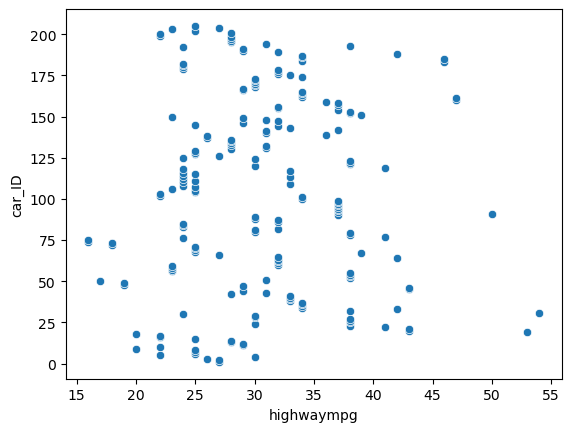

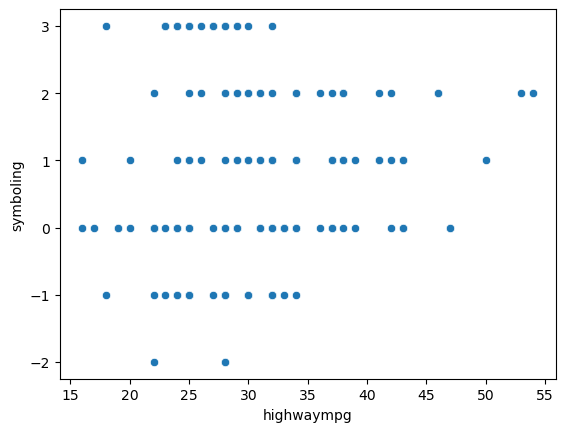

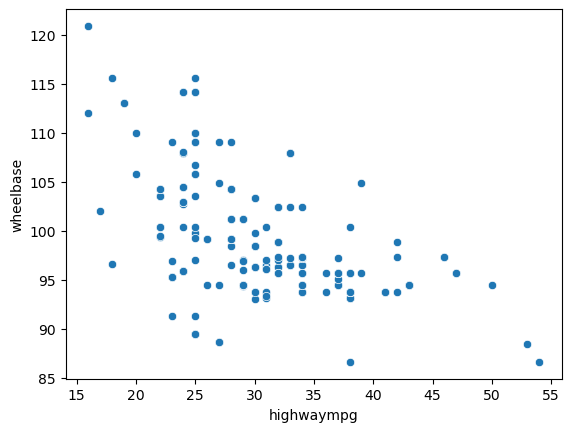

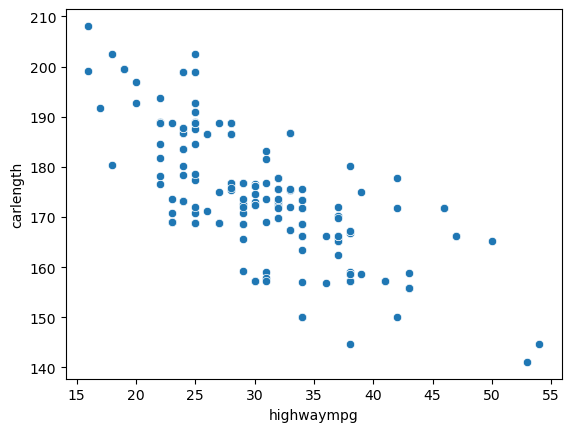

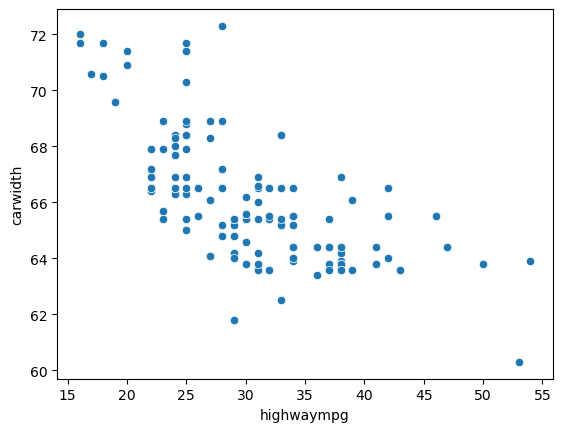

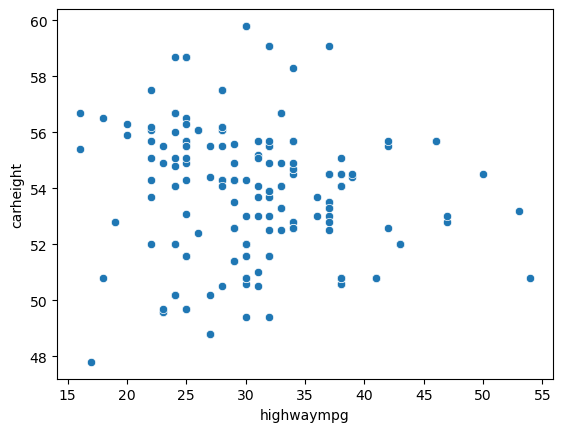

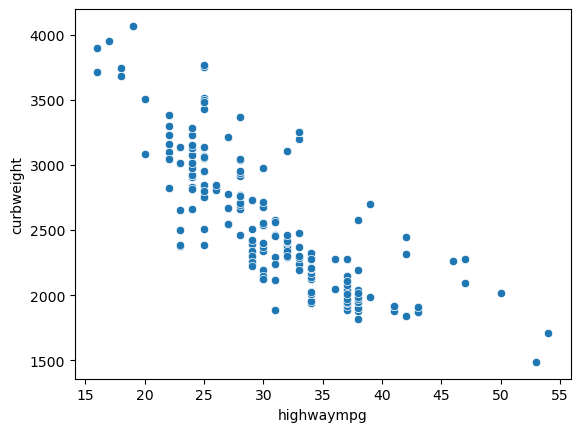

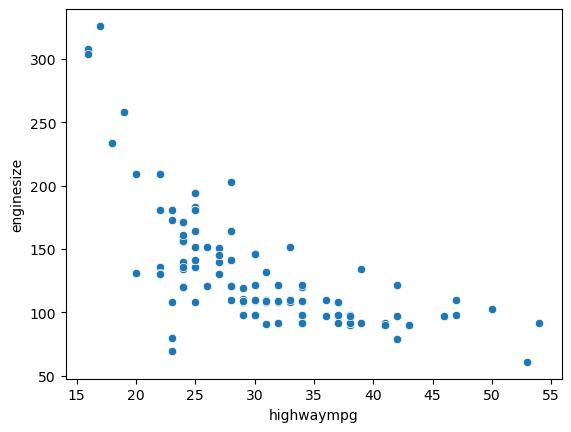

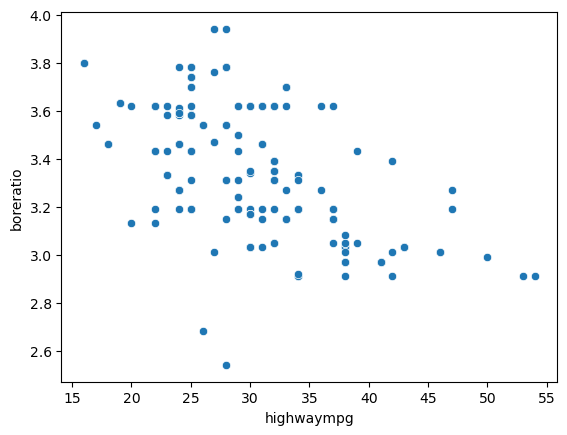

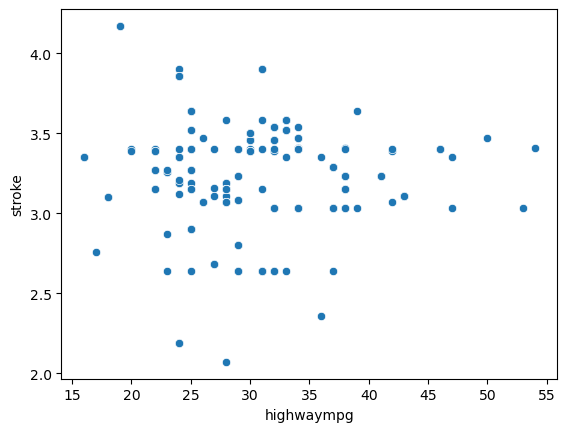

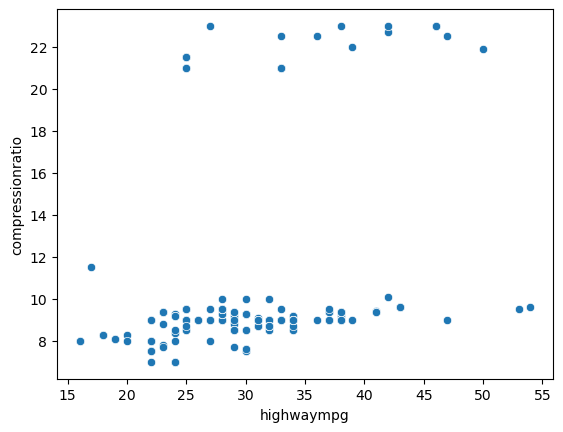

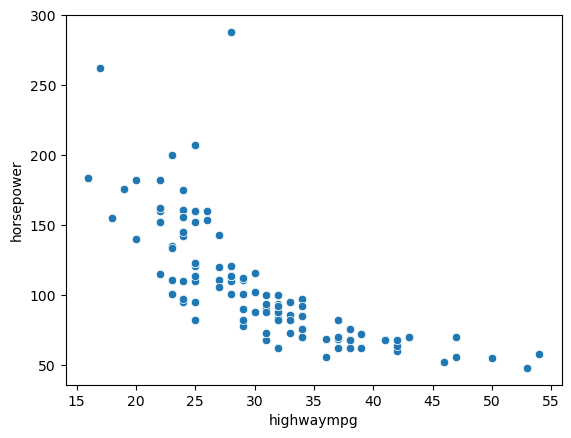

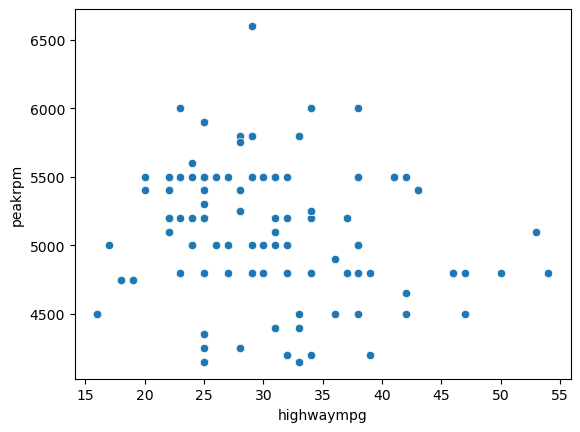

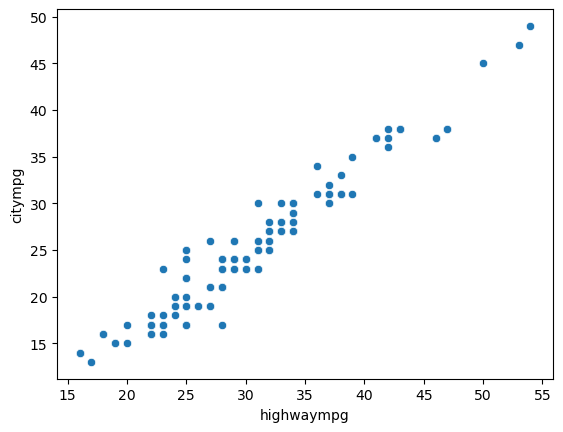

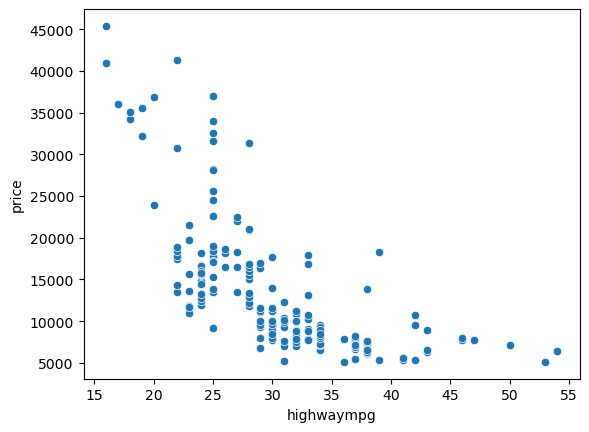

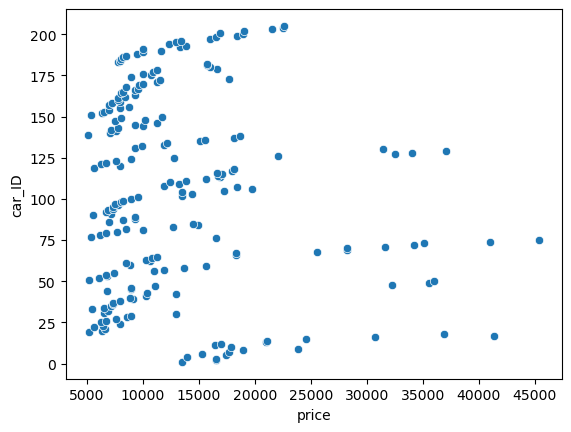

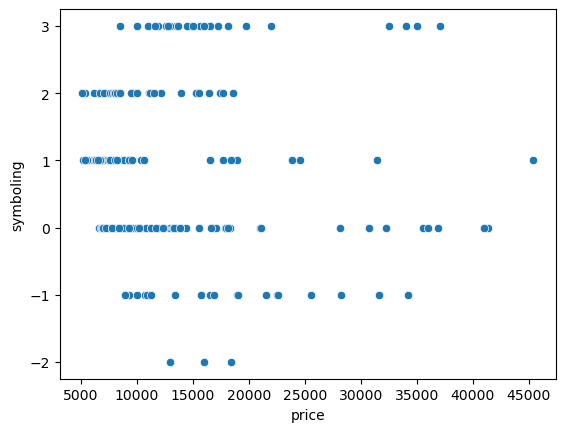

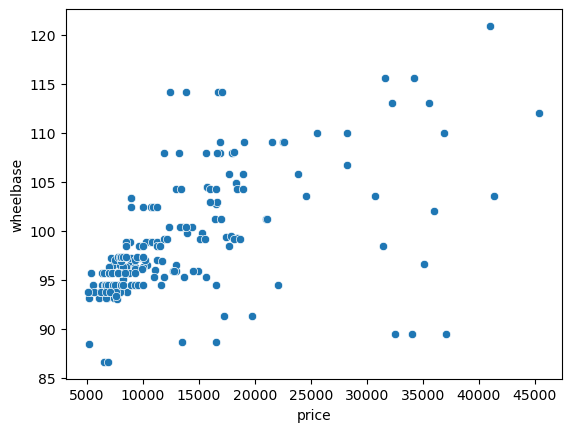

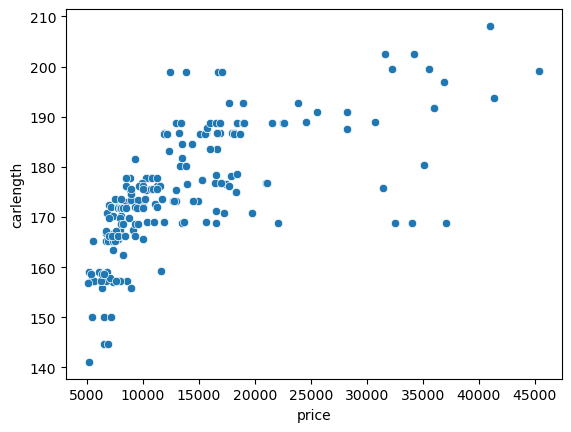

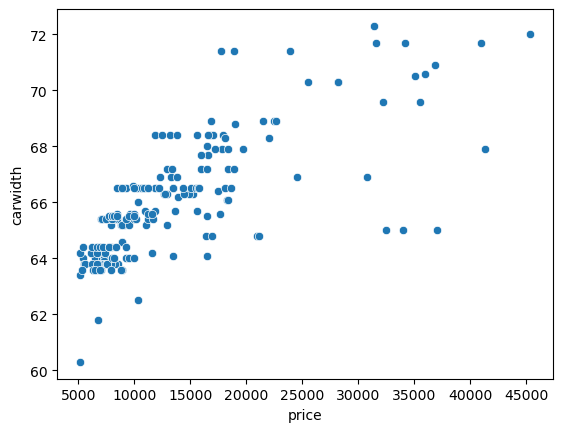

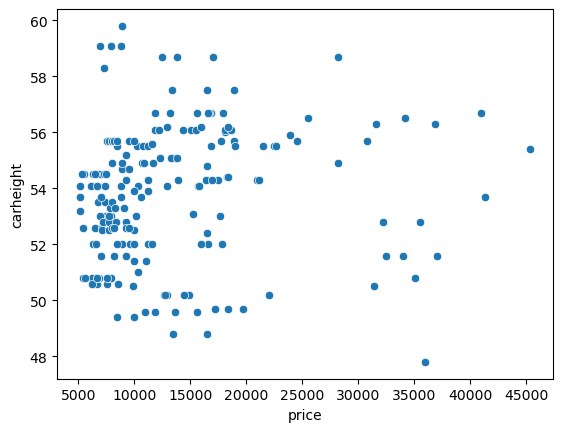

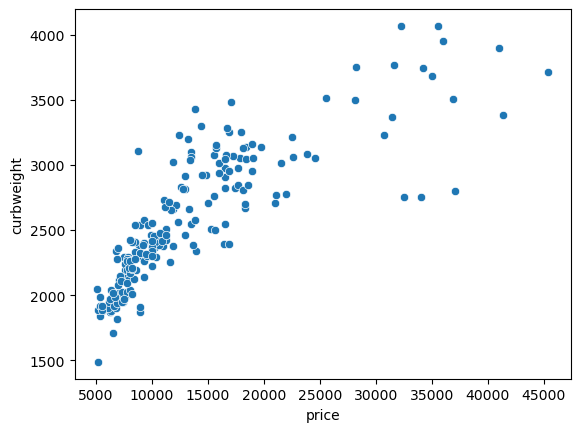

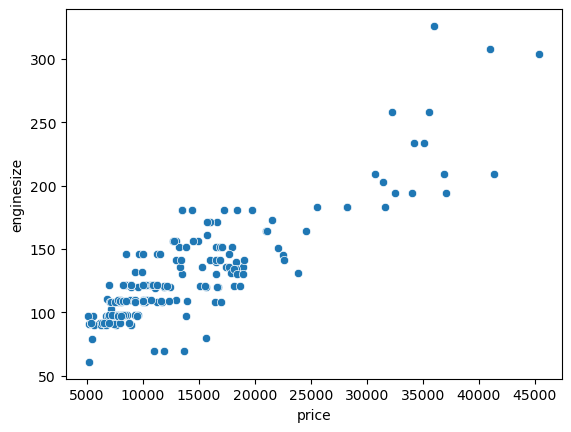

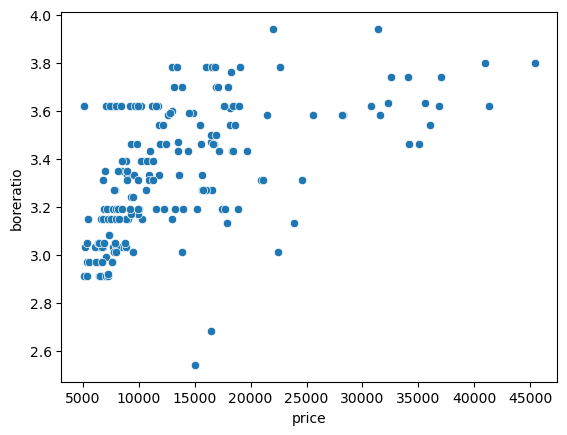

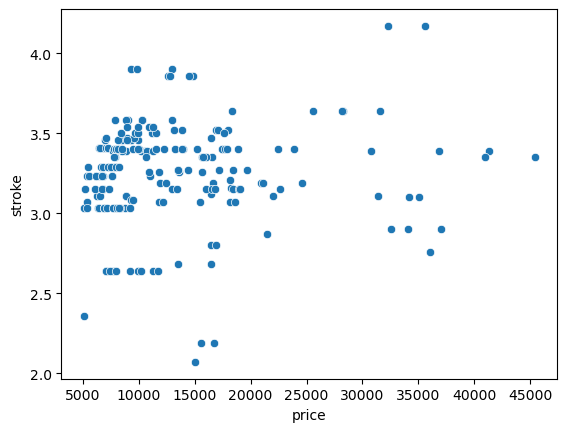

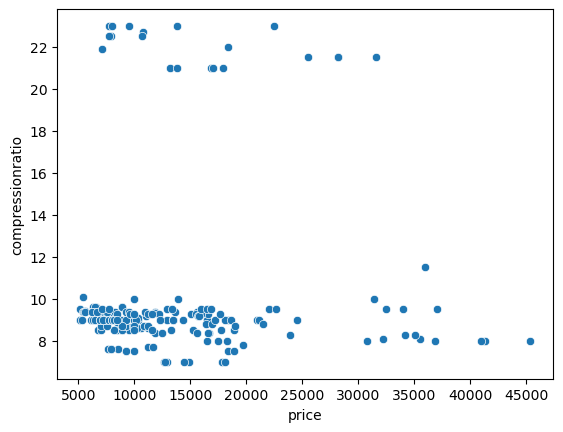

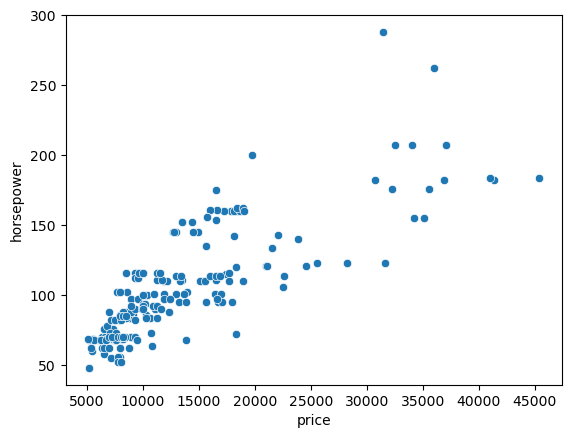

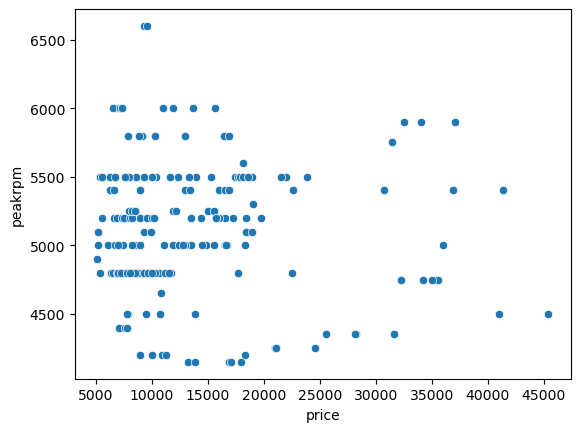

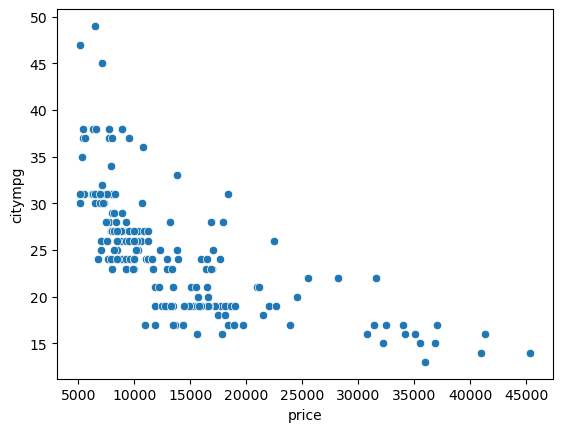

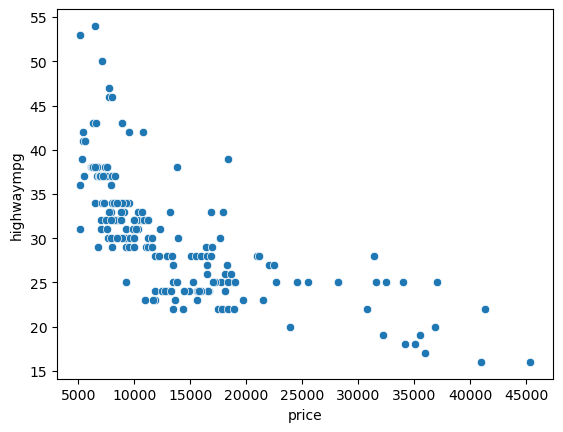

In [16]:
for i in data.select_dtypes(exclude="object"):
    for j in data.select_dtypes(exclude="object"):
        if i!=j:
            sns.scatterplot(data=data,x=i,y=j)
            plt.xlabel(i)
            plt.ylabel(j)
            plt.show()

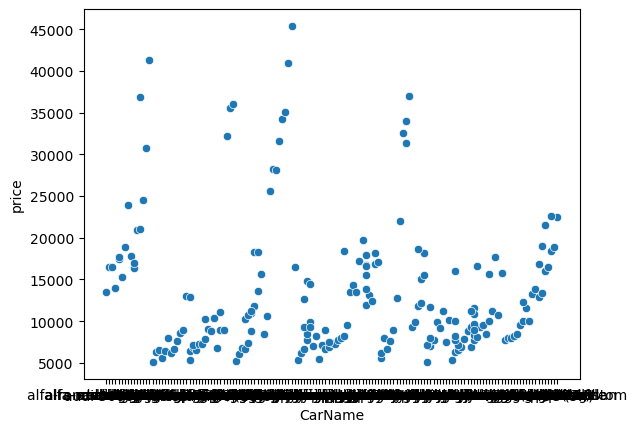

In [17]:
sns.scatterplot(data=data,x="CarName",y="price")
plt.show()

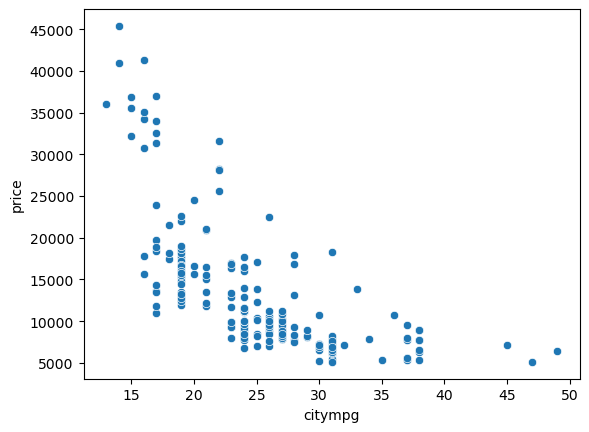

In [18]:
sns.scatterplot(data=data,x="citympg",y="price")
plt.show()

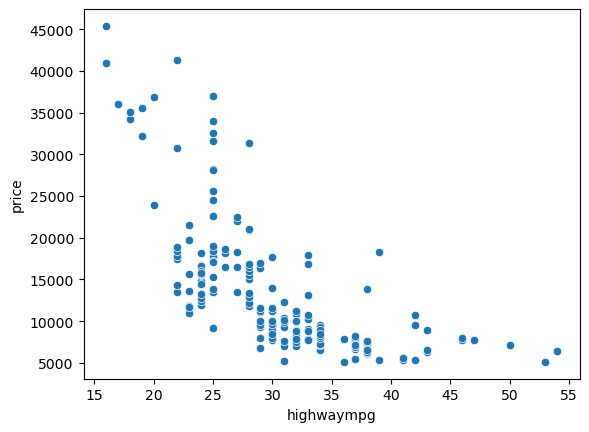

In [19]:
sns.scatterplot(data=data,x="highwaympg",y="price")
plt.show()

In [20]:
y=data["price"]
X=data.drop("price",axis=1)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import time

# Assuming X and y are already defined
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define categorical and numerical features

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import time

# Assuming X and y are already defined
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns

# Define pipelines for numerical and categorical data processing
numerical_pipeline = Pipeline(steps=[
    ("imputation", SimpleImputer(strategy="mean")),
    ("scaling", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputation", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor for both numerical and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ("numerical", numerical_pipeline, numerical_features),
    ("categorical", categorical_pipeline, categorical_features)
])

# Define pipelines for each regression algorithm
pipelines_regression = {
    'linear_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'ridge_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ]),
    'lasso_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso())
    ]),
    'decision_tree_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor())
    ]),
    'random_forest_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]),
    'sgd_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', SGDRegressor())
    ]),
    'knn_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor())
    ])
}

# Define parameter grids for GridSearchCV
param_grids_regression = {
    'linear_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()]
        }
    ],
    'ridge_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'regressor__alpha': [0.1, 1, 10]
        }
    ],
    'lasso_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'regressor__alpha': [0.1, 1, 10]
        }
    ],
    'decision_tree_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'regressor__max_depth': [None, 5, 10]
        }
    ],
    'random_forest_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'regressor__n_estimators': [50, 100, 200],
            'regressor__max_depth': [None, 5, 10]
        }
    ],
    'sgd_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'regressor__alpha': [0.0001, 0.001, 0.01, 0.1],
            'regressor__penalty': ['l2', 'l1', 'elasticnet'],
            'regressor__max_iter': [1000, 2000, 3000]
        }
    ],
    'knn_regression': [
        {
            'preprocessor__numerical__scaling': [StandardScaler(), MinMaxScaler()],
            'regressor__n_neighbors': [3, 5, 10],
            'regressor__weights': ['uniform', 'distance'],
            'regressor__p': [1, 2]
        }
    ]
}

# Perform GridSearchCV for each regression algorithm
best_models_regression_mae = {}
best_params_regression_mae = {}

for algorithm in pipelines_regression.keys():
    print("Running GridSearchCV for", algorithm)
    
    start_time = time.time()
    
    grid_search = GridSearchCV(estimator=pipelines_regression[algorithm], 
                               param_grid=param_grids_regression[algorithm], 
                               cv=5, 
                               scoring='neg_mean_absolute_error',  # Use MAE as scoring metric
                               return_train_score=True,
                               verbose=1
                              )
    
    grid_search.fit(X_train, y_train)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    print("Execution Time for", algorithm, ":", execution_time, "seconds")
    
    best_models_regression_mae[algorithm] = grid_search.best_estimator_
    best_params_regression_mae[algorithm] = grid_search.best_params_
    
    y_pred_test = grid_search.predict(X_test)
    print('Mean Absolute Error on Test Data for', algorithm, ':', mean_absolute_error(y_test, y_pred_test))  # Use MAE for evaluation
    print('Best Parameters for', algorithm, ':', grid_search.best_params_)

# Display the best models and their parameters
print("\nBest Models and their Parameters:")
for algorithm in best_models_regression_mae.keys():
    print(f"Algorithm: {algorithm}")
    print(f"Best Model: {best_models_regression_mae[algorithm]}")
    print(f"Best Parameters: {best_params_regression_mae[algorithm]}")


Running GridSearchCV for linear_regression
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Execution Time for linear_regression : 0.7856786251068115 seconds
Mean Absolute Error on Test Data for linear_regression : 5436.4163730502705
Best Parameters for linear_regression : {'preprocessor__numerical__scaling': StandardScaler()}
Running GridSearchCV for ridge_regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Execution Time for ridge_regression : 1.0421769618988037 seconds
Mean Absolute Error on Test Data for ridge_regression : 2398.2185603471653
Best Parameters for ridge_regression : {'preprocessor__numerical__scaling': StandardScaler(), 'regressor__alpha': 1}
Running GridSearchCV for lasso_regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9453326.898401301, tolerance: 789128.3245388226
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10574173.838154264, tolerance: 906757.2315543938
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10636446.63496428, tolerance: 1019629.852580489
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

Execution Time for lasso_regression : 1.9657793045043945 seconds
Mean Absolute Error on Test Data for lasso_regression : 2188.8049121545396
Best Parameters for lasso_regression : {'preprocessor__numerical__scaling': StandardScaler(), 'regressor__alpha': 10}
Running GridSearchCV for decision_tree_regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Execution Time for decision_tree_regression : 0.9947168827056885 seconds
Mean Absolute Error on Test Data for decision_tree_regression : 1730.7390512123732
Best Parameters for decision_tree_regression : {'preprocessor__numerical__scaling': StandardScaler(), 'regressor__max_depth': 5}
Running GridSearchCV for random_forest_regression
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Execution Time for random_forest_regression : 39.8187575340271 seconds
Mean Absolute Error on Test Data for random_forest_regression : 1601.9418309756095
Best Parameters for random_forest_regression : {'preprocessor__numerical__scaling'

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linea

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linea

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linea

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linea

C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\deepa\anaconda3\Lib\site-packages\sklearn\linea

Execution Time for sgd_regression : 23.17065143585205 seconds
Mean Absolute Error on Test Data for sgd_regression : 2524.726962616039
Best Parameters for sgd_regression : {'preprocessor__numerical__scaling': StandardScaler(), 'regressor__alpha': 0.1, 'regressor__max_iter': 1000, 'regressor__penalty': 'l1'}
Running GridSearchCV for knn_regression
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Execution Time for knn_regression : 7.768308401107788 seconds
Mean Absolute Error on Test Data for knn_regression : 2169.6567271209715
Best Parameters for knn_regression : {'preprocessor__numerical__scaling': StandardScaler(), 'regressor__n_neighbors': 3, 'regressor__p': 1, 'regressor__weights': 'distance'}

Best Models and their Parameters:
Algorithm: linear_regression
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                            

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='...
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
       

In [23]:
import pickle

# Assuming best_models_regression_mae contains the fitted models
# best_models_regression_mae = {
#     'linear_regression': fitted_model_linear_regression,
#     'ridge_regression': fitted_model_ridge_regression,
#     
# }

# Save each model using pickle
for algorithm, model in best_models_regression_mae.items():
    model_filename = f"best_model_{algorithm}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {model_filename}")

Model saved as best_model_linear_regression.pkl
Model saved as best_model_ridge_regression.pkl
Model saved as best_model_lasso_regression.pkl
Model saved as best_model_decision_tree_regression.pkl
Model saved as best_model_random_forest_regression.pkl
Model saved as best_model_sgd_regression.pkl
Model saved as best_model_knn_regression.pkl


In [24]:
from sklearn.metrics import *
import numpy as np
for name, model in best_models_regression_mae.items():
    print("ML MODEL EVALUATION")
    print("_"*50)
    print(""*15, name, ""*15)
    %time y_test_pred = model.predict(X_test)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("R-squared (R^2) Score:", r2_score(y_test, y_test_pred))

ML MODEL EVALUATION
__________________________________________________
 linear_regression 
CPU times: total: 0 ns
Wall time: 8.07 ms
Mean Absolute Error (MAE): 5436.4163730502705
Mean Squared Error (MSE): 49346184.73870156
Root Mean Squared Error (RMSE): 7024.683960058385
R-squared (R^2) Score: 0.045224853361155004
ML MODEL EVALUATION
__________________________________________________
 ridge_regression 
CPU times: total: 0 ns
Wall time: 6.2 ms
Mean Absolute Error (MAE): 2398.2185603471653
Mean Squared Error (MSE): 11001421.185139554
Root Mean Squared Error (RMSE): 3316.839035156749
R-squared (R^2) Score: 0.787138892684458
ML MODEL EVALUATION
__________________________________________________
 lasso_regression 
CPU times: total: 15.6 ms
Wall time: 11.1 ms
Mean Absolute Error (MAE): 2188.8049121545396
Mean Squared Error (MSE): 7605092.343824355
Root Mean Squared Error (RMSE): 2757.733189382968
R-squared (R^2) Score: 0.8528527950797778
ML MODEL EVALUATION
_________________________________